In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from IPython.display import display

train = pd.read_csv('train.csv')
train.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
984    985          90       RL         75.0    10125   Pave   NaN      Reg   
644    645          20       FV         85.0     9187   Pave   NaN      Reg   
676    677          70       RM         60.0     9600   Pave  Grvl      Reg   
1129  1130          90       RM         60.0     7200   Pave  Grvl      Reg   
669    670          30       RL         80.0    11600   Pave   NaN      Reg   

     LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
984          Lvl    AllPub    ...            0    NaN   NaN         NaN   
644          Lvl    AllPub    ...            0    NaN   NaN         NaN   
676          Lvl    AllPub    ...            0    NaN   NaN         NaN   
1129         Lvl    AllPub    ...            0    NaN   NaN         NaN   
669          Lvl    AllPub    ...            0    NaN   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
984        0      8   2009       COD         Normal     126000  
644        0     10   2009       New        Partial     370878  
676        0      5   2006        WD         Normal      87000  
1129       0      8   2007        WD         Normal     140000  
669        0      7   2006        WD         Normal     137500  

[5 rows x 81 columns]

In [2]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

# Summary

- Write here

# Analysis

In [242]:
# checking for missing values
missing_values = train.apply(lambda x: sum(x.isnull()),axis=0)
missing_values[missing_values != 0]

LotFrontage            259
Alley                 1369
MasVnrType               8
MasVnrArea               8
BsmtQual                37
BsmtCond                37
BsmtExposure            38
BsmtFinType1            37
BsmtFinType2            38
Electrical               1
FireplaceQu            690
GarageType              81
GarageYrBlt             81
GarageFinish            81
GarageQual              81
GarageCond              81
PoolQC                1453
Fence                 1179
MiscFeature           1406
log of LotFrontage     259
log of GarageYrBlt      81
GarageAge               81
dtype: int64

Remove features where missing values are more than X%  of total number of rows to avoid overfitting?

## Sale Price

Is it necessary to adjust by inflation?

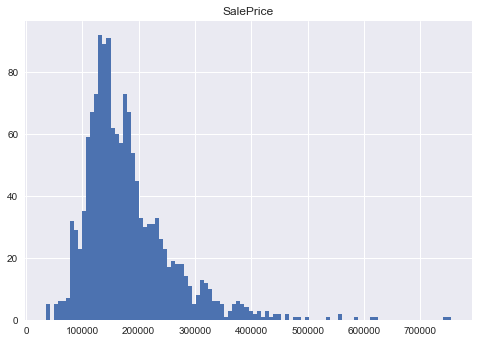

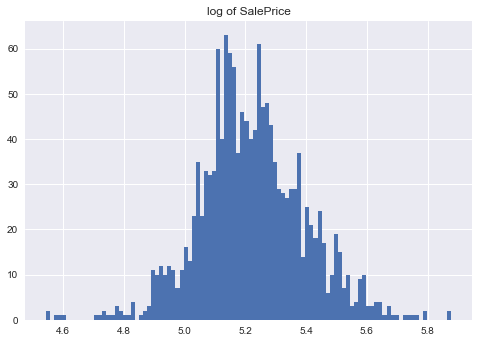

In [4]:
def plot_histogram(dataset, column, bins=100):
    dataset.hist(column=column, bins=bins)
    dataset['log of '+column] = np.log10(dataset[column])
    dataset.hist(column='log of '+column, bins=bins)

plot_histogram(train, 'SalePrice')

It may be better to use log of sale price. skewness tends to negatively affect the performance of machine learning algorithms

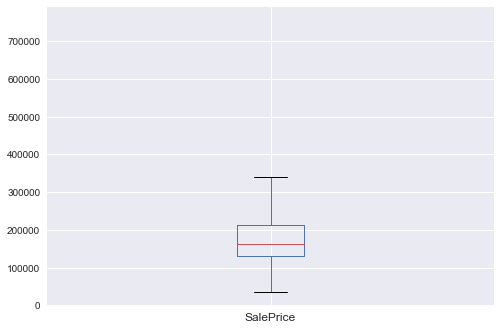

In [5]:
train.boxplot(column='SalePrice')

In [6]:
def r_squared(dataset, x_column, y_column):
    # if nan, get rows out
    x = np.array(dataset[x_column])
    y = np.array(dataset[y_column])

    x = x.reshape(dataset.shape[0], 1)
    y = y.reshape(dataset.shape[0], 1)

    model = LinearRegression()
    model.fit(x, y)
    print('R^2 = %f' % model.score(x, y))
    
def scatter_plot(dataset, x_column, y_column):
    dataset = dataset.dropna(subset=[x_column])
    sns.lmplot(x=x_column, y=y_column, data=dataset, fit_reg=True, aspect=2)
    r_squared(dataset, x_column, y_column)


### Analysis

Write analysis here.

## Building Class


MSSubClass    0
dtype: int64

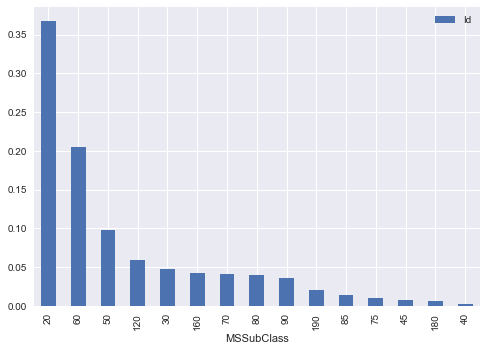

In [7]:
def plot_category_distribution(dataset, column_name):
    (dataset[['Id',column_name]].groupby(column_name).count()/dataset.shape[0]).sort_values(by='Id',ascending=0).plot(kind='bar')
    #(dataset[['Id',column_name]].groupby(column_name).count()/dataset.shape[0]).plot(kind='bar')

display(train[['MSSubClass']].apply(lambda x: sum(x.isnull())))
plot_category_distribution(train, 'MSSubClass')

Int64Index([180, 30, 45, 190, 50, 90, 85, 40, 160, 70, 20, 75, 80, 120, 60], dtype='int64')


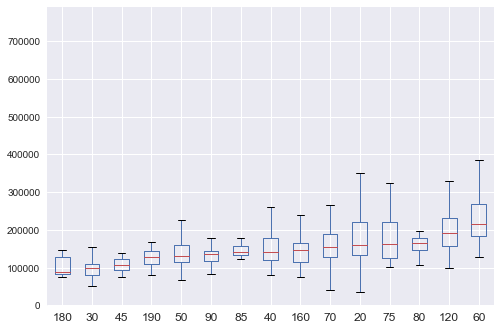

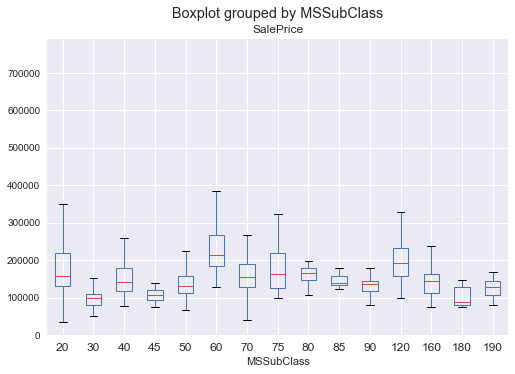

In [249]:
def boxplot_sorted(dataset, by, column):
    dataset = pd.DataFrame({col:vals[column] for col, vals in dataset.groupby(by)})
    medians = dataset.median().sort_values()
    print(medians.index)
    return dataset[medians.index].boxplot()

def plot_category_correlation(dataset, column_name):
    boxplot_sorted(dataset, column_name, 'SalePrice')
    dataset.boxplot(column='SalePrice', by=column_name)
    
plot_category_correlation(train, 'MSSubClass')

### Analysis

This feature must be transformed one way or another. To avoid one-hot encoding, we may have to assume an order on the classes (based on median of SalePrice?). This could induce the correlation showed above.

It may also make sense to group "similar" classes, although of course deciding how to group them may be an issue.

That said, that seems to be a Paretto when looking at class distribution. Classes 20 and 60 amount to more than 55% of data. 

## General Zoning Classification

MSZoning    0
dtype: int64

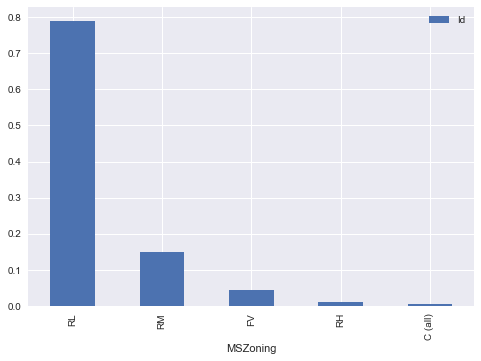

In [9]:
display(train[['MSZoning']].apply(lambda x: sum(x.isnull())))
plot_category_distribution(train, 'MSZoning')

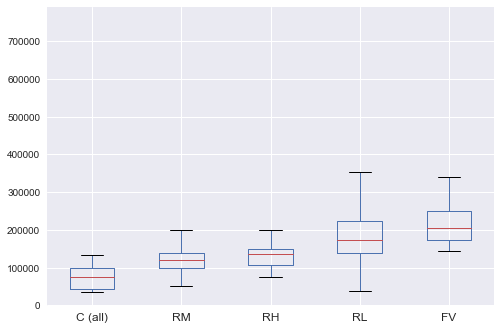

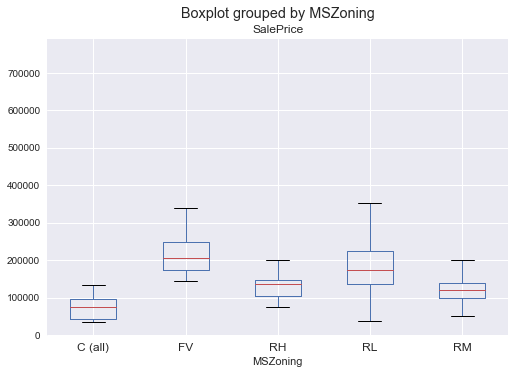

In [10]:
plot_category_correlation(train, 'MSZoning')

### Analysis

Write analysis here.

## Linear feet of street connected to property


LotFrontage    259
dtype: int64

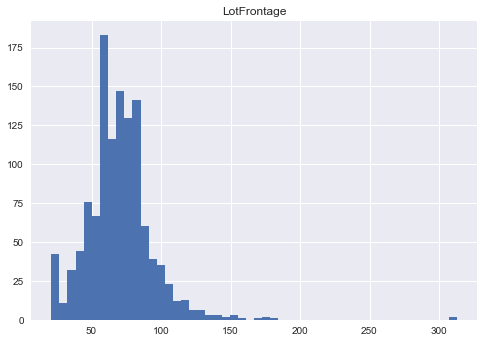

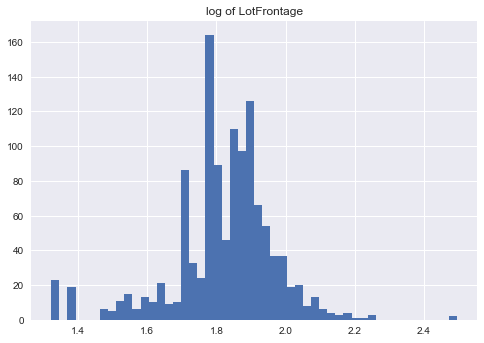

In [11]:
display(train[['LotFrontage']].apply(lambda x: sum(x.isnull())))
plot_histogram(train, 'LotFrontage', bins=50)

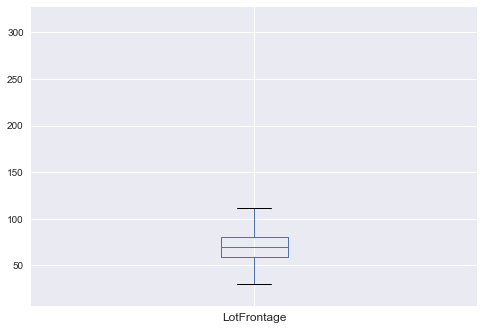

In [12]:
train.boxplot(column='LotFrontage')

R^2 = 0.123763


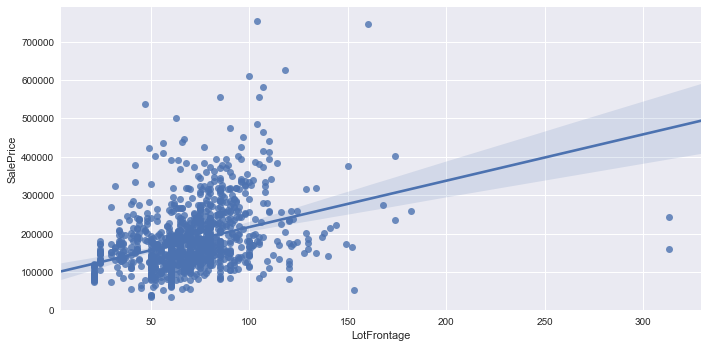

In [13]:
scatter_plot(train, 'LotFrontage', 'SalePrice')

### Analysis

Write analysis here.

## Lot size in square feet

LotArea    0
dtype: int64

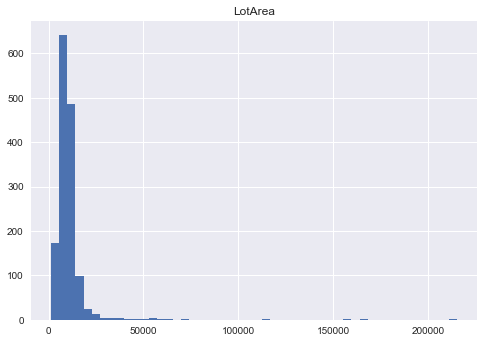

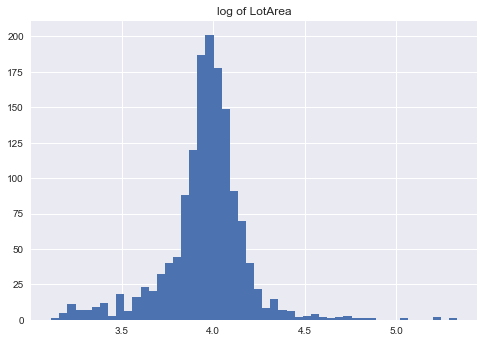

In [14]:
display(train[['LotArea']].apply(lambda x: sum(x.isnull())))
plot_histogram(train, 'LotArea', bins=50)

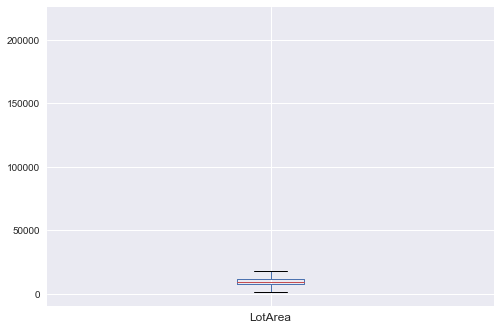

In [15]:
train.boxplot(column='LotArea')

R^2 = 0.069613


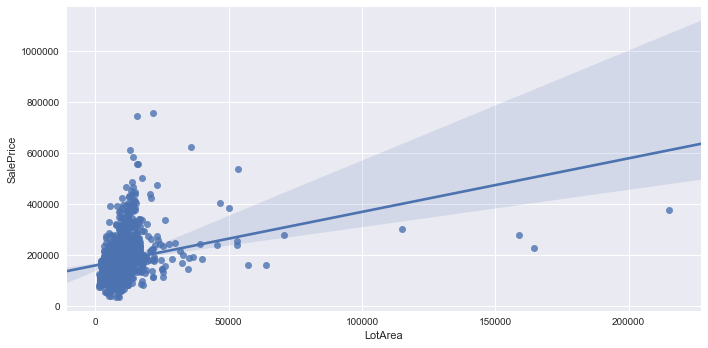

In [16]:
scatter_plot(train, 'LotArea', 'SalePrice')

### Analysis

This is surprising. I expected a stronger linear relationship here. Maybe this feature only matters when combined with others? For example, building class, neighborhood, etc.

## Type of road access

Street    0
dtype: int64

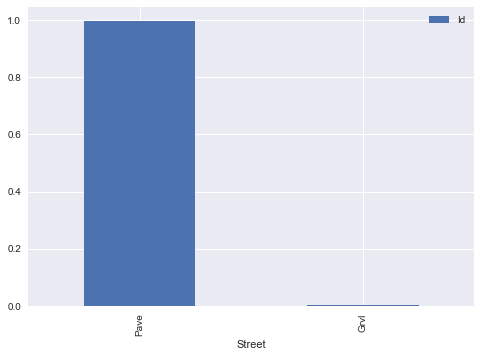

In [17]:
display(train[['Street']].apply(lambda x: sum(x.isnull())))
plot_category_distribution(train, 'Street')

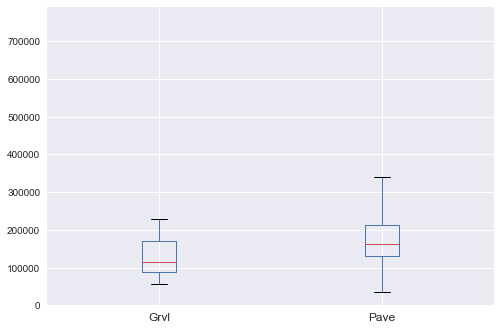

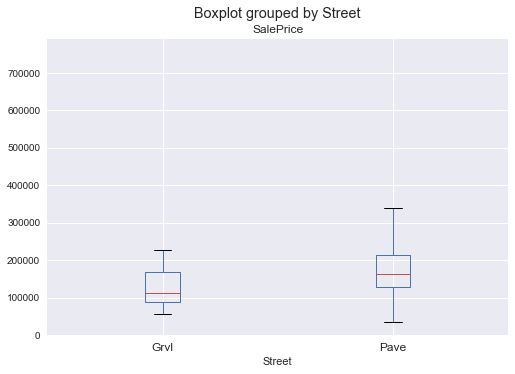

In [18]:
plot_category_correlation(train, 'Street')

### Analysis

Write analysis here.

## Type of alley access

Alley    1369
dtype: int64

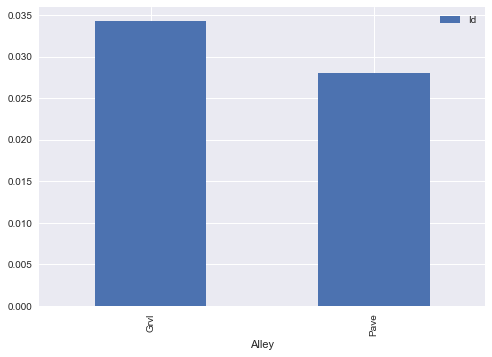

In [19]:
display(train[['Alley']].apply(lambda x: sum(x.isnull())))
plot_category_distribution(train, 'Alley')

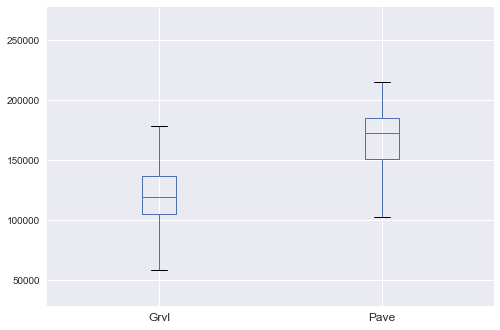

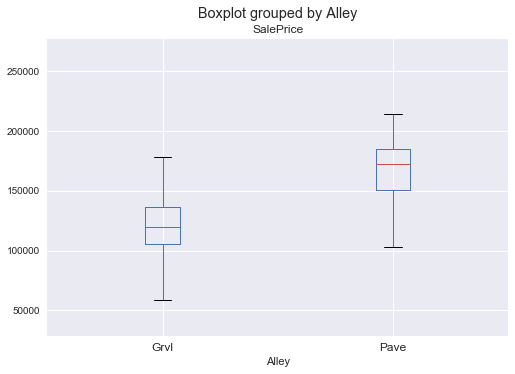

In [20]:
plot_category_correlation(train, 'Alley')

### Analysis

Write analysis here.

## General shape of property

LotShape    0
dtype: int64

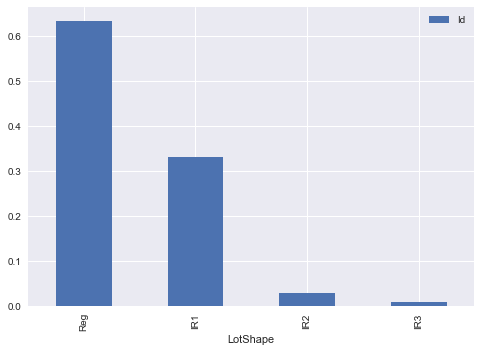

In [21]:
display(train[['LotShape']].apply(lambda x: sum(x.isnull())))
plot_category_distribution(train, 'LotShape')

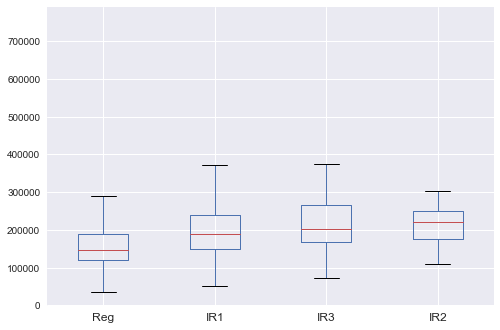

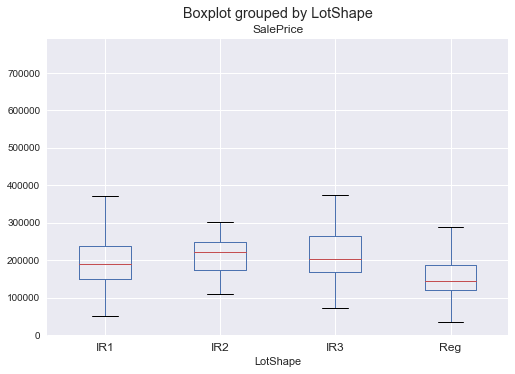

In [22]:
plot_category_correlation(train, 'LotShape')

### Analysis

Write analysis here.

## Flatness of the property

Write hypothesis here, if any.

LandContour    0
dtype: int64

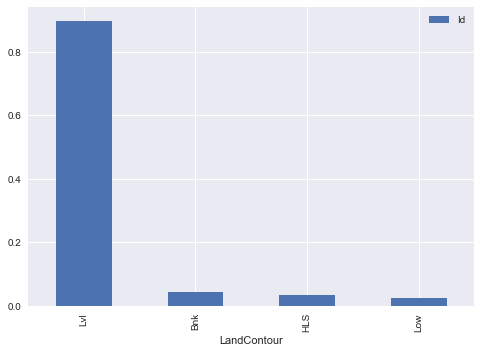

In [23]:
display(train[['LandContour']].apply(lambda x: sum(x.isnull())))
plot_category_distribution(train, 'LandContour')

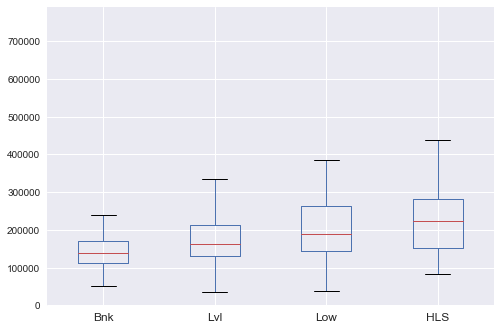

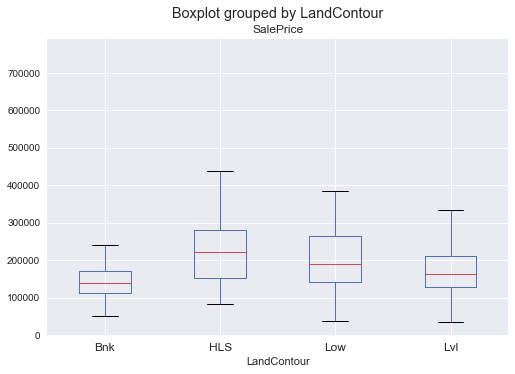

In [24]:
plot_category_correlation(train, 'LandContour')

### Analysis

Write analysis here.

## Type of utilities available

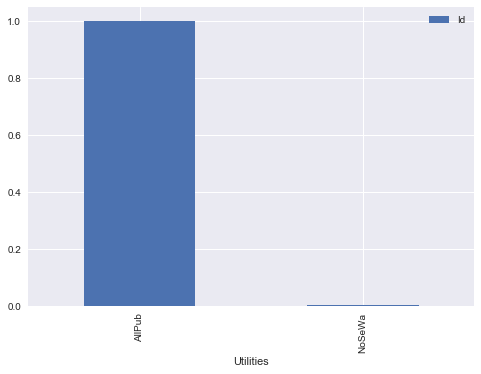

In [25]:
plot_category_distribution(train, 'Utilities')

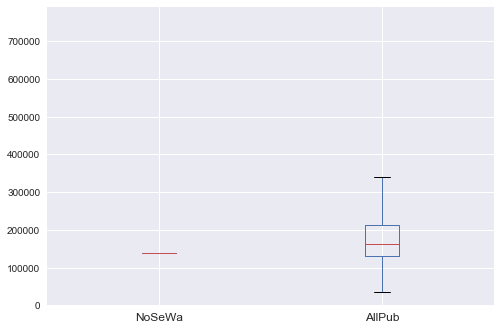

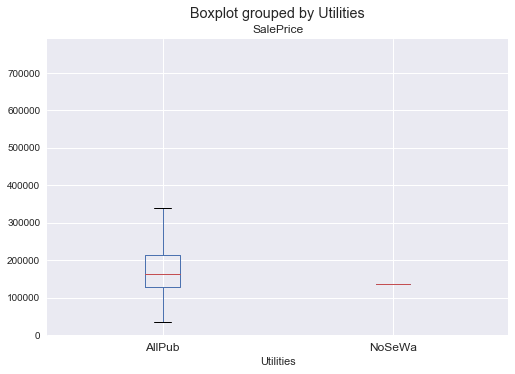

In [26]:
plot_category_correlation(train, 'Utilities')

## Lot configuration

LotConfig    0
dtype: int64

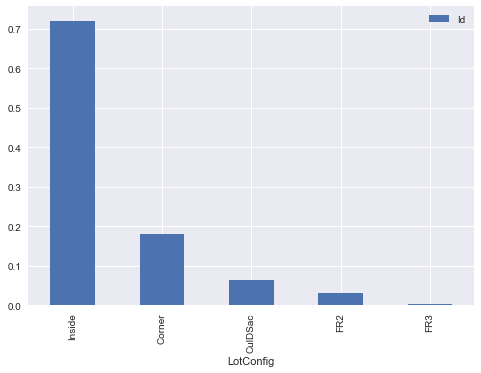

In [27]:
display(train[['LotConfig']].apply(lambda x: sum(x.isnull())))
plot_category_distribution(train, 'LotConfig')

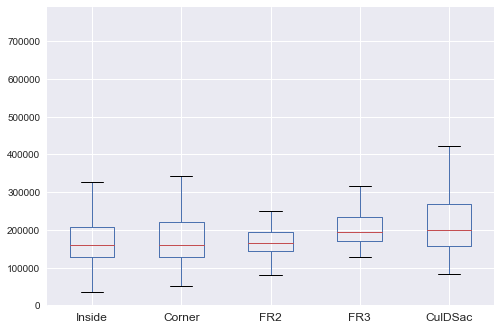

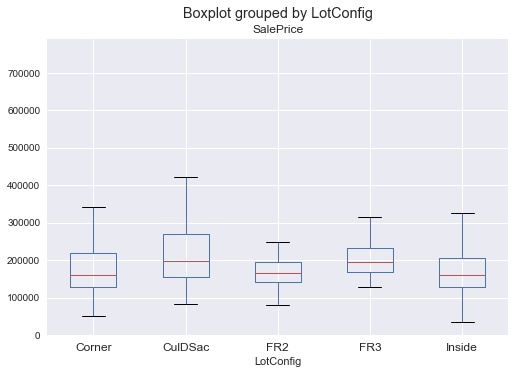

In [28]:
plot_category_correlation(train, 'LotConfig')

## Slope of property

LandSlope    0
dtype: int64

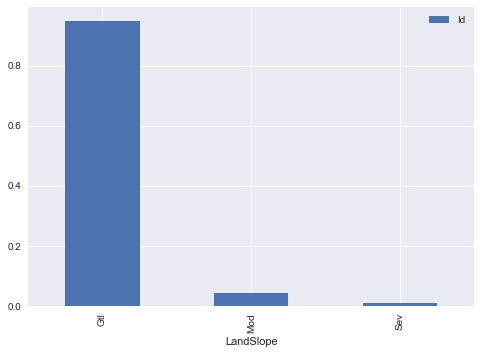

In [29]:
display(train[['LandSlope']].apply(lambda x: sum(x.isnull())))
plot_category_distribution(train, 'LandSlope')

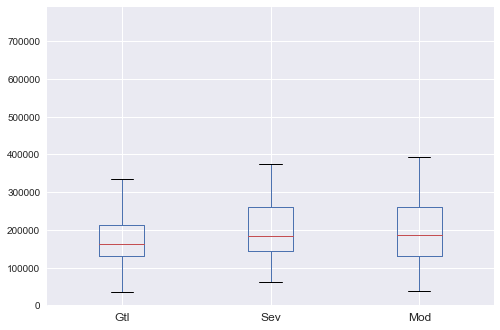

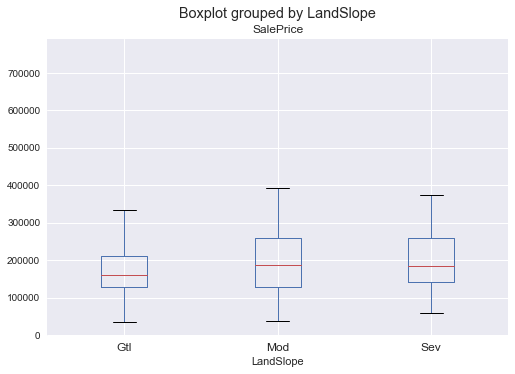

In [30]:
plot_category_correlation(train, 'LandSlope')

## Physical locations within Ames city limits

Neighborhood    0
dtype: int64

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

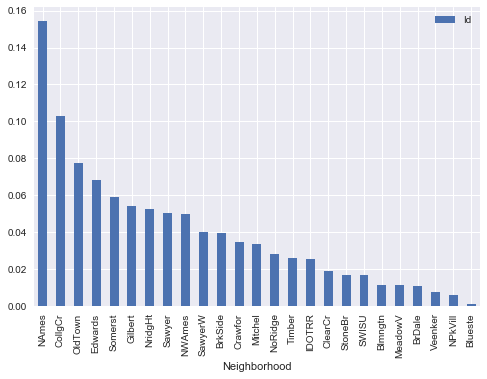

In [246]:
display(train[['Neighborhood']].apply(lambda x: sum(x.isnull())))
plot_category_distribution(train, 'Neighborhood')
train['Neighborhood'].unique()

Index(['MeadowV', 'IDOTRR', 'BrDale', 'OldTown', 'Edwards', 'BrkSide',
       'Sawyer', 'Blueste', 'SWISU', 'NAmes', 'NPkVill', 'Mitchel', 'SawyerW',
       'Gilbert', 'NWAmes', 'Blmngtn', 'CollgCr', 'ClearCr', 'Crawfor',
       'Veenker', 'Somerst', 'Timber', 'StoneBr', 'NoRidge', 'NridgHt'],
      dtype='object')


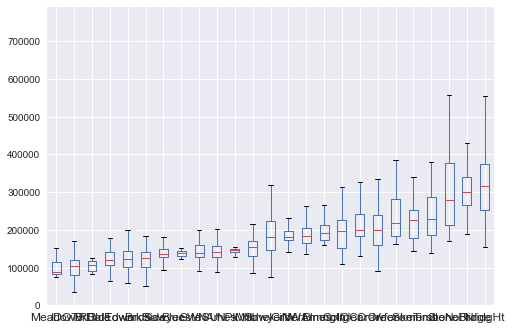

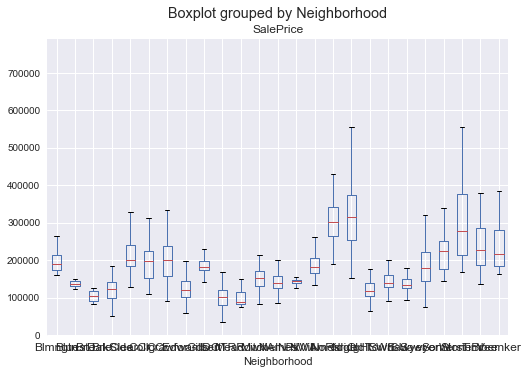

In [250]:
plot_category_correlation(train, 'Neighborhood')

## Proximity to main road or railroad

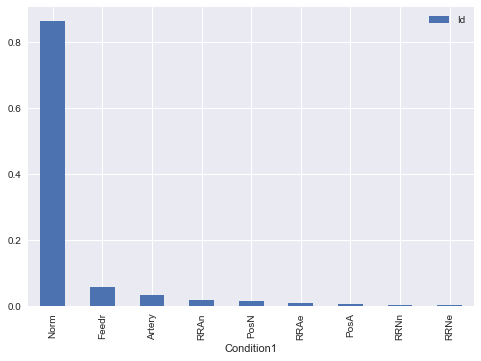

In [33]:
plot_category_distribution(train, 'Condition1')

Index(['Artery', 'Feedr', 'RRAe', 'Norm', 'RRAn', 'RRNe', 'PosN', 'PosA',
       'RRNn'],
      dtype='object')


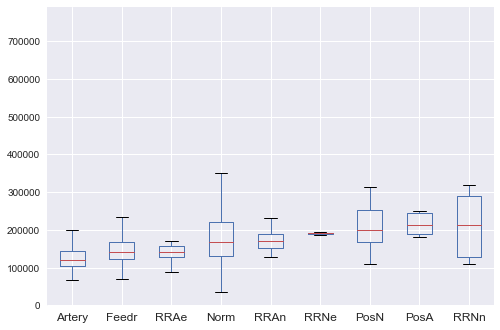

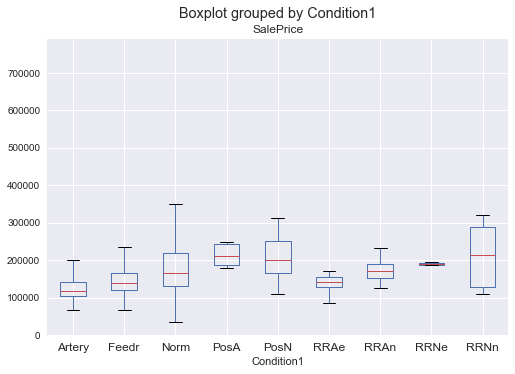

In [251]:
plot_category_correlation(train, 'Condition1')

## Proximity to main road or railroad (if a second is present)

Condition2    0
dtype: int64

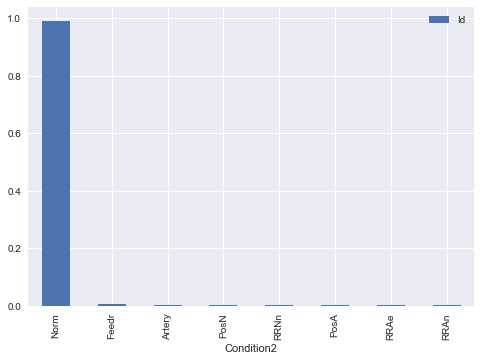

In [35]:
display(train[['Condition2']].apply(lambda x: sum(x.isnull())))
plot_category_distribution(train, 'Condition2')

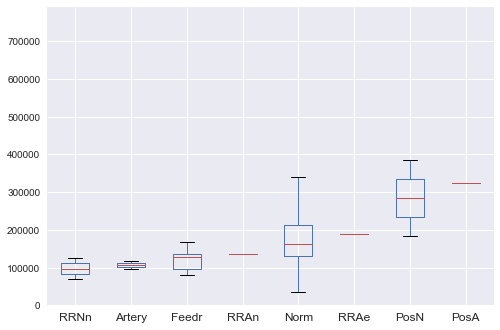

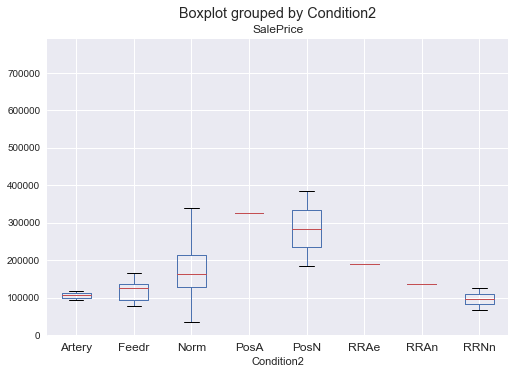

In [36]:
plot_category_correlation(train, 'Condition2')

## Type of dwelling

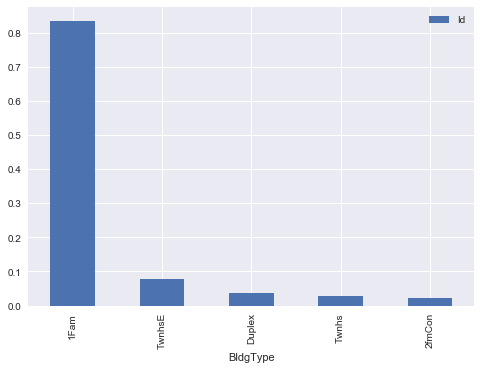

In [37]:
plot_category_distribution(train, 'BldgType')


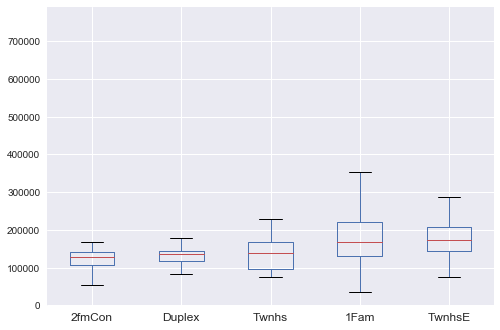

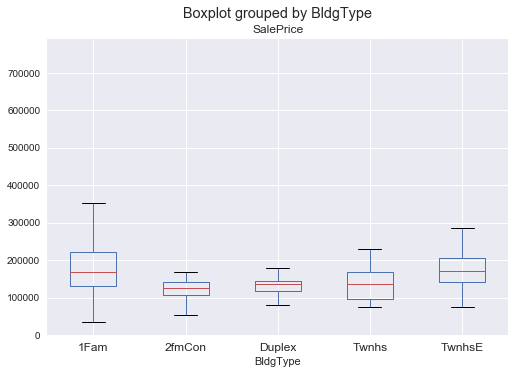

In [38]:
plot_category_correlation(train, 'BldgType')

## Style of dwelling

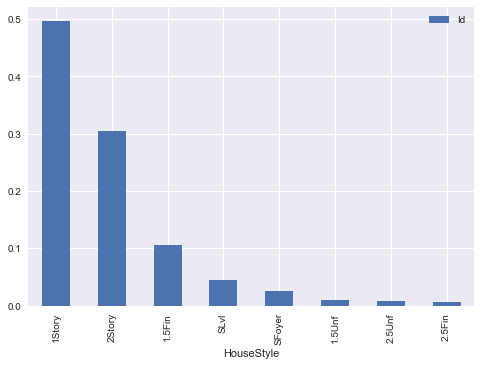

In [39]:
plot_category_distribution(train, 'HouseStyle')

Index(['1.5Unf', '1.5Fin', '2.5Unf', 'SFoyer', '1Story', 'SLvl', '2Story',
       '2.5Fin'],
      dtype='object')


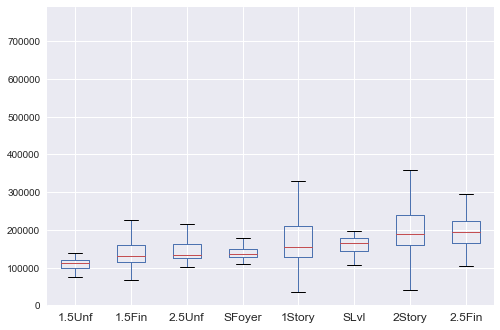

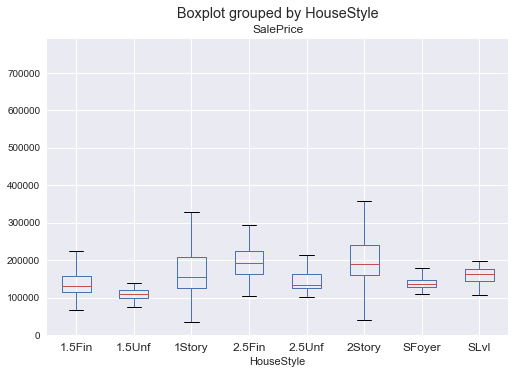

In [252]:
plot_category_correlation(train, 'HouseStyle')

## Overall material and finish quality

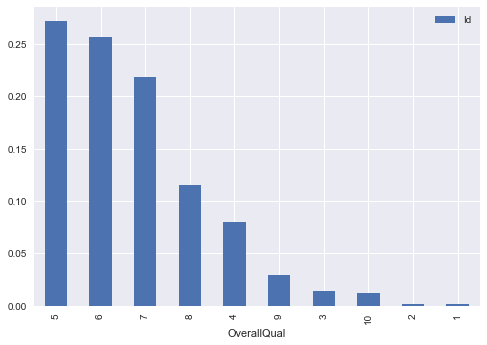

In [41]:
plot_category_distribution(train, 'OverallQual')

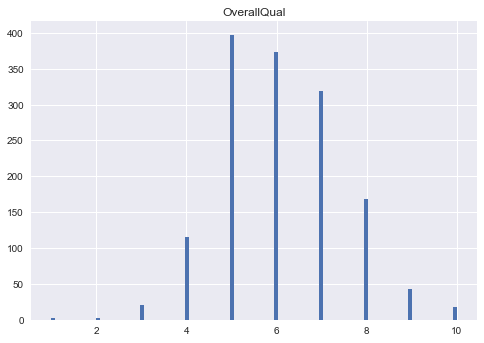

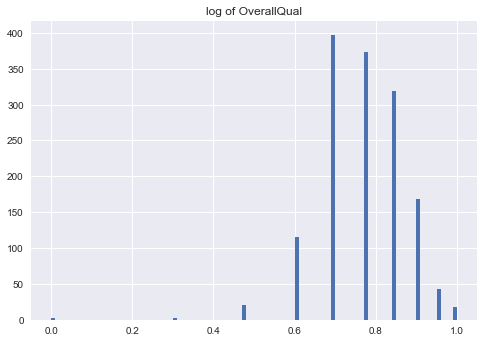

In [42]:
plot_histogram(train, 'OverallQual')

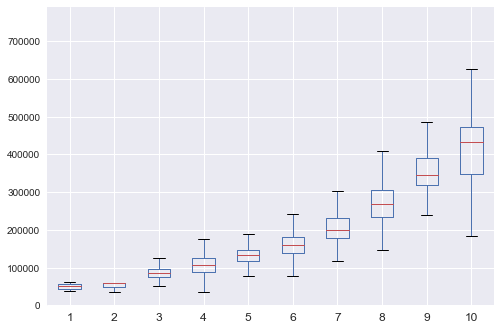

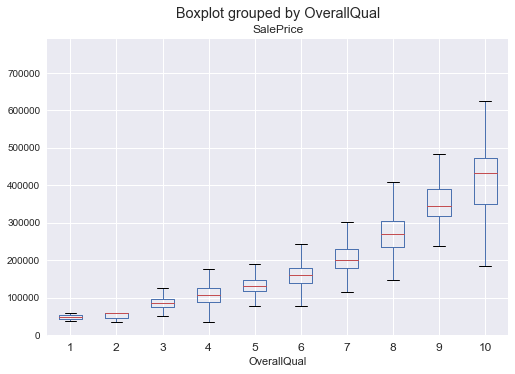

In [43]:
plot_category_correlation(train, 'OverallQual')

## Overall condition rating

Is it correlated with OveralQual?

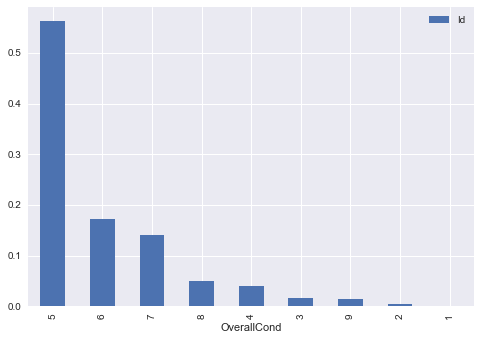

In [44]:
plot_category_distribution(train, 'OverallCond')

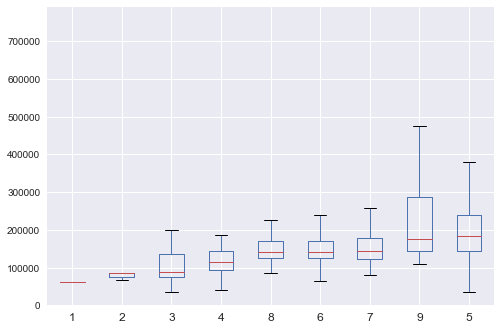

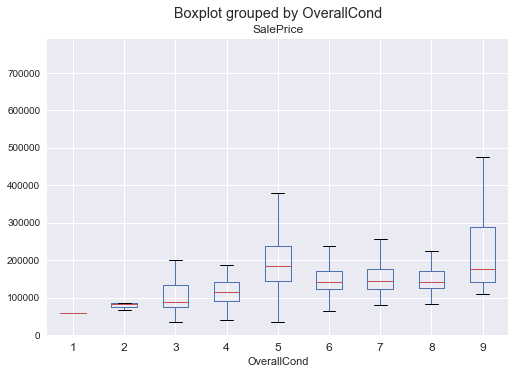

In [45]:
plot_category_correlation(train, 'OverallCond')

## Original construction date

create Feature = number of years building had when sold

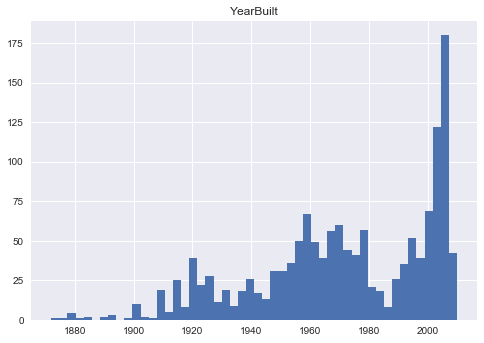

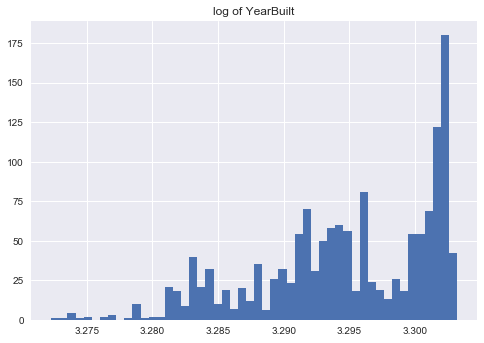

In [46]:
plot_histogram(train, 'YearBuilt', bins=50)

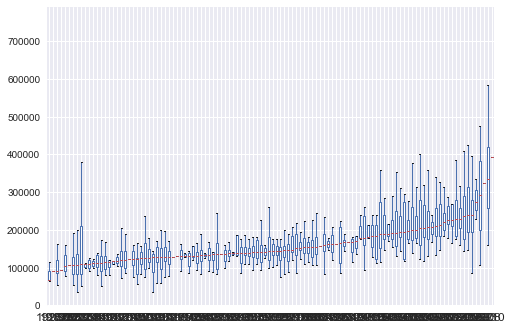

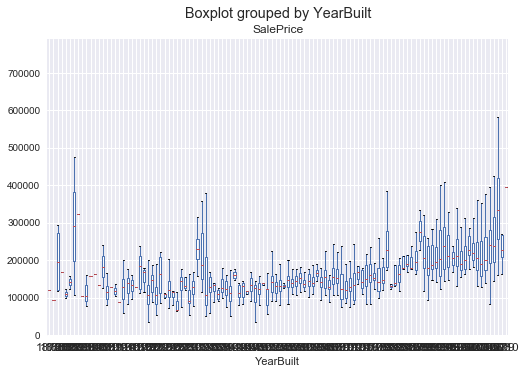

In [47]:
plot_category_correlation(train, 'YearBuilt')

R^2 = 0.273422


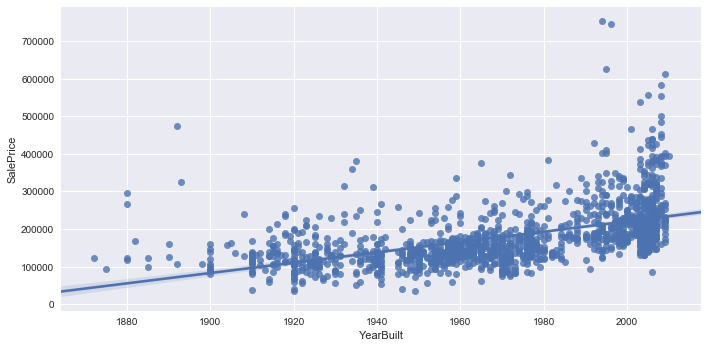

In [48]:
scatter_plot(train, 'YearBuilt', 'SalePrice')

## Remodel date

Feature = number of years after remodel house was sold

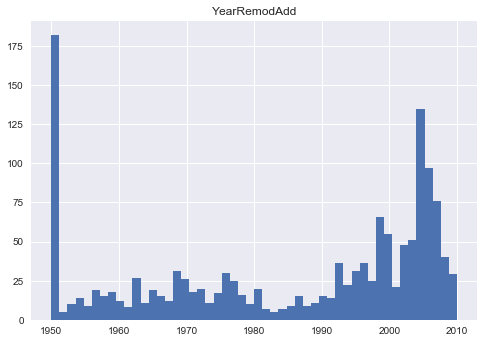

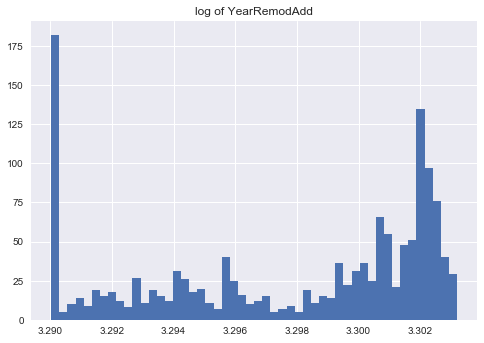

In [49]:
plot_histogram(train, 'YearRemodAdd', bins=50)

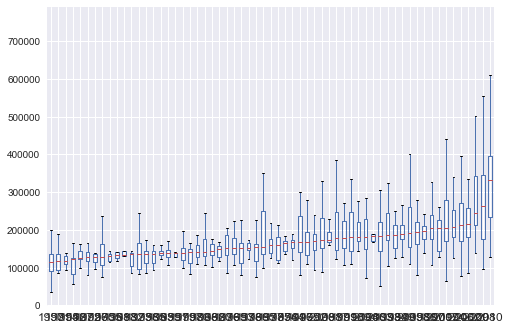

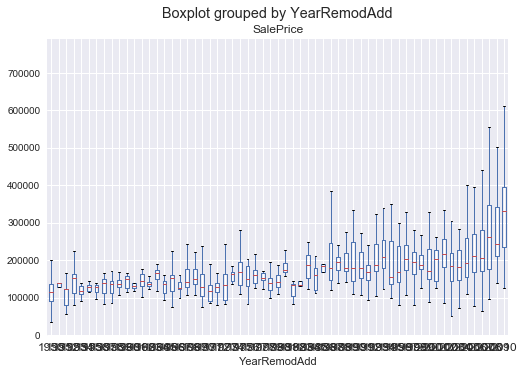

In [50]:
plot_category_correlation(train, 'YearRemodAdd')

R^2 = 0.257151


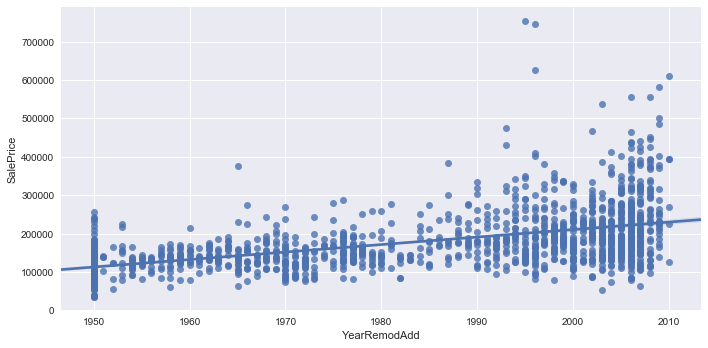

In [51]:
scatter_plot(train, 'YearRemodAdd', 'SalePrice')

## Type of roof

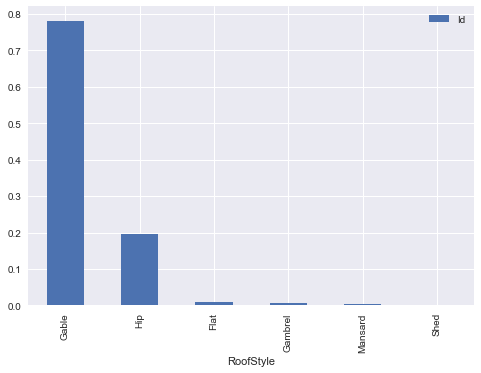

In [52]:
plot_category_distribution(train, 'RoofStyle')

Index(['Gambrel', 'Gable', 'Mansard', 'Hip', 'Flat', 'Shed'], dtype='object')


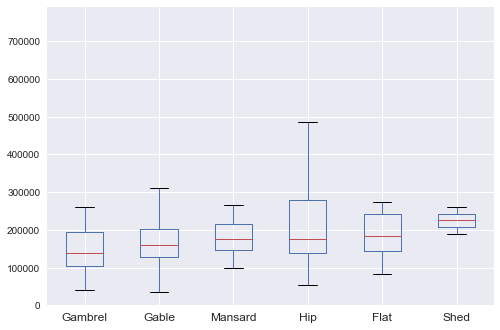

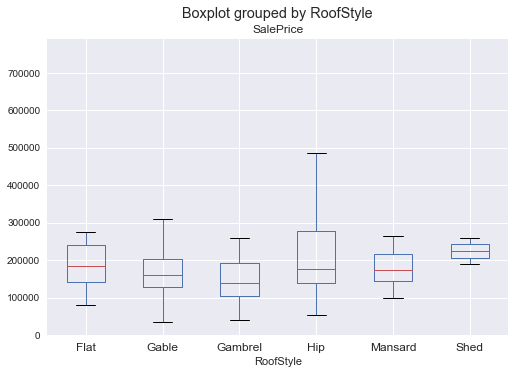

In [253]:
plot_category_correlation(train, 'RoofStyle')

## Roof material

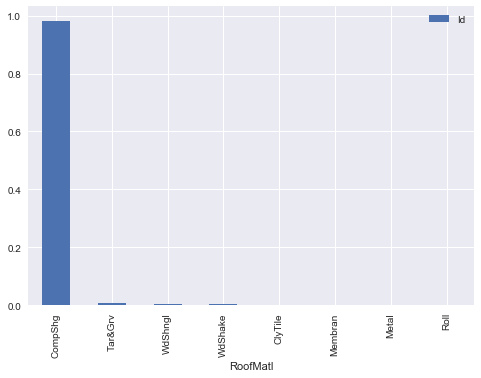

In [54]:
plot_category_distribution(train, 'RoofMatl')


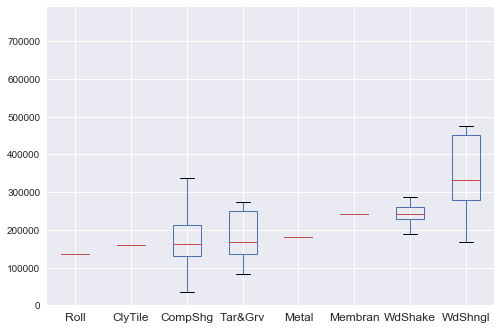

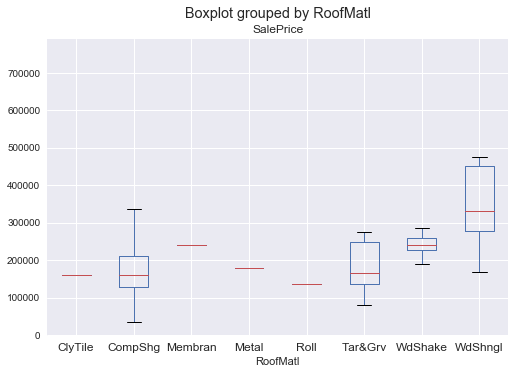

In [55]:
plot_category_correlation(train, 'RoofMatl')

## Exterior covering on house

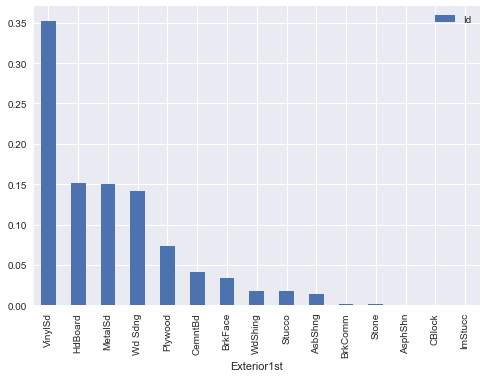

In [56]:
plot_category_distribution(train, 'Exterior1st')


Index(['BrkComm', 'AsphShn', 'CBlock', 'AsbShng', 'WdShing', 'Wd Sdng',
       'MetalSd', 'Stucco', 'HdBoard', 'BrkFace', 'Plywood', 'VinylSd',
       'CemntBd', 'Stone', 'ImStucc'],
      dtype='object')


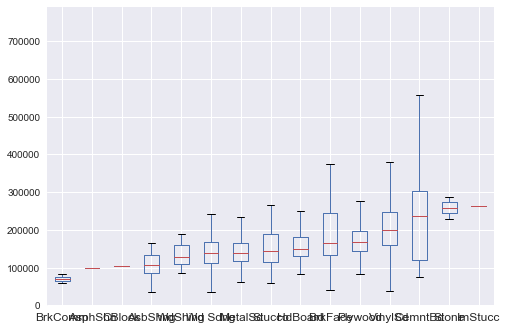

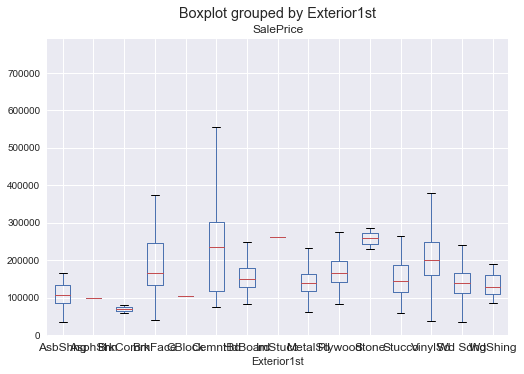

In [254]:
plot_category_correlation(train, 'Exterior1st')


## Exterior covering on house (if more than one material)


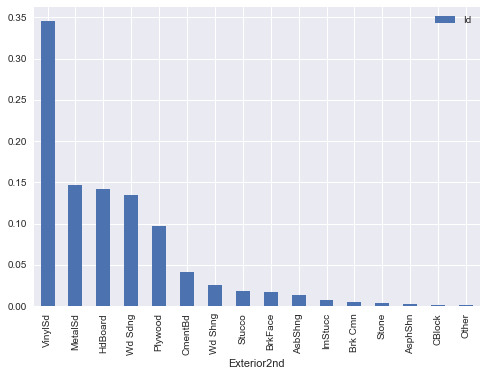

In [58]:
plot_category_distribution(train, 'Exterior2nd')


Index(['CBlock', 'AsbShng', 'Wd Sdng', 'Wd Shng', 'MetalSd', 'AsphShn',
       'Stucco', 'Brk Cmn', 'HdBoard', 'BrkFace', 'Plywood', 'Stone',
       'ImStucc', 'VinylSd', 'CmentBd', 'Other'],
      dtype='object')


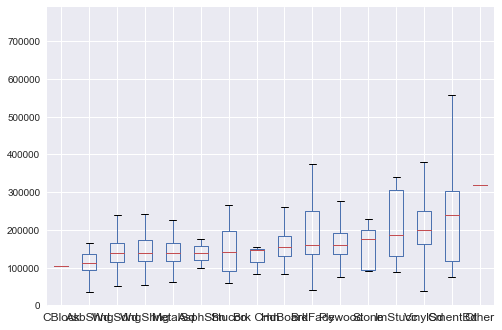

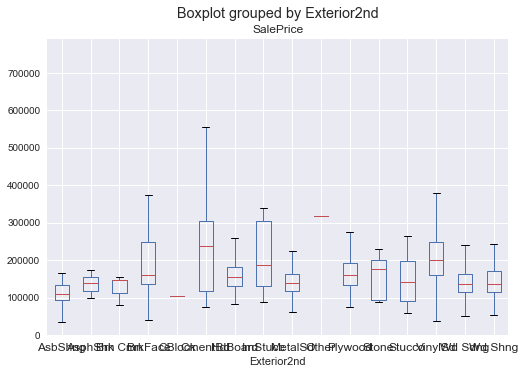

In [255]:
plot_category_correlation(train, 'Exterior2nd')


## Masonry veneer type

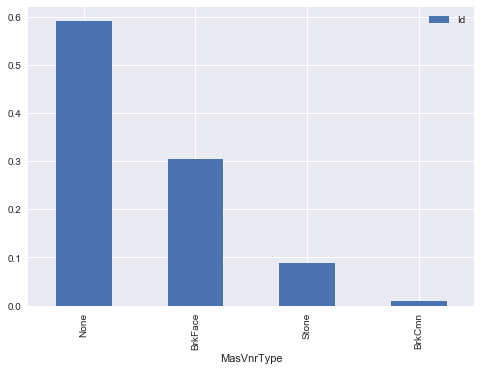

In [60]:
plot_category_distribution(train, 'MasVnrType')

Index(['BrkCmn', 'None', 'BrkFace', 'Stone'], dtype='object')


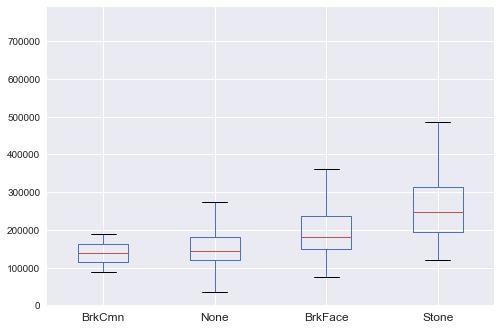

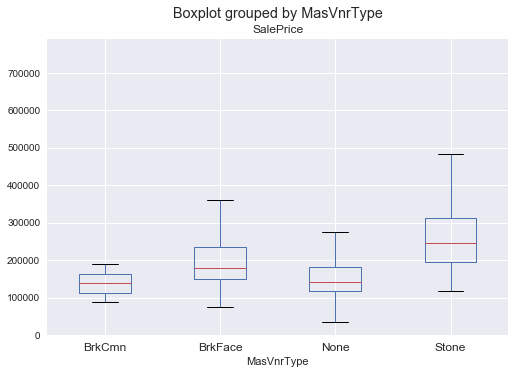

In [256]:
plot_category_correlation(train, 'MasVnrType')

## Masonry veneer area in square feet

Join this with previous feature somehow? Drop zeroes before analyzing?

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


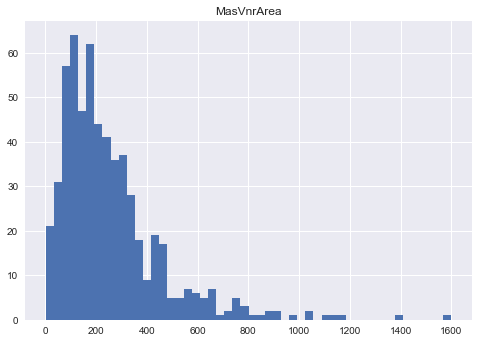

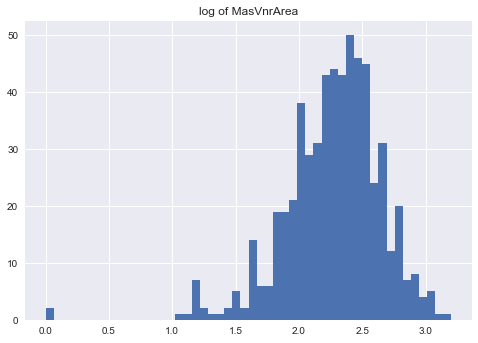

In [62]:
plot_histogram(train[train['MasVnrArea'] > 0], 'MasVnrArea', bins=50)

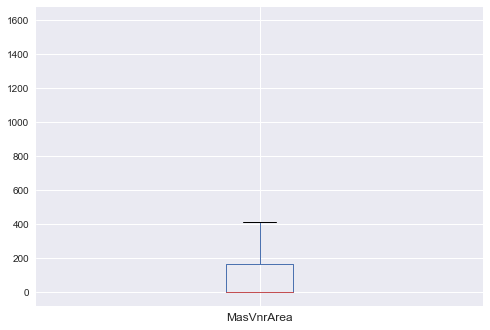

In [63]:
train.boxplot(column='MasVnrArea')

R^2 = 0.228000


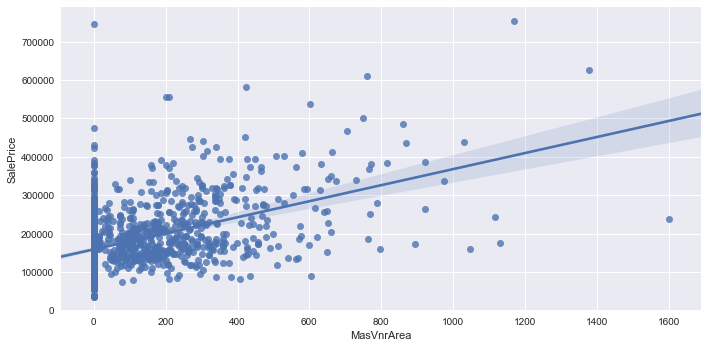

In [64]:
scatter_plot(train, 'MasVnrArea', 'SalePrice')

## HasMasonry

This is a new feature

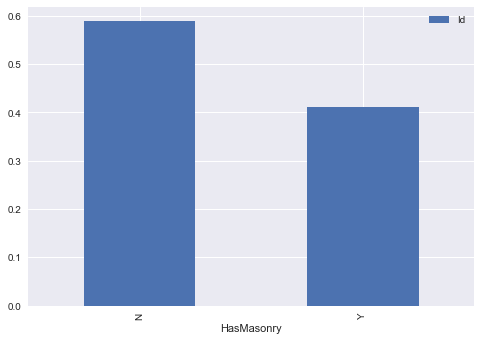

In [65]:
train['HasMasonry'] = train['MasVnrArea'].apply(lambda x: 'N' if x == 0 else 'Y')
plot_category_distribution(train, 'HasMasonry')

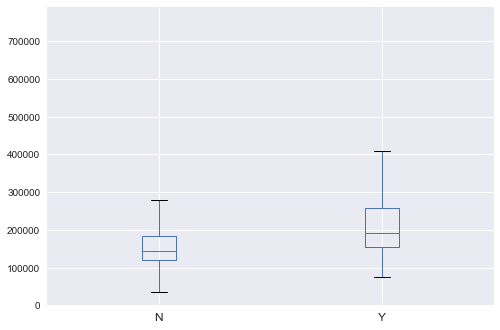

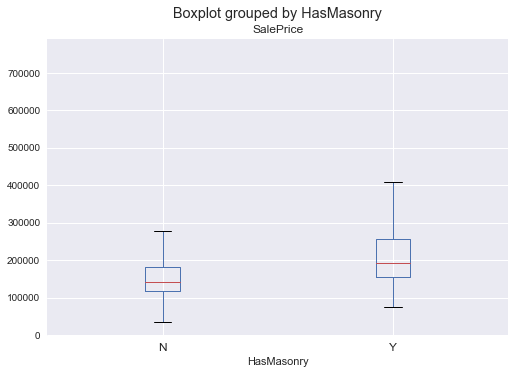

In [66]:
plot_category_correlation(train, 'HasMasonry')


## Exterior material quality

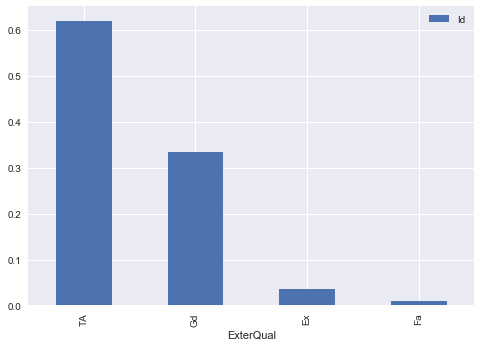

In [67]:
plot_category_distribution(train, 'ExterQual')

Index(['Fa', 'TA', 'Gd', 'Ex'], dtype='object')


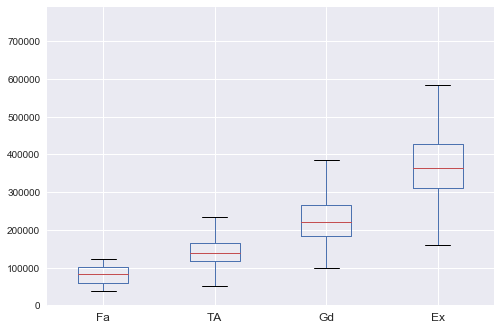

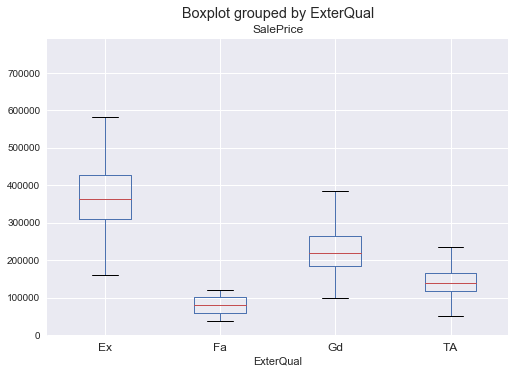

In [257]:
plot_category_correlation(train, 'ExterQual')


## Present condition of the material on the exterior

Join with previous feature somehow? Maybe conditions matters more for better materials.

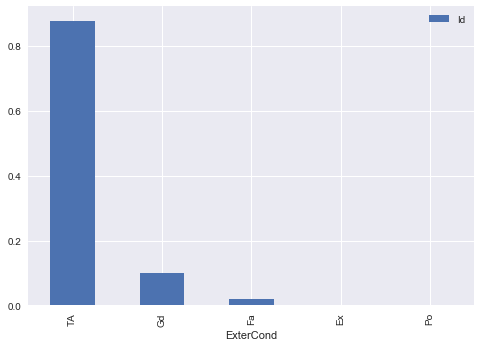

In [69]:
plot_category_distribution(train, 'ExterCond')

Index(['Po', 'Fa', 'Gd', 'Ex', 'TA'], dtype='object')


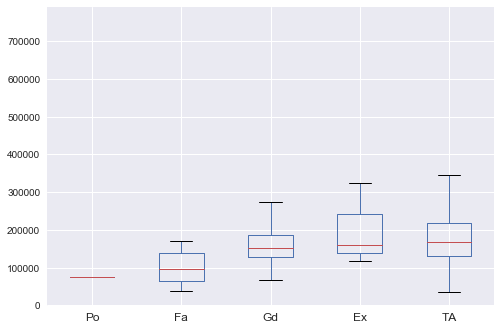

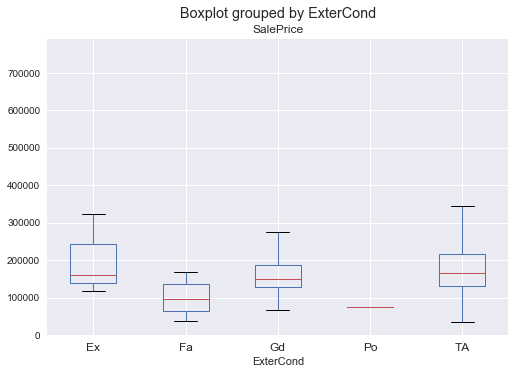

In [258]:
plot_category_correlation(train, 'ExterCond')

## Type of foundation

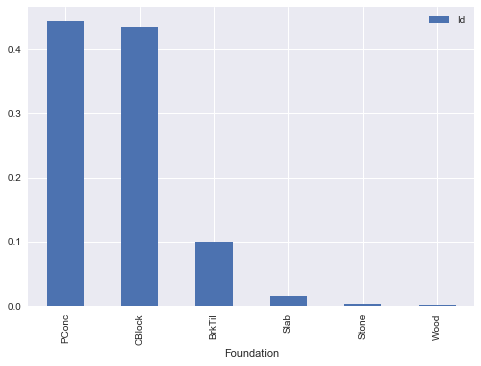

In [71]:
plot_category_distribution(train, 'Foundation')


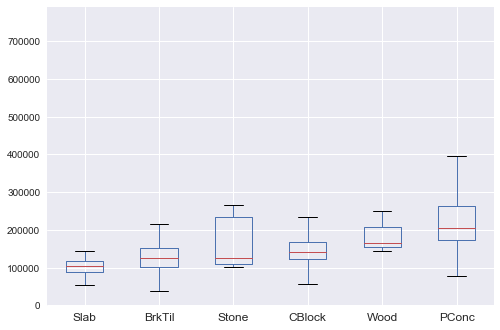

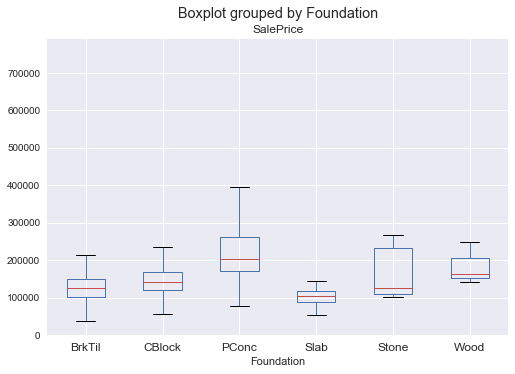

In [72]:
plot_category_correlation(train, 'Foundation')


## Height of the basement

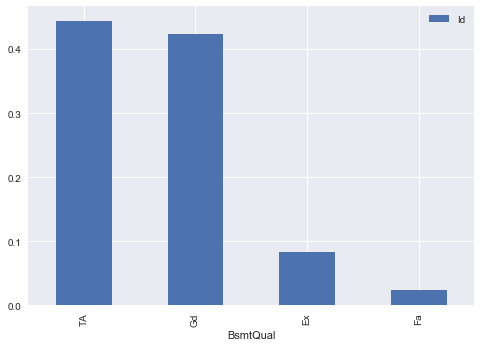

In [73]:
plot_category_distribution(train, 'BsmtQual')

Index(['Fa', 'TA', 'Gd', 'Ex'], dtype='object')


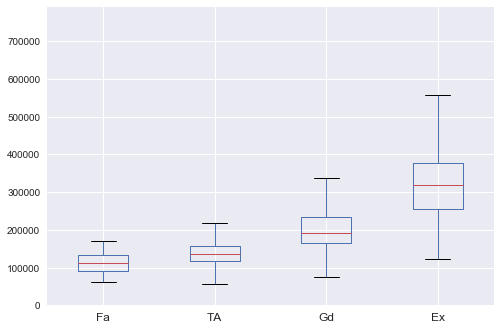

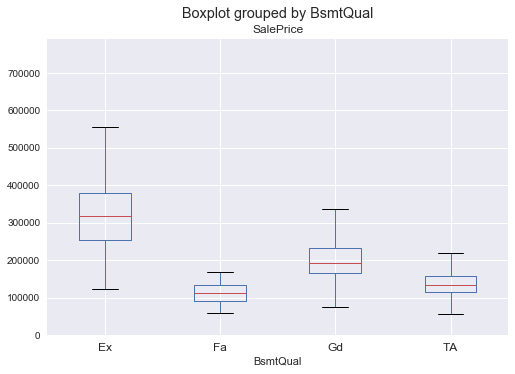

In [259]:
plot_category_correlation(train, 'BsmtQual')

## General condition of the basement

Combine with previous feature?

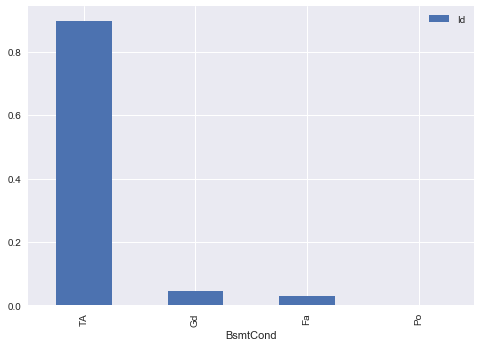

In [75]:
plot_category_distribution(train, 'BsmtCond')

Index(['Po', 'Fa', 'TA', 'Gd'], dtype='object')


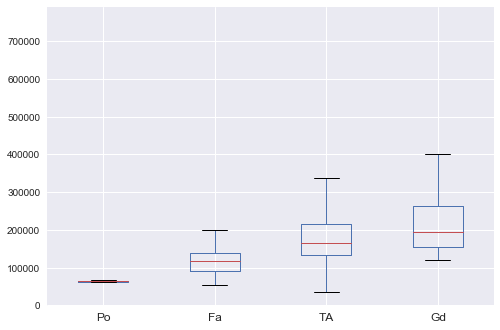

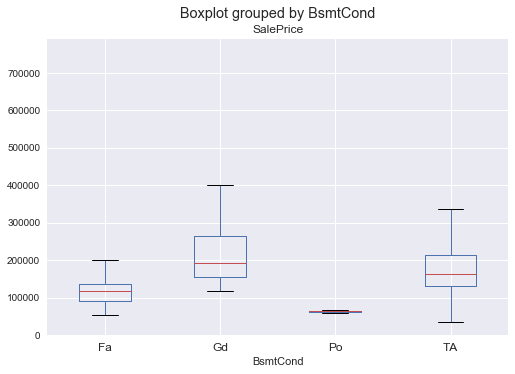

In [260]:
plot_category_correlation(train, 'BsmtCond')


## Walkout or garden level basement walls

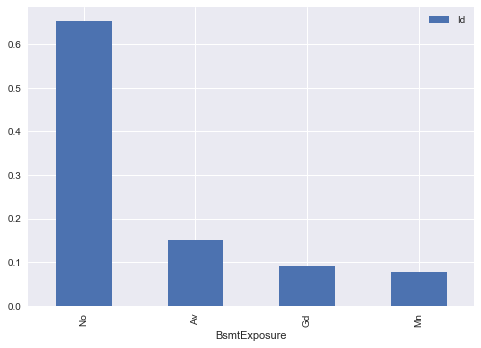

In [77]:
plot_category_distribution(train, 'BsmtExposure')


Index(['No', 'Mn', 'Av', 'Gd'], dtype='object')


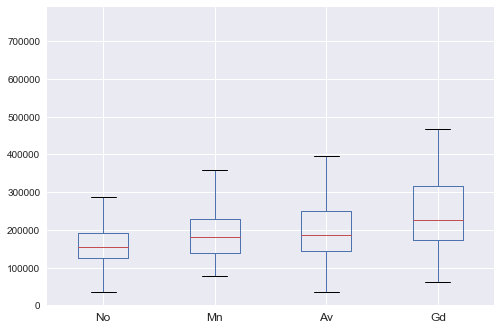

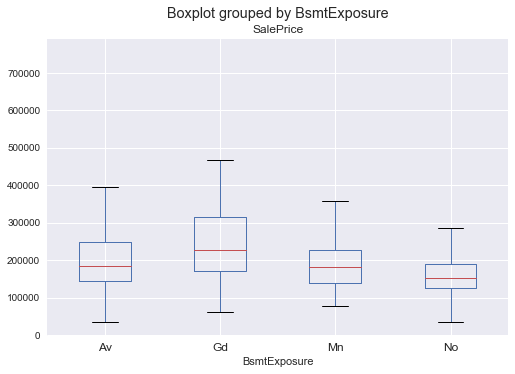

In [261]:
plot_category_correlation(train, 'BsmtExposure')


## Quality of basement finished area

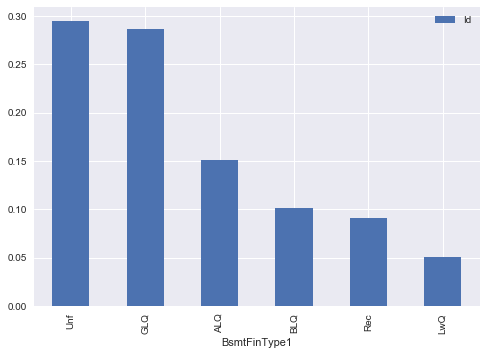

In [79]:
plot_category_distribution(train, 'BsmtFinType1')


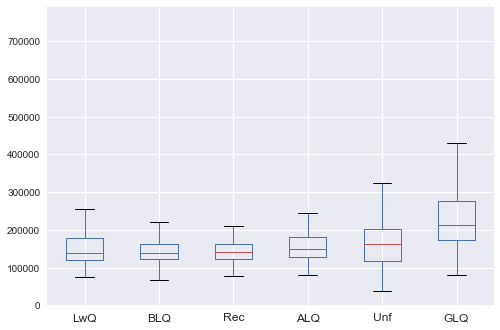

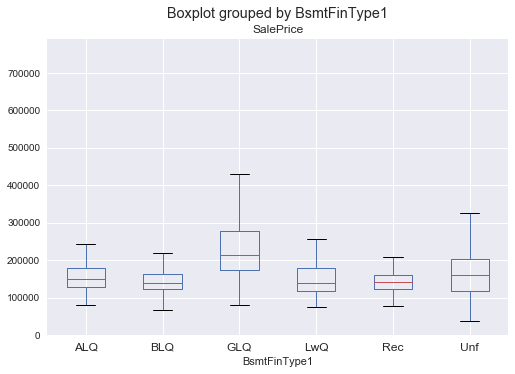

In [80]:
plot_category_correlation(train, 'BsmtFinType1')


## Type 1 finished square feet

Turn into binary variable, has or has not fintype2?

BsmtFinType2    38
dtype: int64

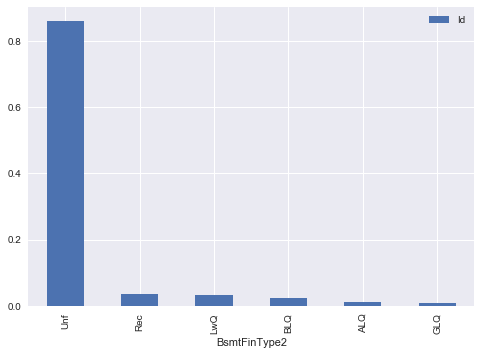

In [81]:
display(train[['BsmtFinType2']].apply(lambda x: sum(x.isnull())))
plot_category_distribution(train, 'BsmtFinType2')


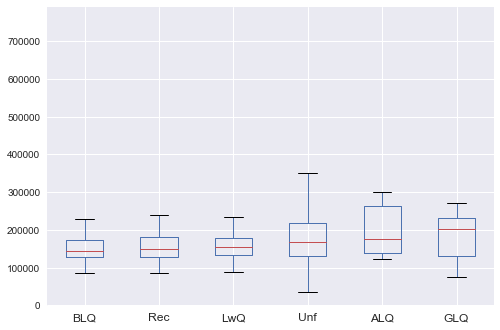

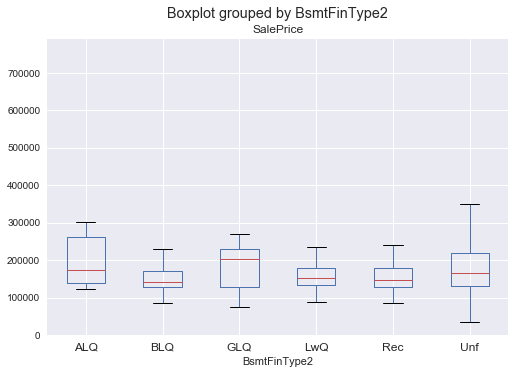

In [82]:
plot_category_correlation(train, 'BsmtFinType2')

## Type 2 finished square feet

Remove zeros before analyzing

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


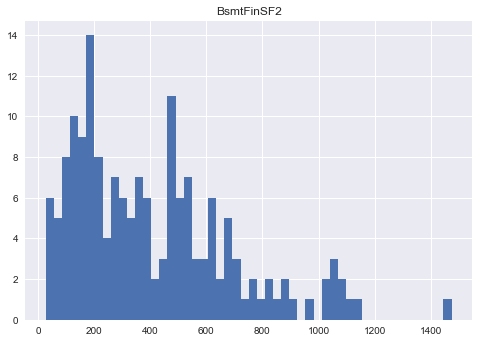

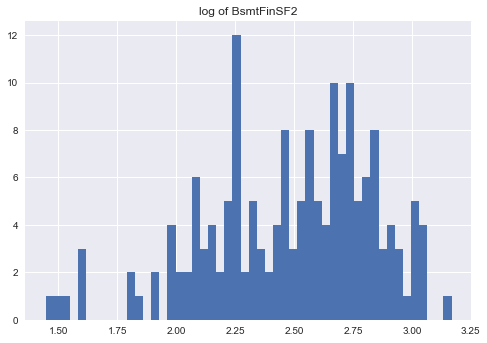

In [83]:
plot_histogram(train[train['BsmtFinSF2'] > 0], 'BsmtFinSF2', bins=50)

R^2 = 0.000129


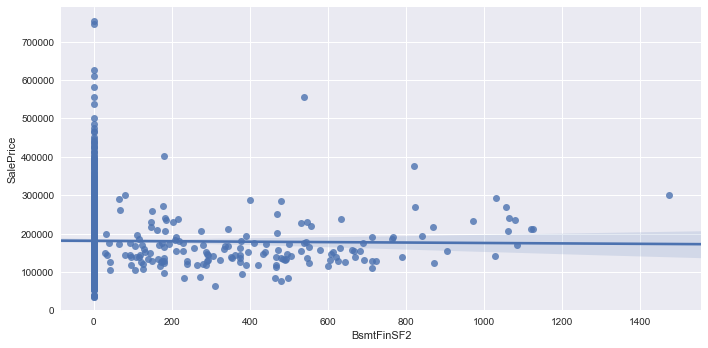

In [84]:
scatter_plot(train, 'BsmtFinSF2', 'SalePrice')

## HasType2

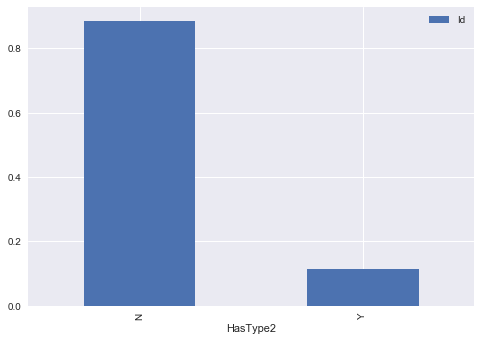

In [85]:
train['HasType2'] = train['BsmtFinSF2'].apply(lambda x: 'N' if x == 0 else 'Y')
plot_category_distribution(train, 'HasType2')

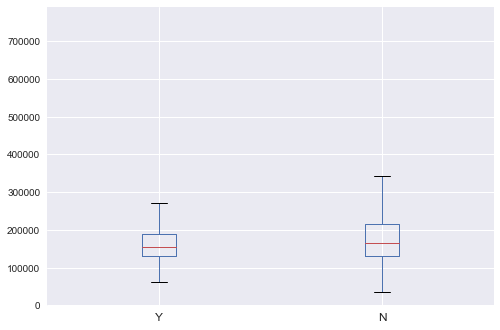

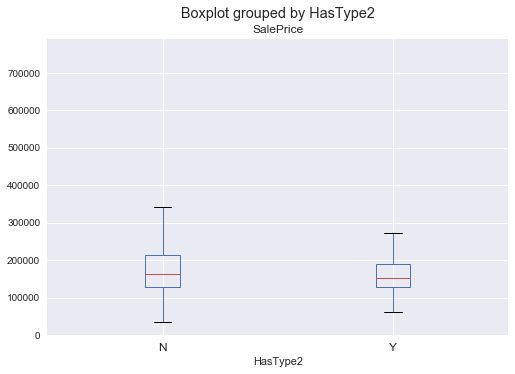

In [86]:
plot_category_correlation(train, 'HasType2')

## Unfinished square feet of basement area

Remove zeros before analyzing

R^2 = 0.046001


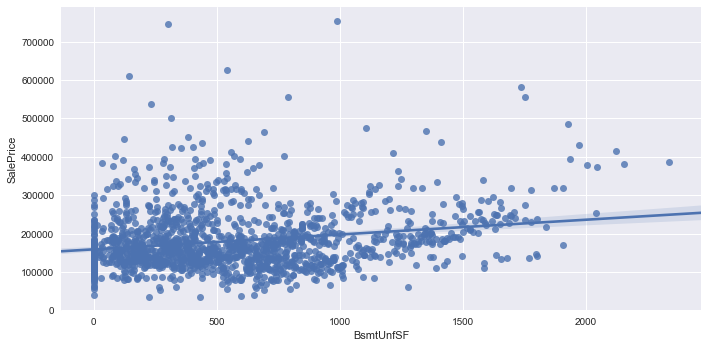

In [87]:
scatter_plot(train, 'BsmtUnfSF', 'SalePrice')

## HasUnfinishedBasement

This is a new feature

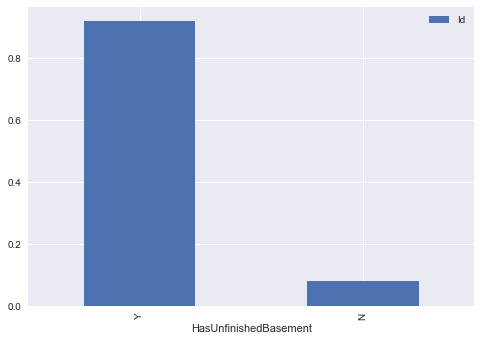

In [88]:
train['HasUnfinishedBasement'] = train['BsmtUnfSF'].apply(lambda x: 'N' if x == 0 else 'Y')
plot_category_distribution(train, 'HasUnfinishedBasement')

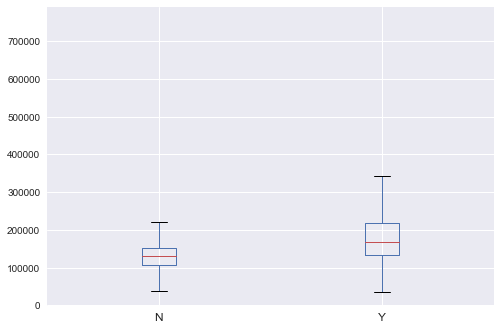

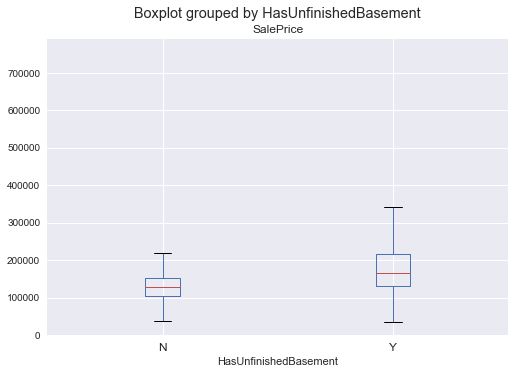

In [89]:
plot_category_correlation(train, 'HasUnfinishedBasement')

## Total square feet of basement area

Feature for total square feet of housing

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


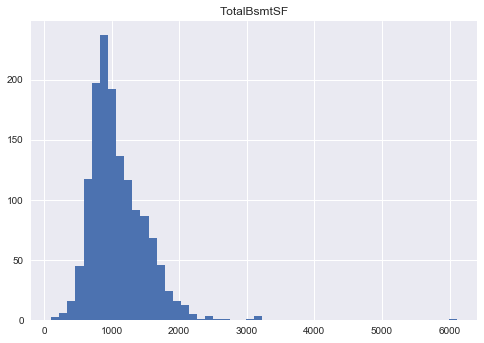

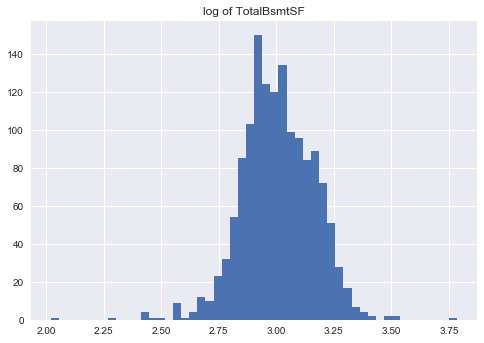

In [90]:
plot_histogram(train[train['TotalBsmtSF'] > 0], 'TotalBsmtSF', bins=50)

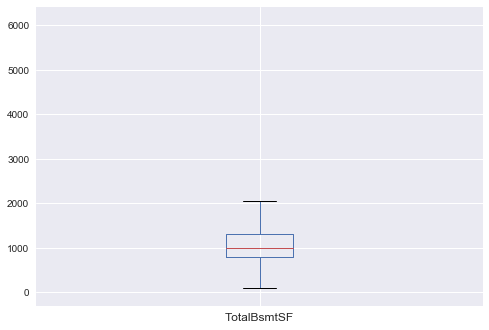

In [91]:
train.boxplot(column='TotalBsmtSF')


R^2 = 0.376481


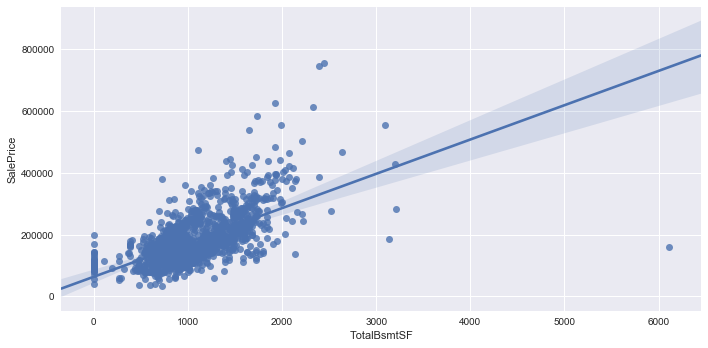

In [92]:
scatter_plot(train, 'TotalBsmtSF', 'SalePrice')

## Type of heating

Handle case of no heating. Maybe it's a better feature (binary, has or not). Same for similar variables.

Heating    0
dtype: int64

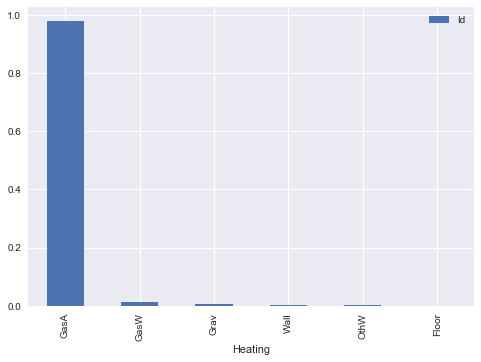

In [93]:
display(train[['Heating']].apply(lambda x: sum(x.isnull())))
plot_category_distribution(train, 'Heating')

Index(['Floor', 'Grav', 'Wall', 'OthW', 'GasW', 'GasA'], dtype='object')


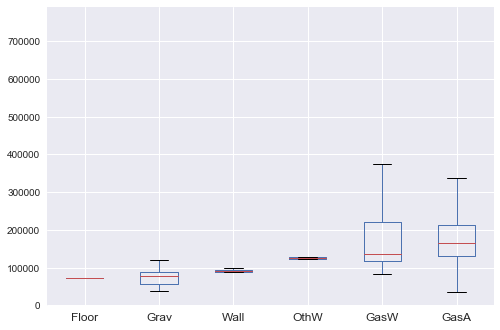

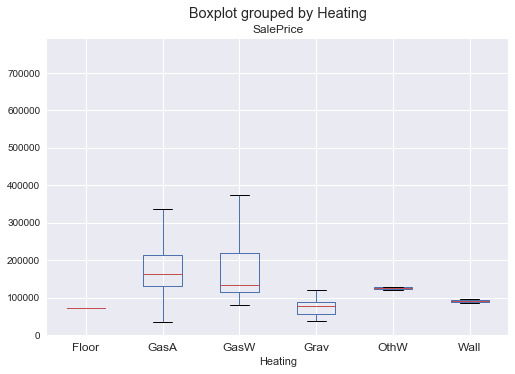

In [262]:
plot_category_correlation(train, 'Heating')

## Heating quality and condition

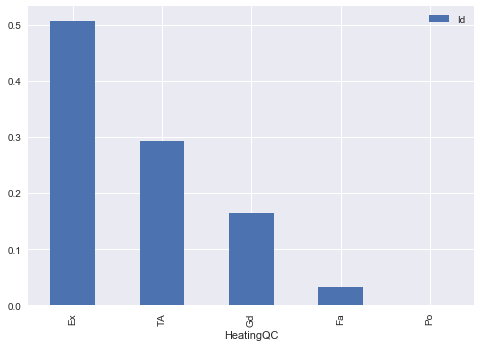

In [95]:
plot_category_distribution(train, 'HeatingQC')


Index(['Po', 'Fa', 'TA', 'Gd', 'Ex'], dtype='object')


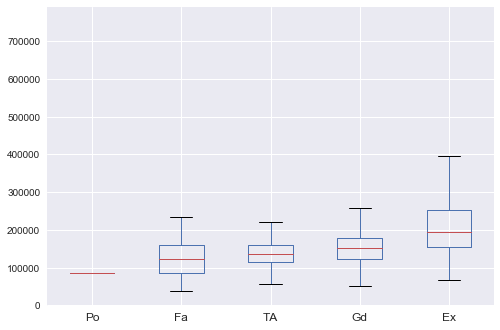

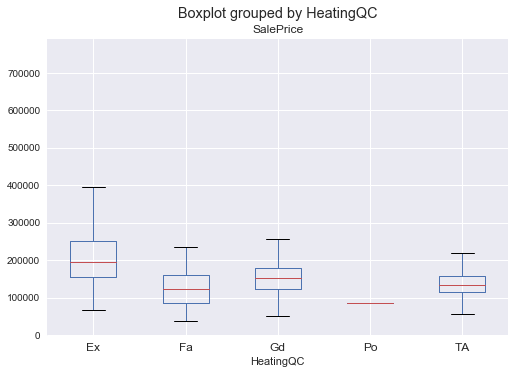

In [263]:
plot_category_correlation(train, 'HeatingQC')


## Central air conditioning

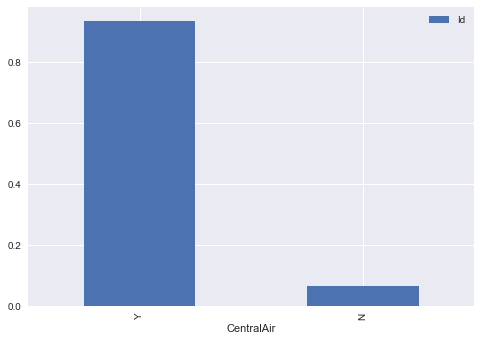

In [97]:
plot_category_distribution(train, 'CentralAir')


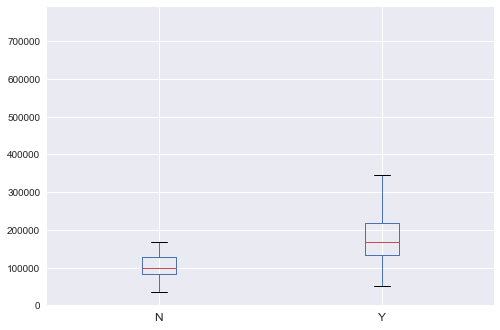

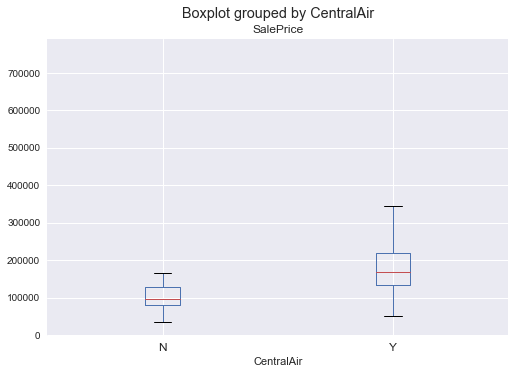

In [98]:
plot_category_correlation(train, 'CentralAir')

## Electrical system

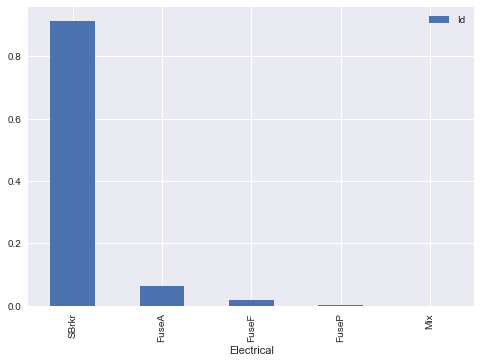

In [99]:
plot_category_distribution(train, 'Electrical')


Index(['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'], dtype='object')


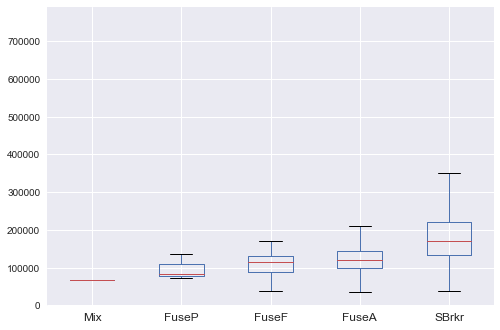

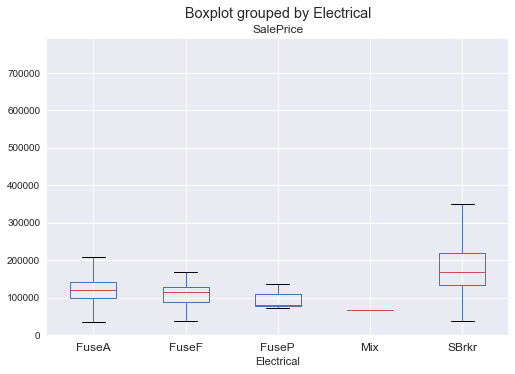

In [264]:
plot_category_correlation(train, 'Electrical')

## First Floor square feet

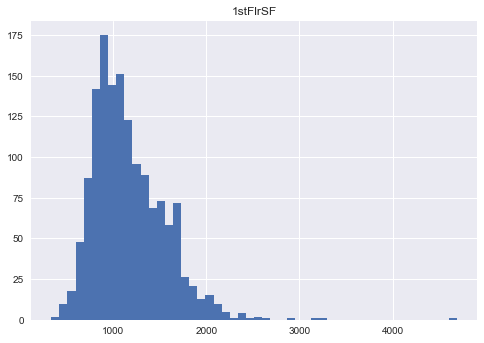

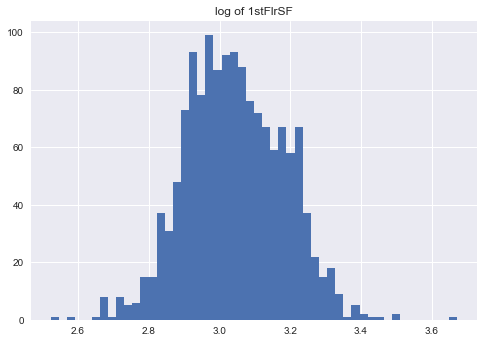

In [101]:
plot_histogram(train, '1stFlrSF', bins=50)

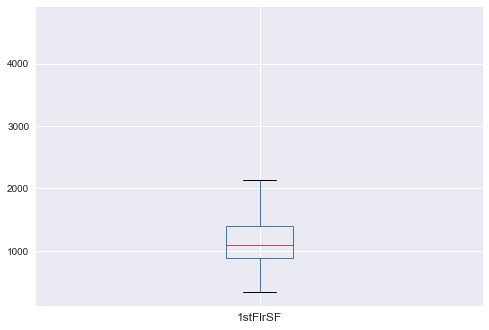

In [102]:
train.boxplot(column='1stFlrSF')

R^2 = 0.367057


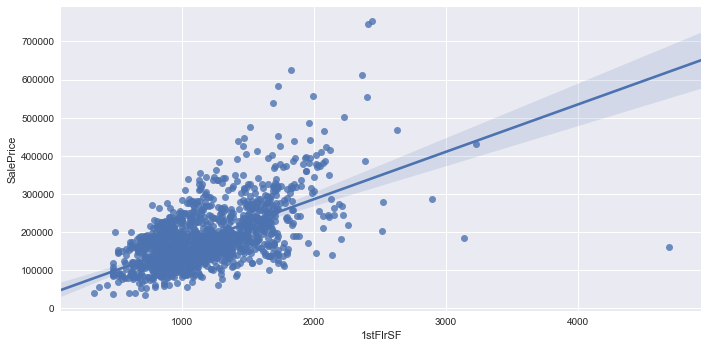

In [103]:
scatter_plot(train, '1stFlrSF', 'SalePrice')

### Analysis

Create feature for total area, if it does not exist

## Second floor square feet

Create feature for has or does not have second floor

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


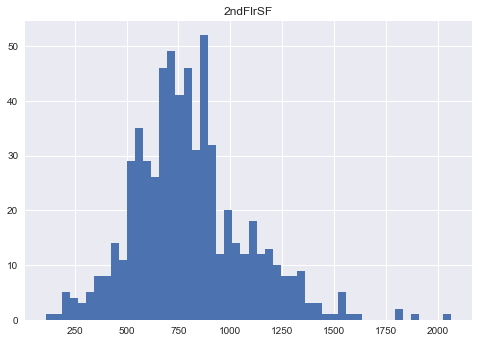

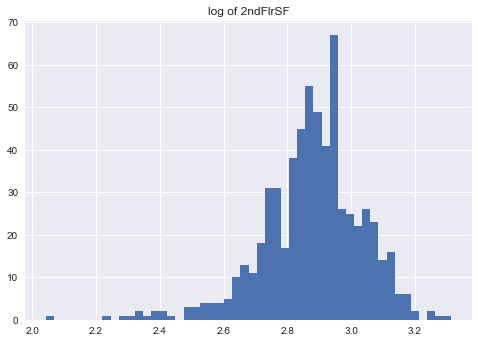

In [104]:
plot_histogram(train[train['2ndFlrSF'] > 0], '2ndFlrSF', bins=50)

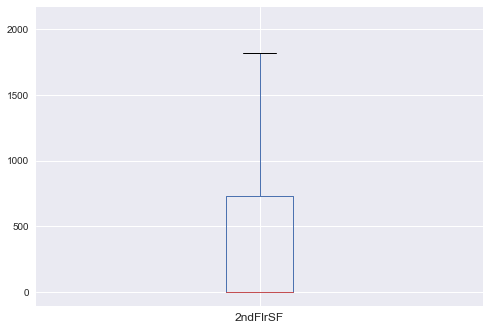

In [105]:
train.boxplot(column='2ndFlrSF')


R^2 = 0.101974


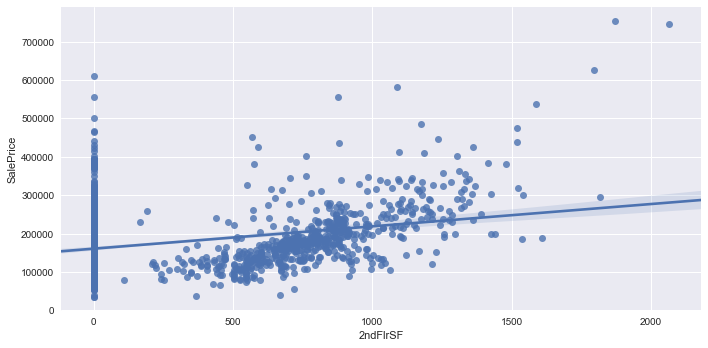

In [106]:
scatter_plot(train, '2ndFlrSF', 'SalePrice')

R^2 = 0.453339


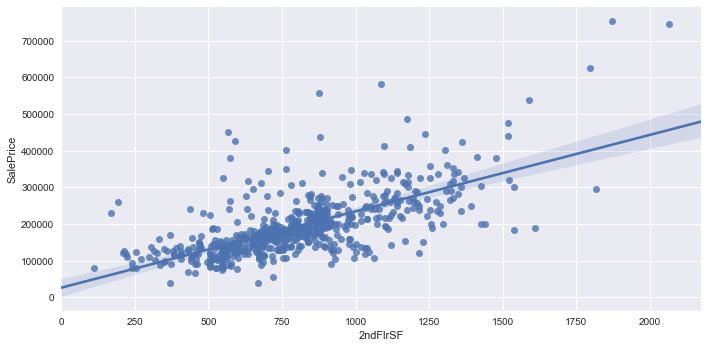

In [107]:
scatter_plot(train[train['2ndFlrSF'] > 0], '2ndFlrSF', 'SalePrice')

## HasSecondFloor

This is a new feature

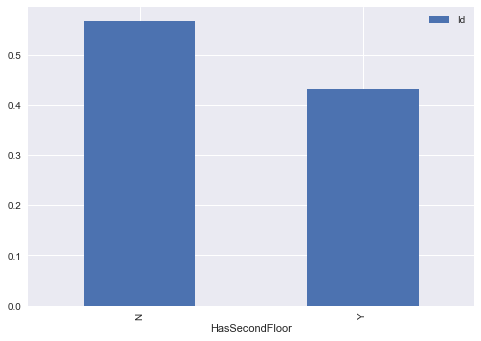

In [108]:
train['HasSecondFloor'] = train['2ndFlrSF'].apply(lambda x: 'N' if x == 0 else 'Y')
plot_category_distribution(train, 'HasSecondFloor')

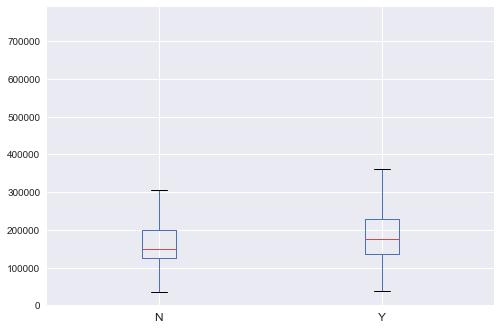

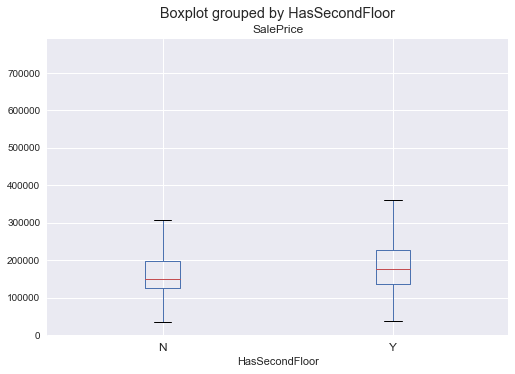

In [109]:
plot_category_correlation(train, 'HasSecondFloor')


## DuplexArea

This is a new feature

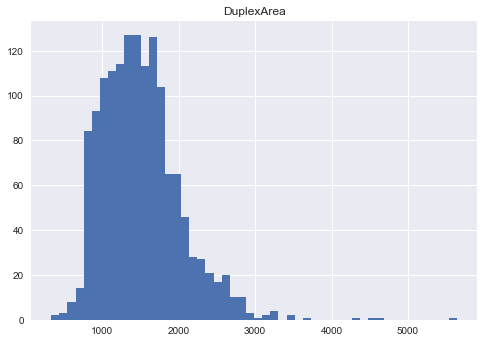

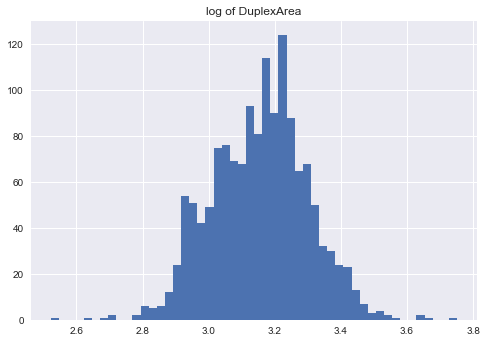

In [110]:
train['DuplexArea'] = train['1stFlrSF'] + train['2ndFlrSF']
plot_histogram(train, 'DuplexArea', bins=50)

R^2 = 0.513921


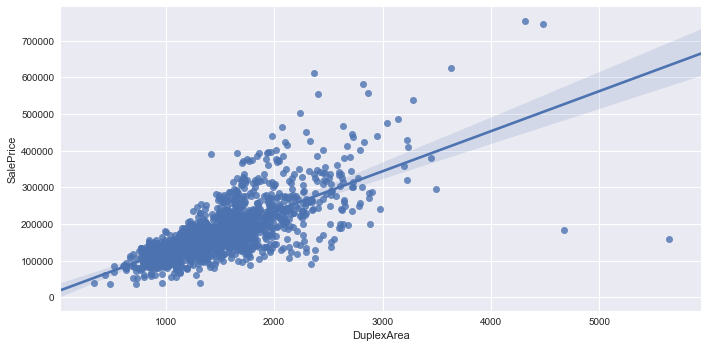

In [111]:
scatter_plot(train, 'DuplexArea', 'SalePrice')

## TriplexArea

This is a new feature

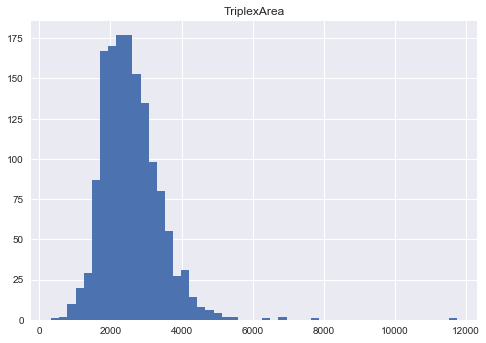

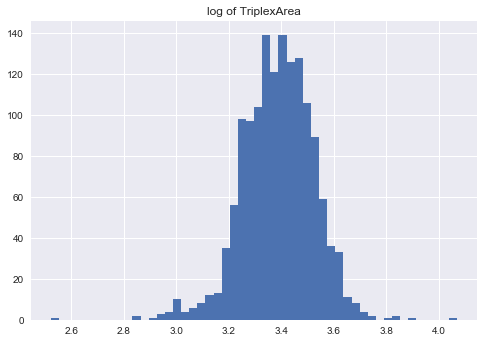

In [112]:
train['TriplexArea'] = train['DuplexArea'] + train['TotalBsmtSF']
plot_histogram(train, 'TriplexArea', bins=50)

R^2 = 0.611931


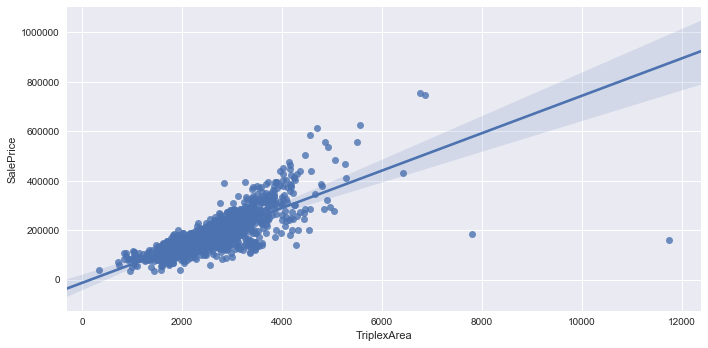

In [113]:
scatter_plot(train, 'TriplexArea', 'SalePrice')

## FourplexArea

This is a new feature. Includes garage area.

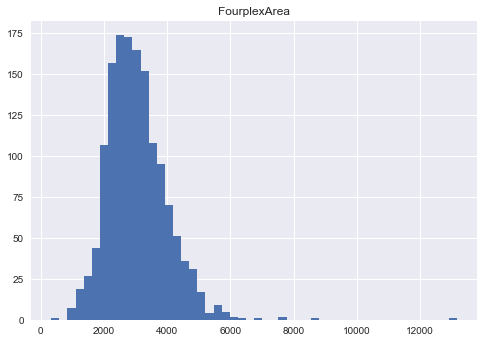

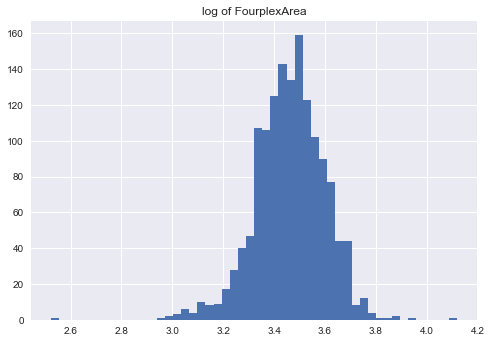

In [114]:
train['FourplexArea'] = train['TriplexArea'] + train['GarageArea']
plot_histogram(train, 'FourplexArea', bins=50)

R^2 = 0.655389


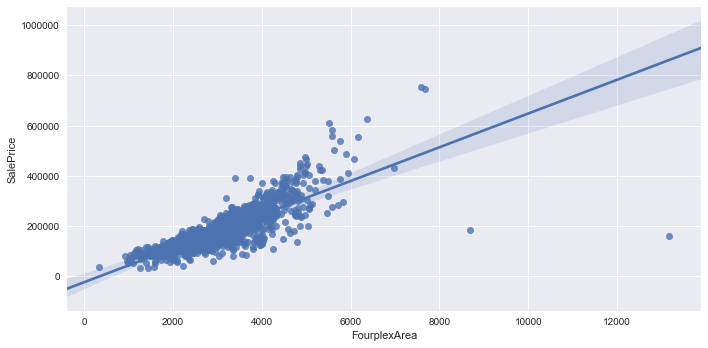

In [115]:
scatter_plot(train, 'FourplexArea', 'SalePrice')

## TotalArea

This is a new feature. Includes porch and deck area as well.

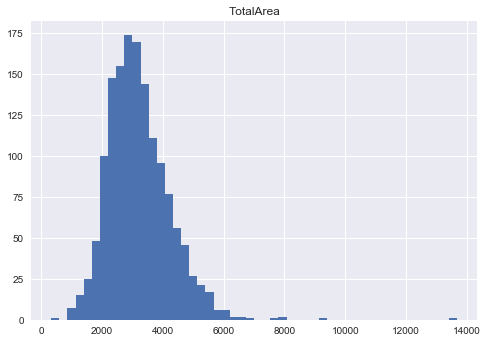

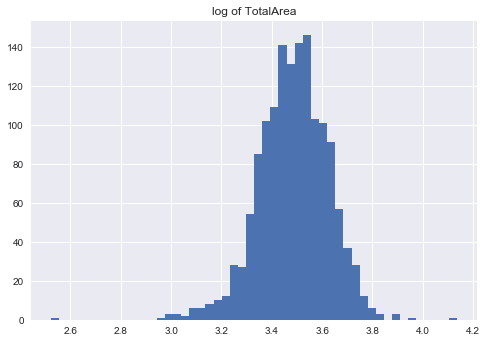

In [116]:
train['TotalArea'] = train['FourplexArea'] + train['WoodDeckSF'] + train['OpenPorchSF'] + train['EnclosedPorch'] + train['3SsnPorch'] + train['ScreenPorch']
plot_histogram(train, 'TotalArea', bins=50)

R^2 = 0.659435


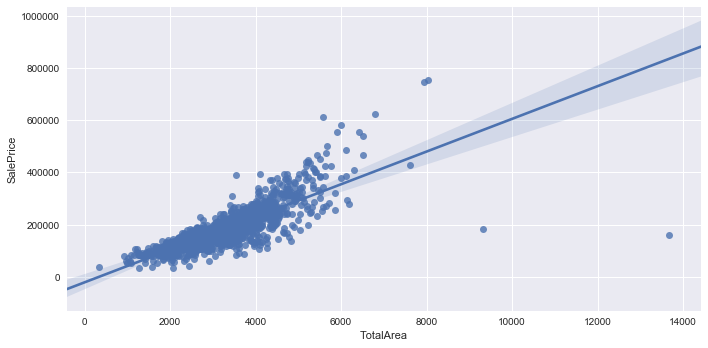

In [117]:
scatter_plot(train, 'TotalArea', 'SalePrice')

## TotalLivingArea

This is a new feature. Excludes garage.

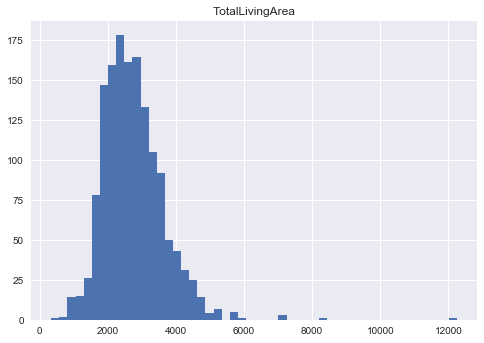

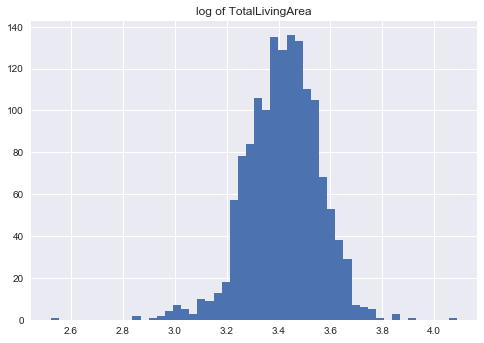

In [118]:
train['TotalLivingArea'] = train['TotalArea'] - train['GarageArea']
plot_histogram(train, 'TotalLivingArea', bins=50)

R^2 = 0.617998


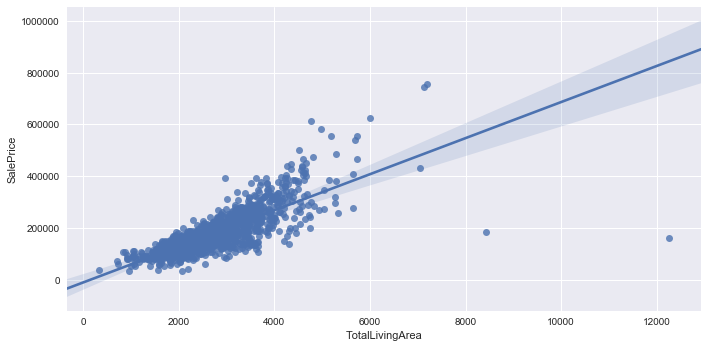

In [119]:
scatter_plot(train, 'TotalLivingArea', 'SalePrice')

## Low quality finished square feet (all floors)

Turn into binary variable?

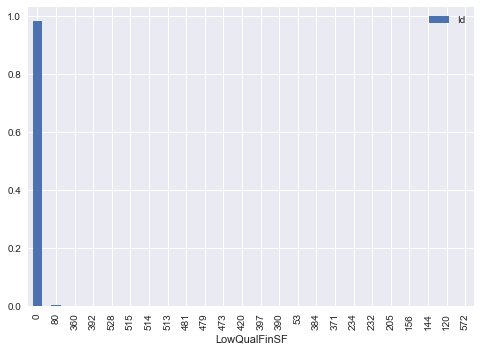

In [120]:
plot_category_distribution(train, 'LowQualFinSF')


## HasLowQualityFinishing

This is a new feature

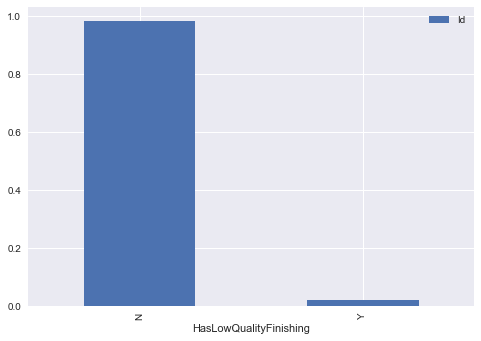

In [121]:
train['HasLowQualityFinishing'] = train['LowQualFinSF'].apply(lambda x: 'N' if x == 0 else 'Y')
plot_category_distribution(train, 'HasLowQualityFinishing')

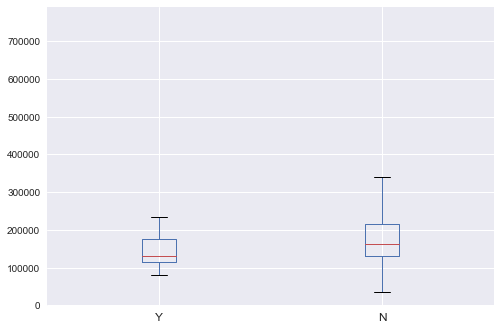

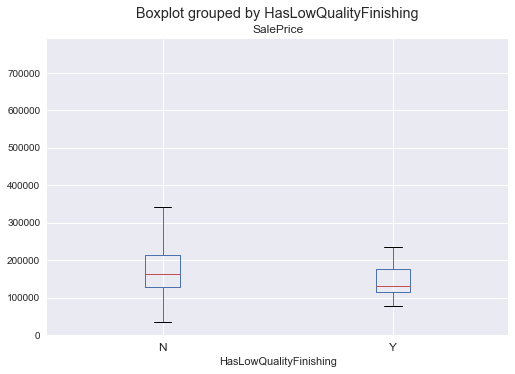

In [122]:
plot_category_correlation(train, 'HasLowQualityFinishing')


## Above grade (ground) living area square feet

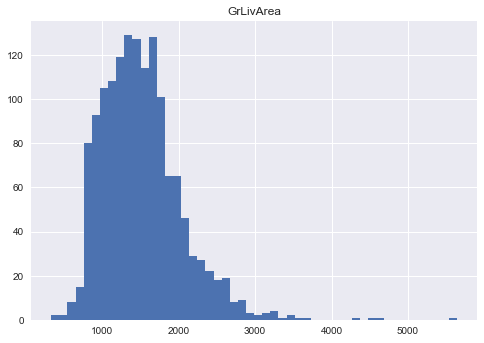

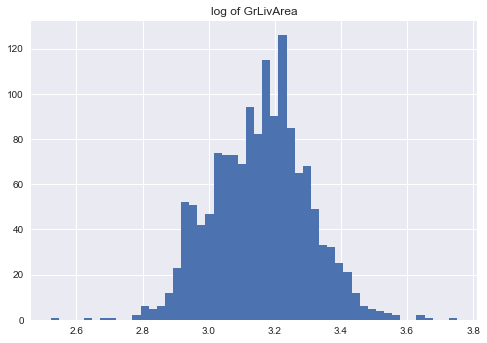

In [123]:
plot_histogram(train, 'GrLivArea', bins=50)

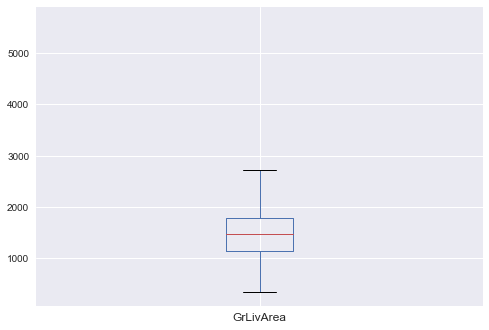

In [124]:
train.boxplot(column='GrLivArea')


R^2 = 0.502149


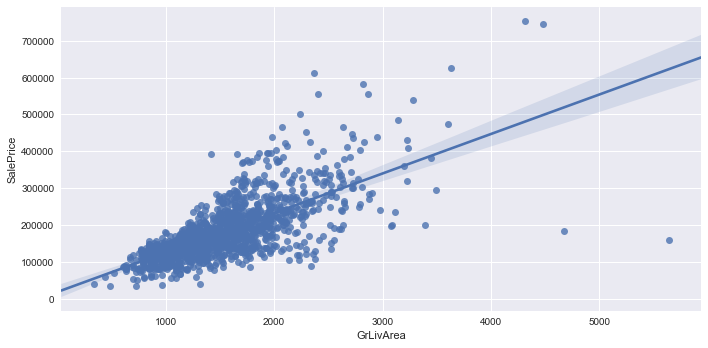

In [125]:
scatter_plot(train, 'GrLivArea', 'SalePrice')

## Basement full bathrooms

Turn into binary variable?

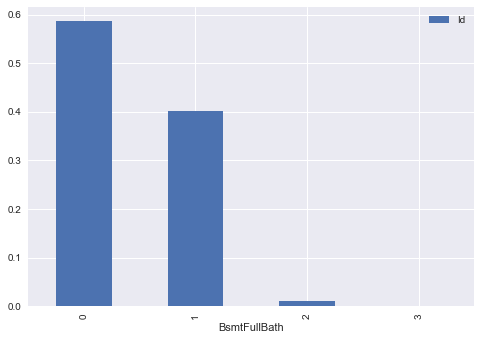

In [126]:
plot_category_distribution(train, 'BsmtFullBath')


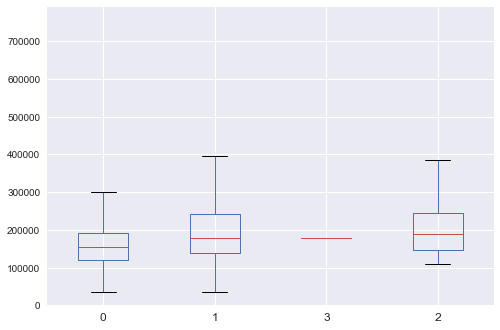

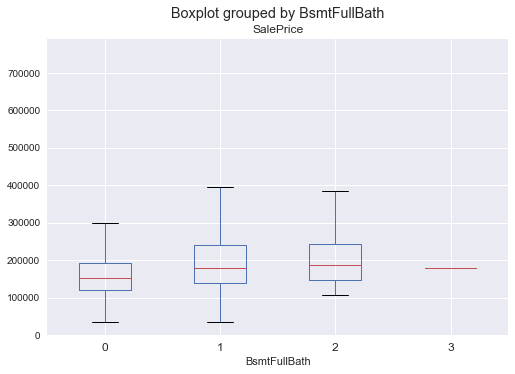

In [127]:
plot_category_correlation(train, 'BsmtFullBath')


## Basement half bathrooms

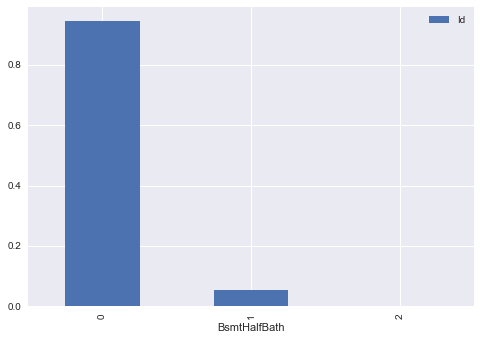

In [128]:
plot_category_distribution(train, 'BsmtHalfBath')


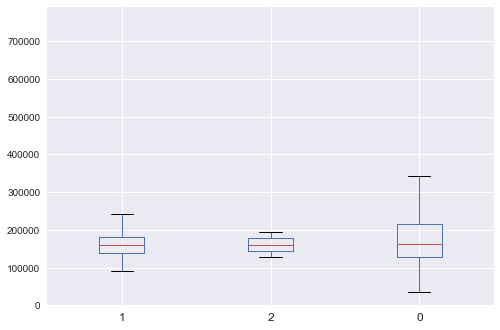

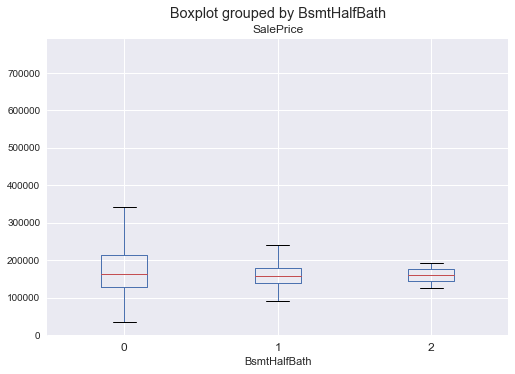

In [129]:
plot_category_correlation(train, 'BsmtHalfBath')


## Full bathrooms above grade

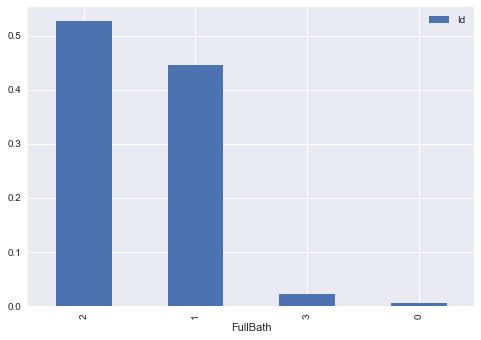

In [130]:
plot_category_distribution(train, 'FullBath')


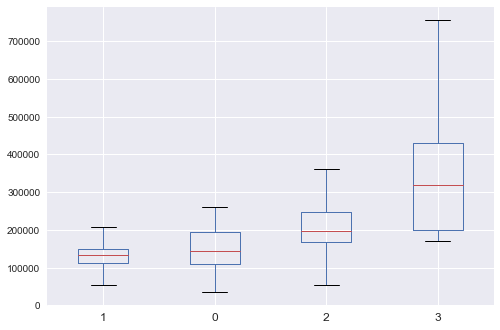

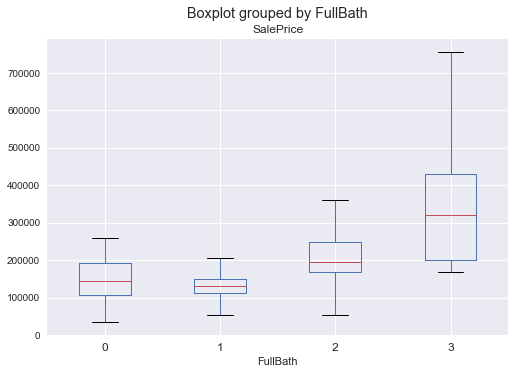

In [131]:
plot_category_correlation(train, 'FullBath')


## HasFullBathAboveGrade

This is a new feature

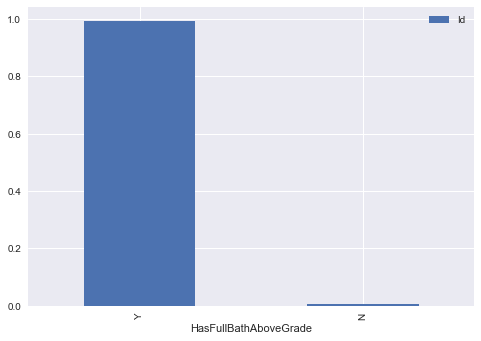

In [132]:
train['HasFullBathAboveGrade'] = train['FullBath'].apply(lambda x: 'N' if x == 0 else 'Y')
plot_category_distribution(train, 'HasFullBathAboveGrade')

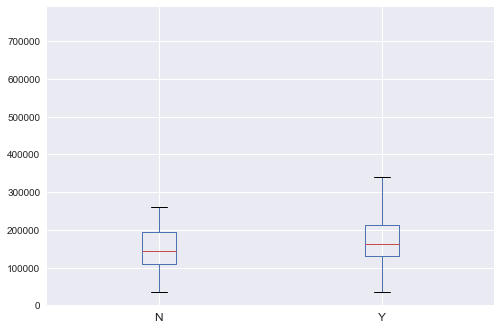

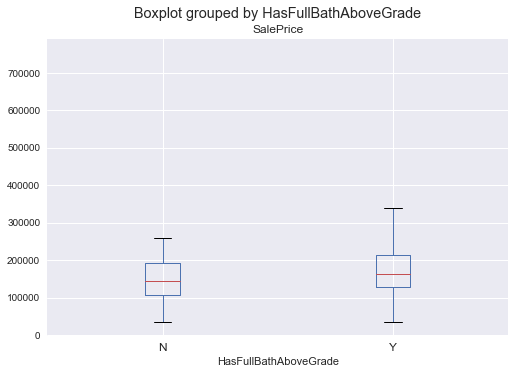

In [133]:
plot_category_correlation(train, 'HasFullBathAboveGrade')


## Half baths above grade

Feature for total number of bathrooms (full and half)?

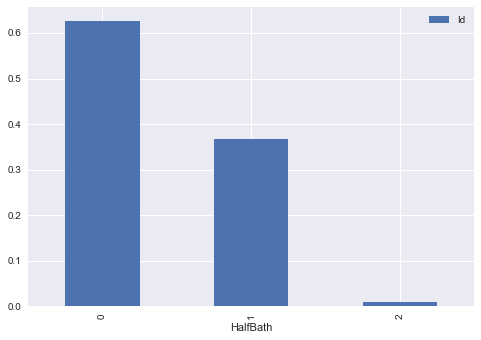

In [134]:
plot_category_distribution(train, 'HalfBath')


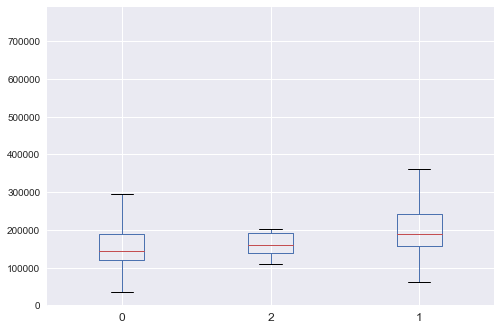

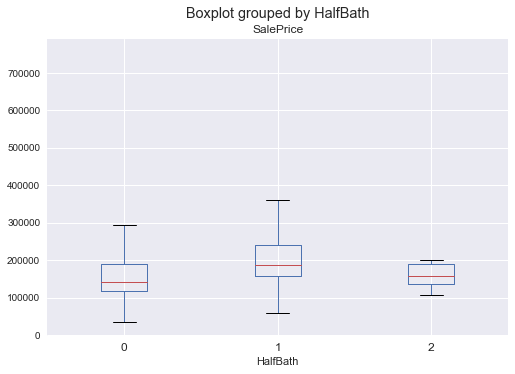

In [135]:
plot_category_correlation(train, 'HalfBath')


## HasHalfBathAboveGrade

This is a new feature


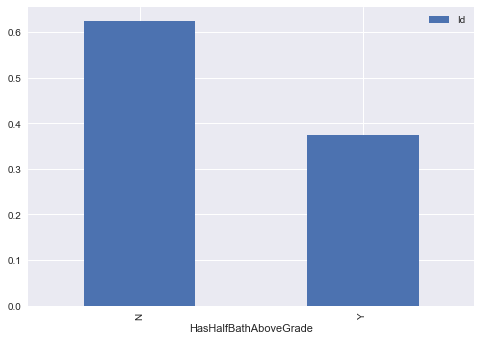

In [136]:
train['HasHalfBathAboveGrade'] = train['HalfBath'].apply(lambda x: 'N' if x == 0 else 'Y')
plot_category_distribution(train, 'HasHalfBathAboveGrade')

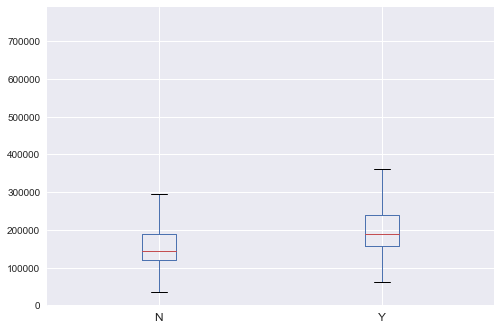

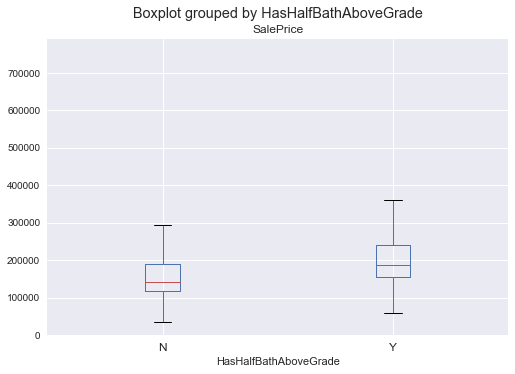

In [137]:
plot_category_correlation(train, 'HasHalfBathAboveGrade')


## TotalBathAboveGrade

This is a new feature

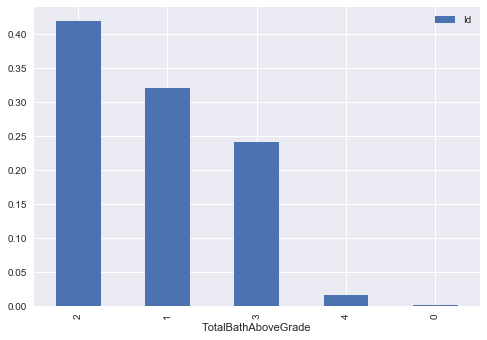

In [138]:
train['TotalBathAboveGrade'] = train['FullBath'] + train['HalfBath']
plot_category_distribution(train, 'TotalBathAboveGrade')


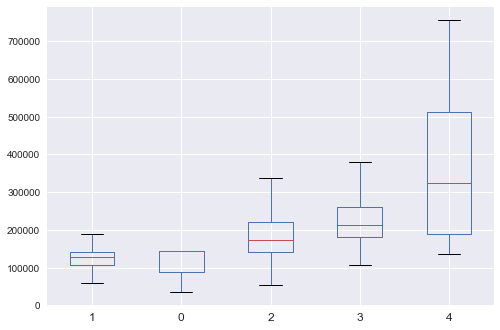

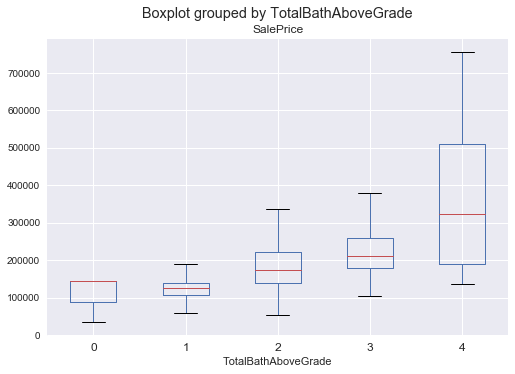

In [139]:
plot_category_correlation(train, 'TotalBathAboveGrade')


## HasBathAboveGrade

This is a new feature

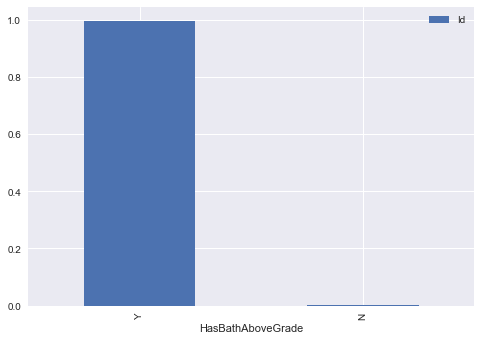

In [140]:
train['HasBathAboveGrade'] = train['TotalBathAboveGrade'].apply(lambda x: 'N' if x == 0 else 'Y')
plot_category_distribution(train, 'HasBathAboveGrade')

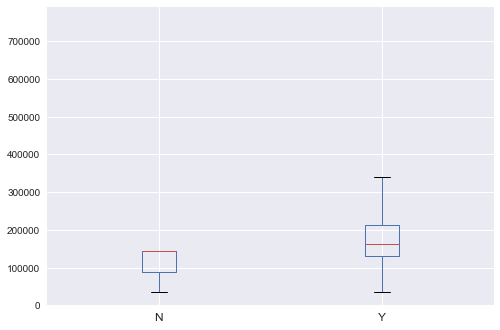

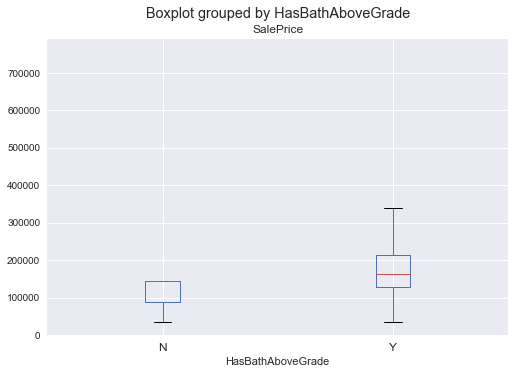

In [141]:
plot_category_correlation(train, 'HasBathAboveGrade')


## Number of bedrooms above basement level

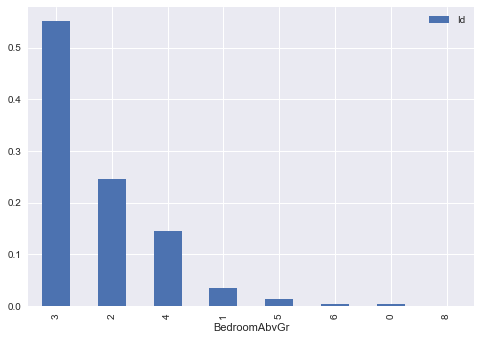

In [142]:
plot_category_distribution(train, 'BedroomAbvGr')


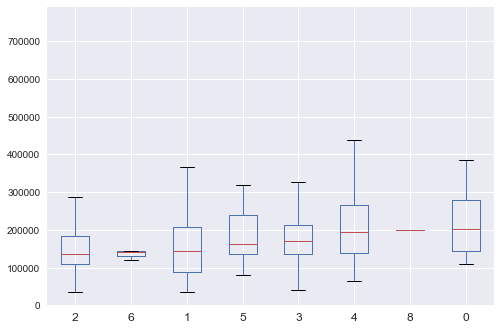

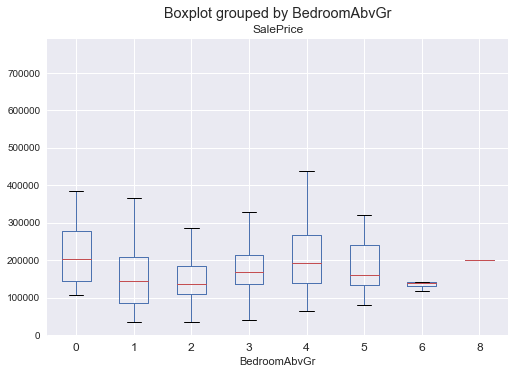

In [143]:
plot_category_correlation(train, 'BedroomAbvGr')


## Number of kitchens

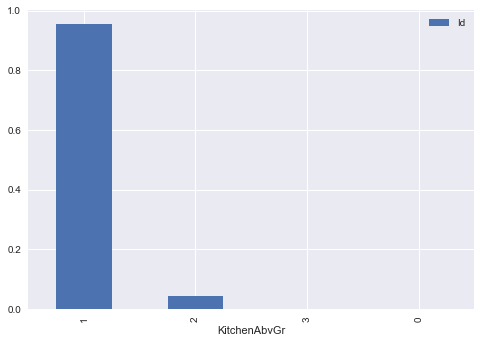

In [144]:
plot_category_distribution(train, 'KitchenAbvGr')


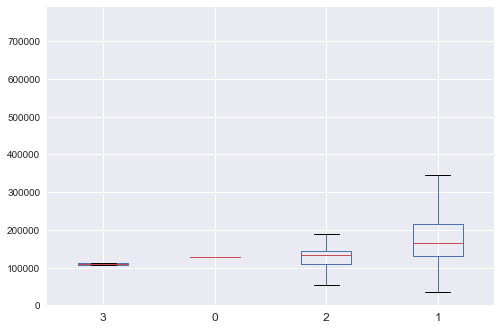

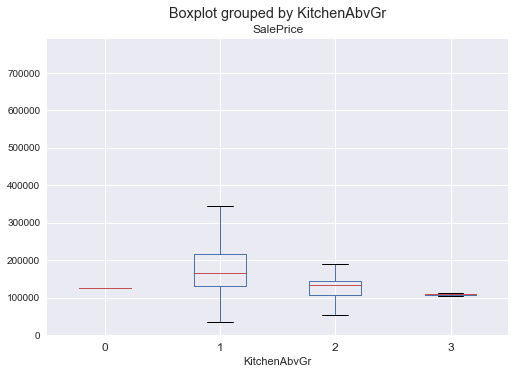

In [145]:
plot_category_correlation(train, 'KitchenAbvGr')


## Kitchen quality

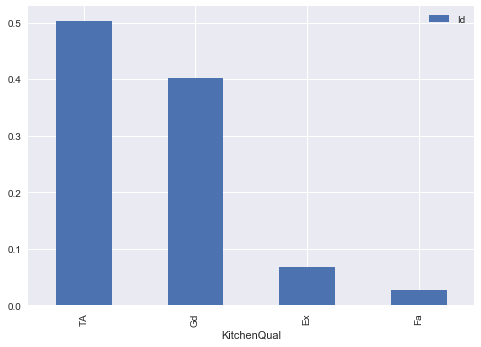

In [146]:
plot_category_distribution(train, 'KitchenQual')


Index(['Fa', 'TA', 'Gd', 'Ex'], dtype='object')


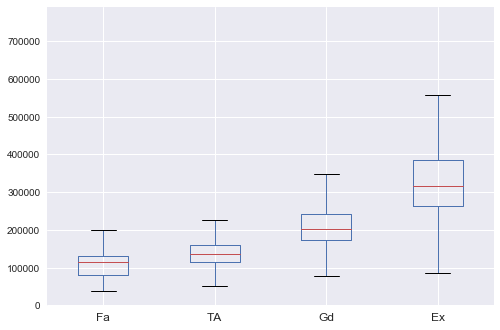

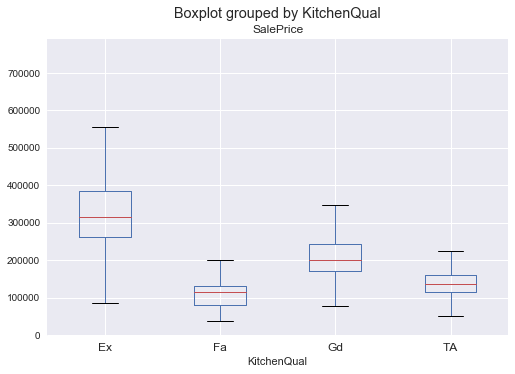

In [265]:
plot_category_correlation(train, 'KitchenQual')


## Total rooms above grade (does not include bathrooms)

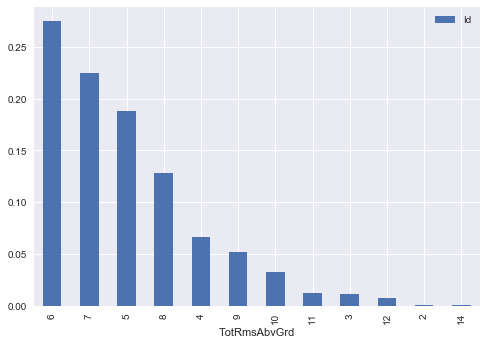

In [148]:
plot_category_distribution(train, 'TotRmsAbvGrd')


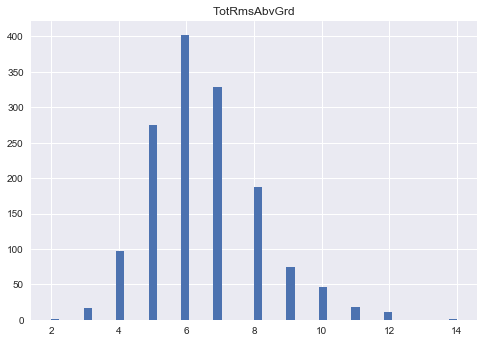

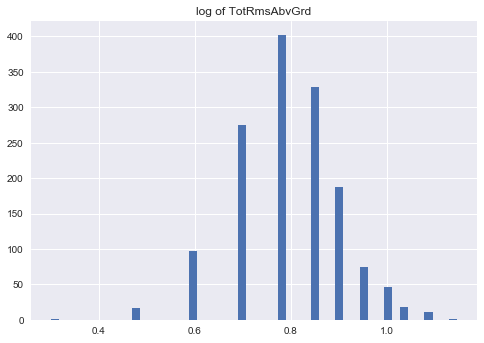

In [149]:
plot_histogram(train, 'TotRmsAbvGrd', bins=50)


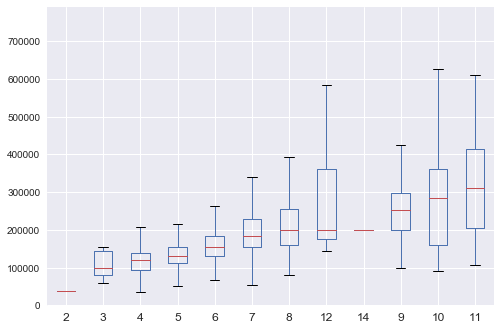

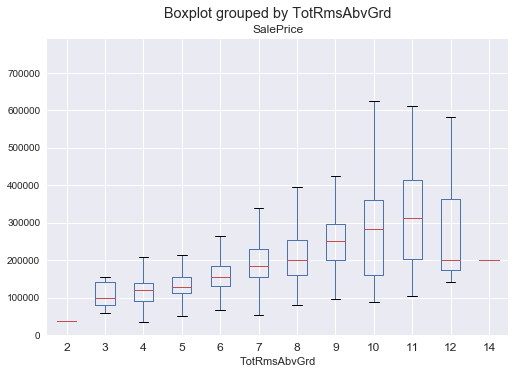

In [150]:
plot_category_correlation(train, 'TotRmsAbvGrd')


## Home functionality rating

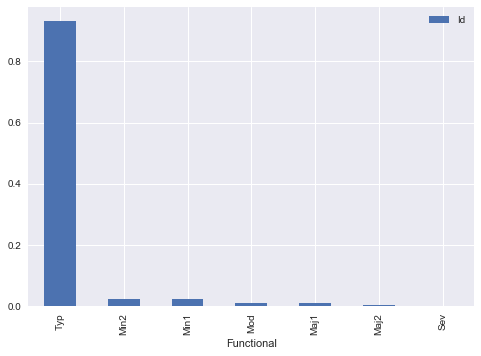

In [151]:
plot_category_distribution(train, 'Functional')


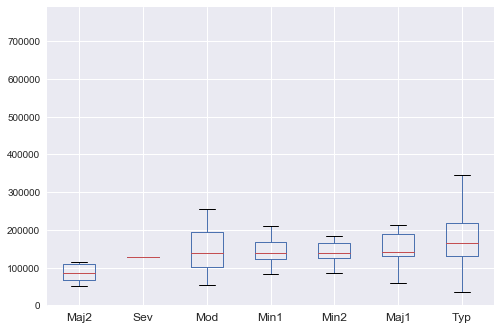

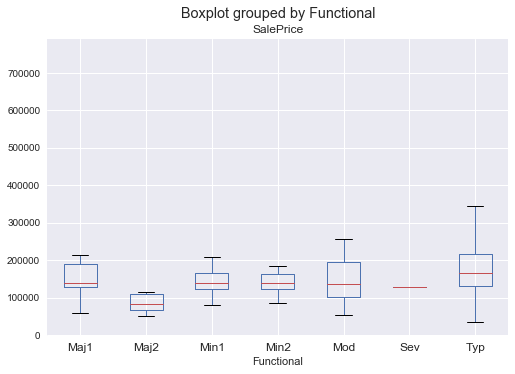

In [152]:
plot_category_correlation(train, 'Functional')


## Number of fireplaces

Turn into binary feature?

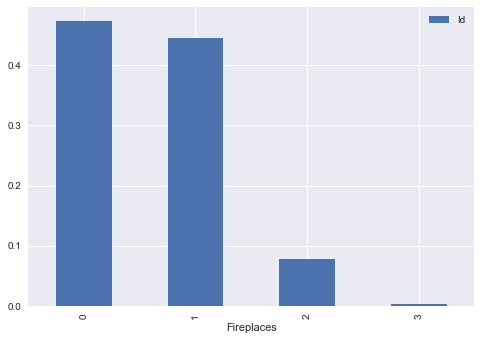

In [153]:
plot_category_distribution(train, 'Fireplaces')


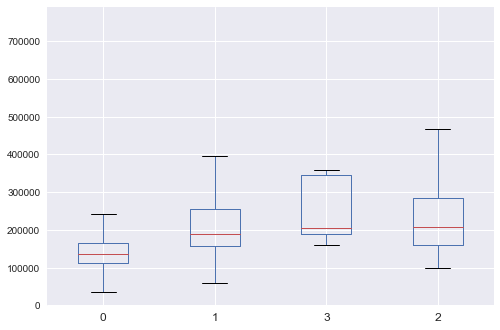

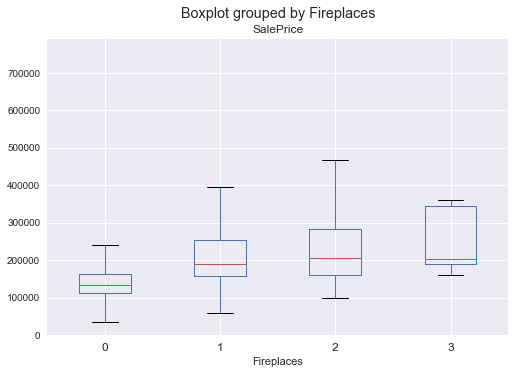

In [154]:
plot_category_correlation(train, 'Fireplaces')


## Fireplace quality

Add "no fireplace"

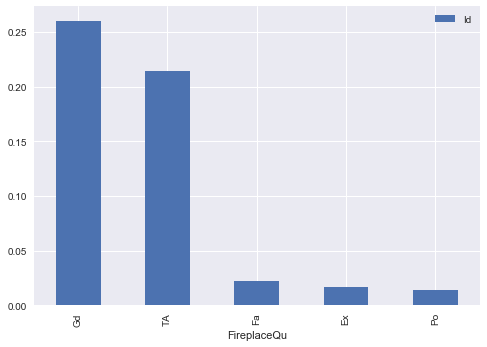

In [155]:
plot_category_distribution(train, 'FireplaceQu')


Index(['Po', 'Fa', 'TA', 'Gd', 'Ex'], dtype='object')


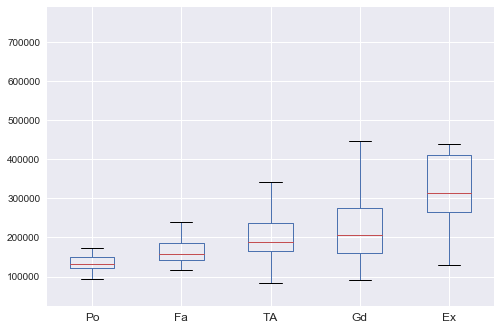

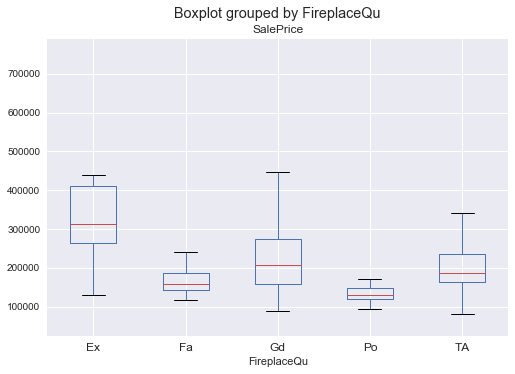

In [266]:
plot_category_correlation(train, 'FireplaceQu')


## HasFireplace

This is a new feature

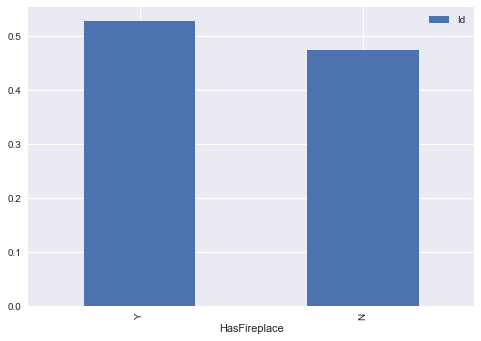

In [157]:
train['HasFireplace'] = train['Fireplaces'].apply(lambda x: 'N' if x == 0 else 'Y')
plot_category_distribution(train, 'HasFireplace')

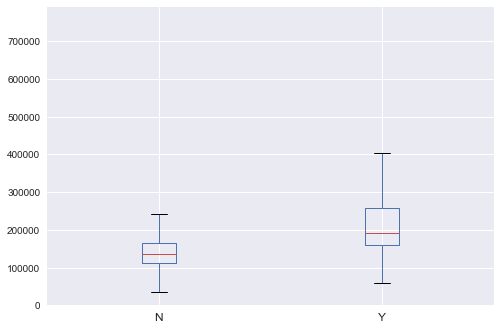

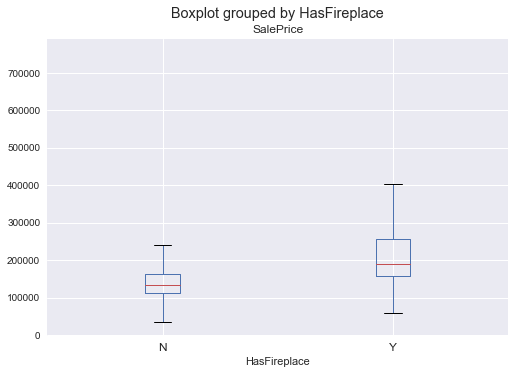

In [158]:
plot_category_correlation(train, 'HasFireplace')


## Garage location

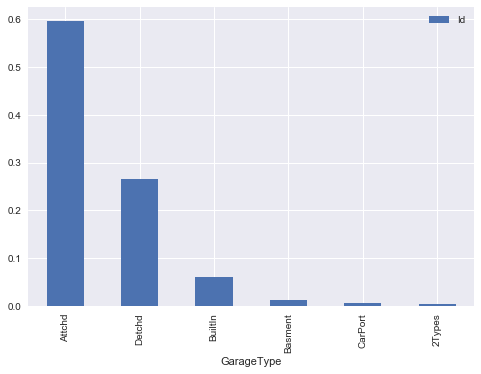

In [159]:
plot_category_distribution(train, 'GarageType')


Index(['CarPort', 'Detchd', 'Basment', '2Types', 'Attchd', 'BuiltIn'], dtype='object')


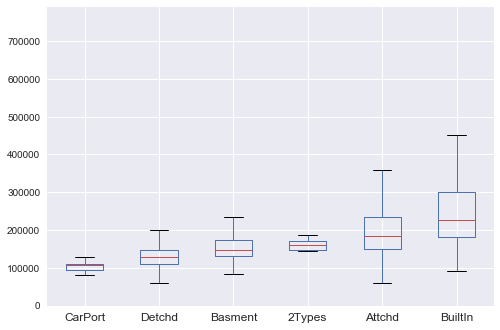

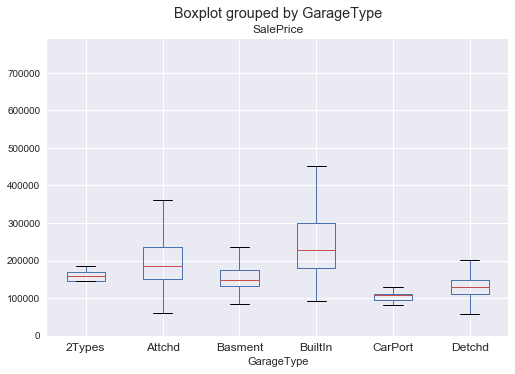

In [267]:
plot_category_correlation(train, 'GarageType')


## Year garage was built

Probably correlates with year house was built

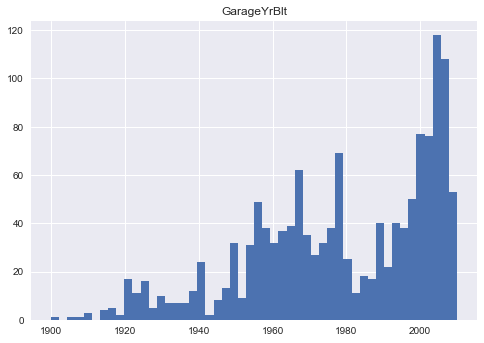

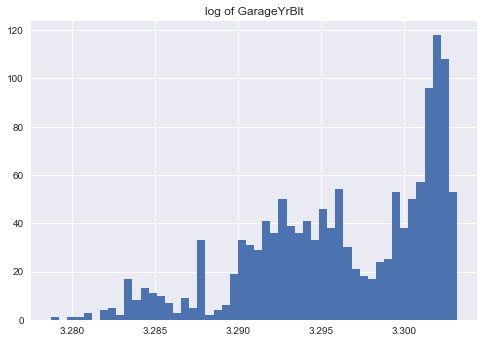

In [161]:
plot_histogram(train, 'GarageYrBlt', bins=50)


R^2 = 0.236548


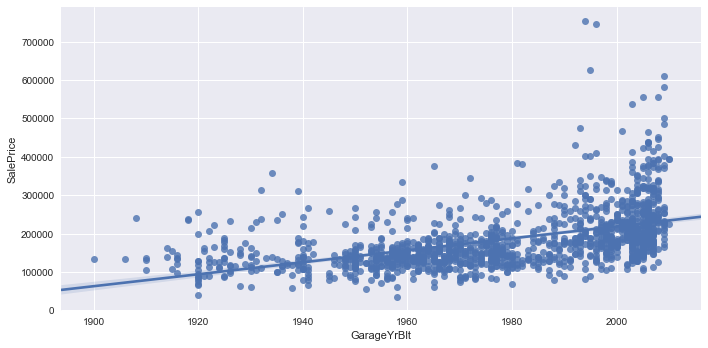

In [162]:
scatter_plot(train, 'GarageYrBlt', 'SalePrice')

## Interior finish of the garage

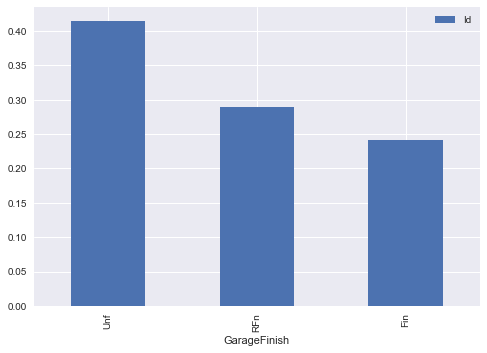

In [163]:
plot_category_distribution(train, 'GarageFinish')


Index(['Unf', 'RFn', 'Fin'], dtype='object')


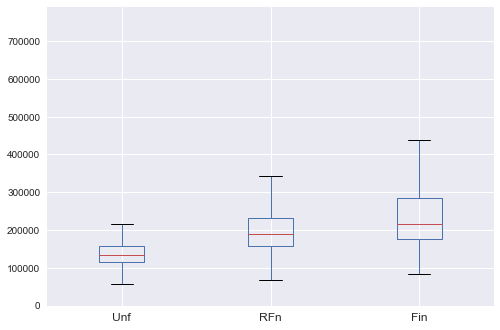

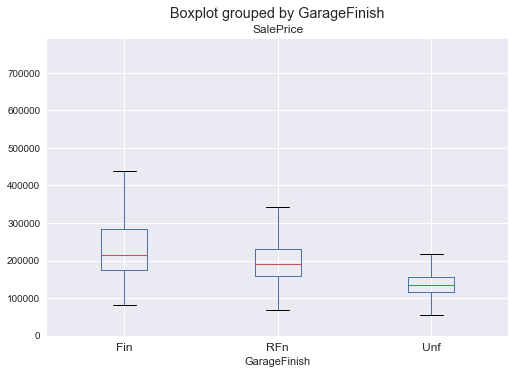

In [268]:
plot_category_correlation(train, 'GarageFinish')


## Size of garage in car capacity

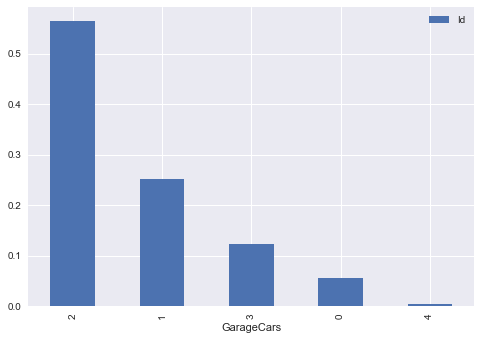

In [165]:
plot_category_distribution(train, 'GarageCars')


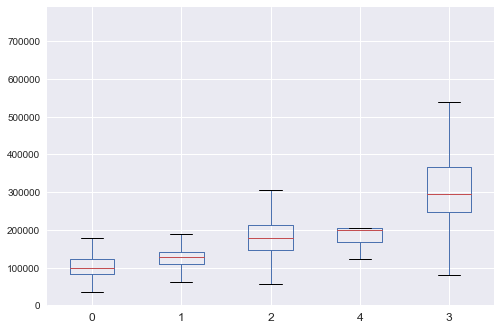

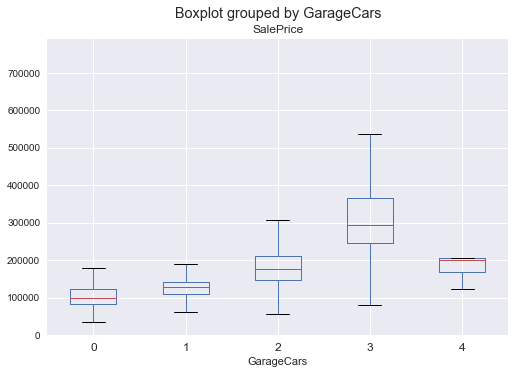

In [166]:
plot_category_correlation(train, 'GarageCars')


## Size of garage in square feet

Create feature has, does not have garage

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


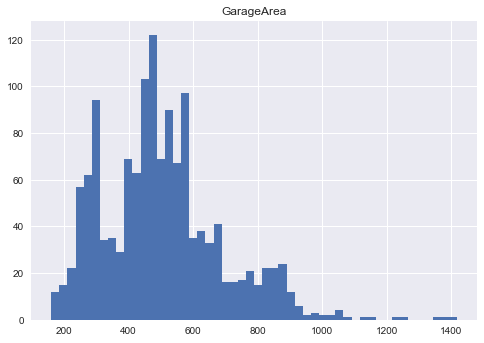

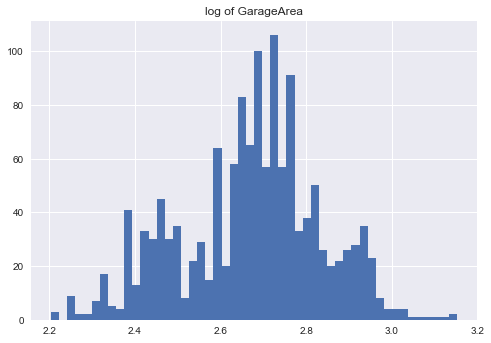

In [167]:
plot_histogram(train[train['GarageArea'] > 0], 'GarageArea', bins=50)


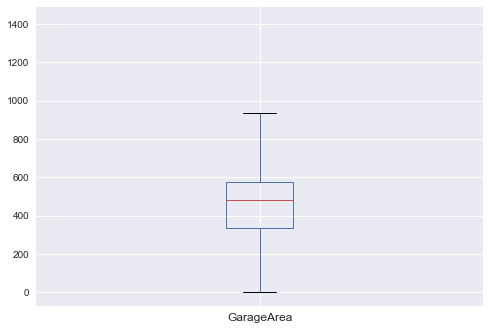

In [168]:
train.boxplot(column='GarageArea')


R^2 = 0.388667


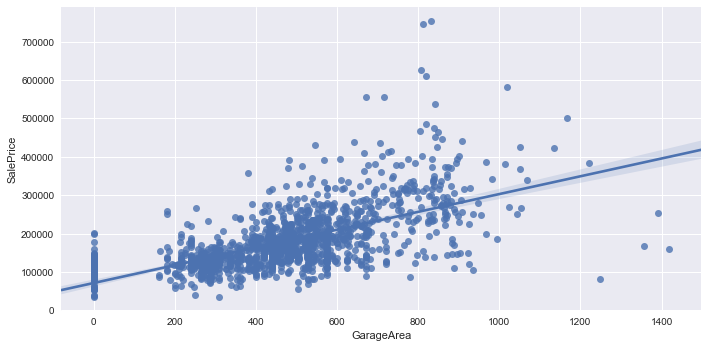

In [169]:
scatter_plot(train, 'GarageArea', 'SalePrice')

## HasGarage

This is a new feature

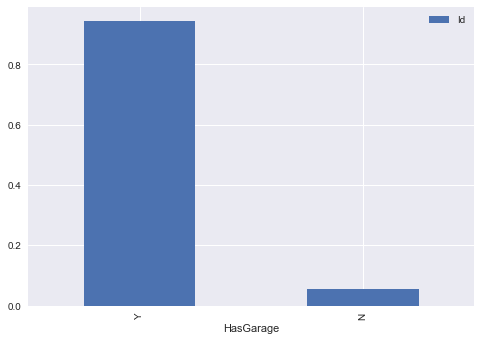

In [170]:
train['HasGarage'] = train['GarageArea'].apply(lambda x: 'N' if x == 0 else 'Y')
plot_category_distribution(train, 'HasGarage')

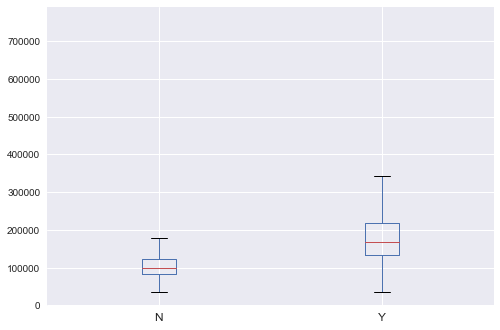

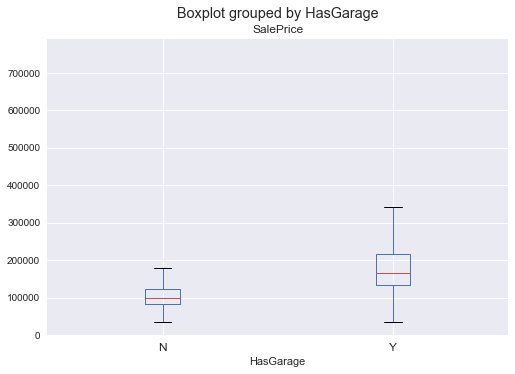

In [171]:
plot_category_correlation(train, 'HasGarage')

## StillAvailableArea

This is a new feature. Estimate of the lot area still available e.g. for construction or leisure.

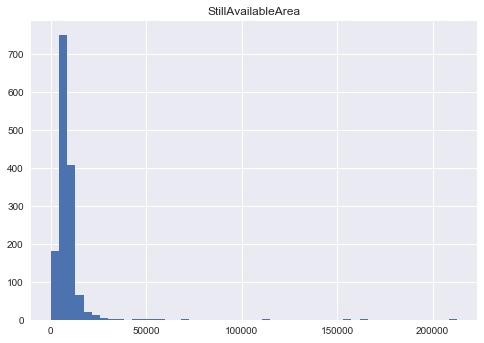

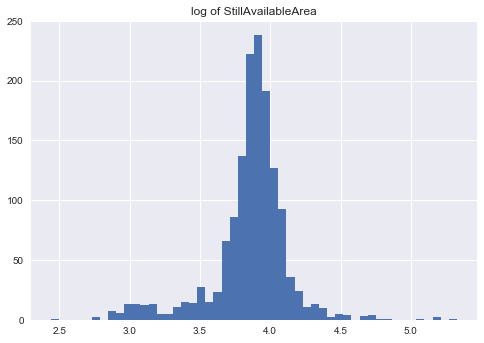

In [172]:
train['StillAvailableArea'] = train['LotArea'] - train['1stFlrSF'] - train['GarageArea']
plot_histogram(train, 'StillAvailableArea', bins=50)


R^2 = 0.053033


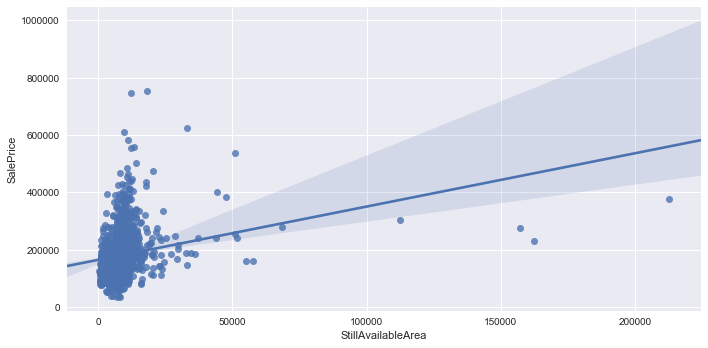

In [173]:
scatter_plot(train, 'StillAvailableArea', 'SalePrice')

## HasAvailableArea

This is a new feature.

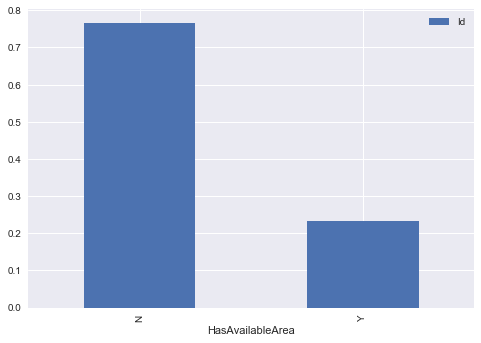

In [174]:
train['HasAvailableArea'] = train['StillAvailableArea'].apply(lambda x: 'N' if x < 10000 else 'Y')
plot_category_distribution(train, 'HasAvailableArea')

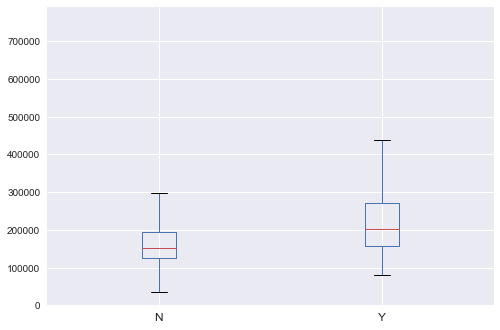

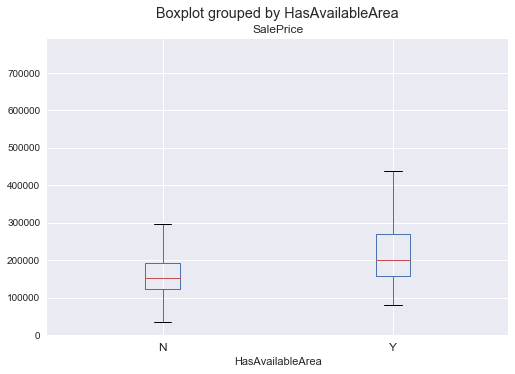

In [175]:
plot_category_correlation(train, 'HasAvailableArea')

## Garage quality

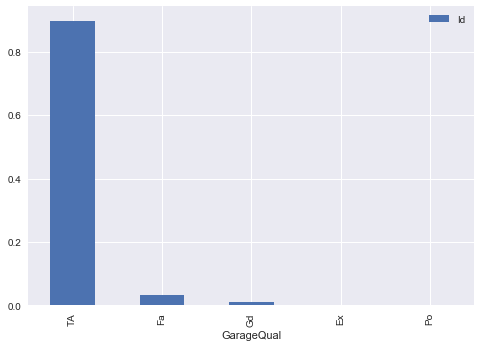

In [176]:
plot_category_distribution(train, 'GarageQual')


Index(['Po', 'Fa', 'Ex', 'TA', 'Gd'], dtype='object')


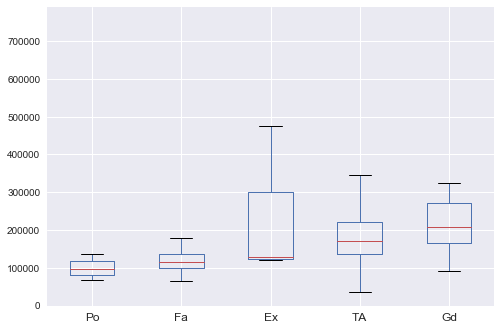

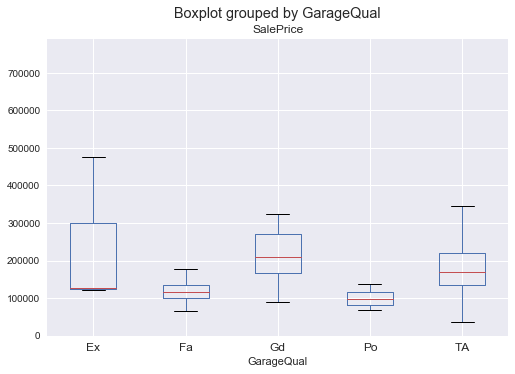

In [269]:
plot_category_correlation(train, 'GarageQual')


## Garage condition

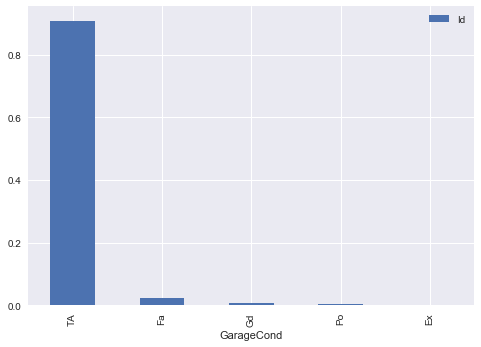

In [178]:
plot_category_distribution(train, 'GarageCond')


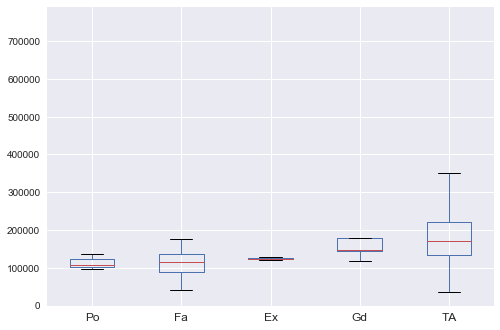

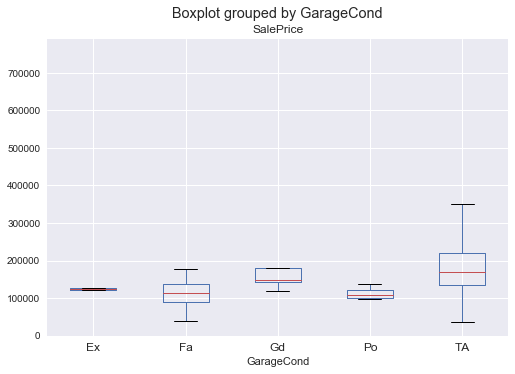

In [179]:
plot_category_correlation(train, 'GarageCond')


## Paved driveway

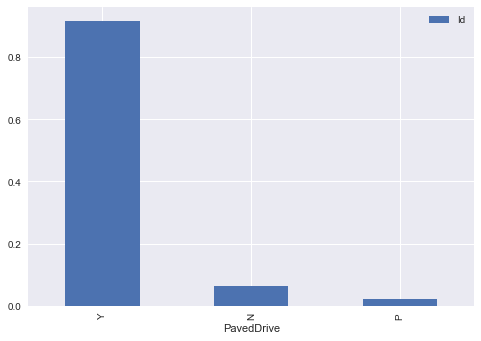

In [180]:
plot_category_distribution(train, 'PavedDrive')


Index(['N', 'P', 'Y'], dtype='object')


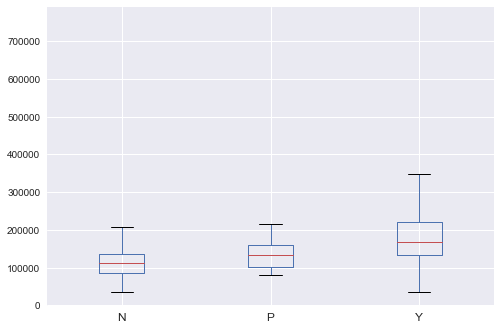

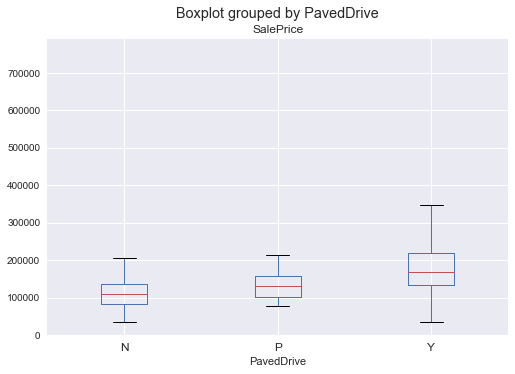

In [270]:
plot_category_correlation(train, 'PavedDrive')


## Wood deck area in square feet

Turn into binary feature?

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


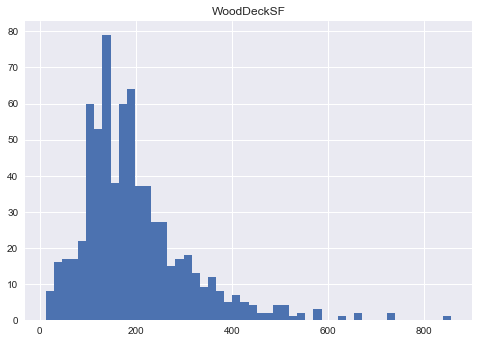

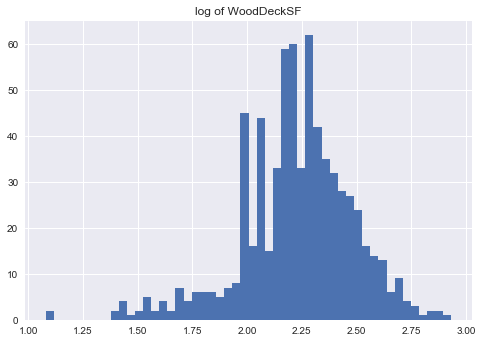

In [182]:
plot_histogram(train[train['WoodDeckSF'] > 0], 'WoodDeckSF', bins=50)


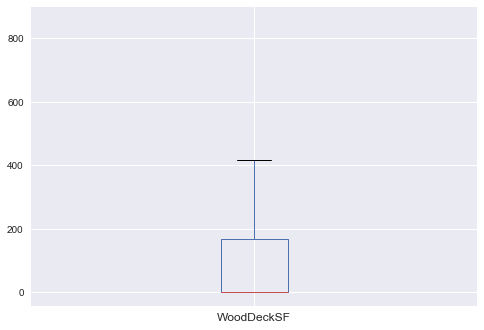

In [183]:
train.boxplot(column='WoodDeckSF')


R^2 = 0.105244


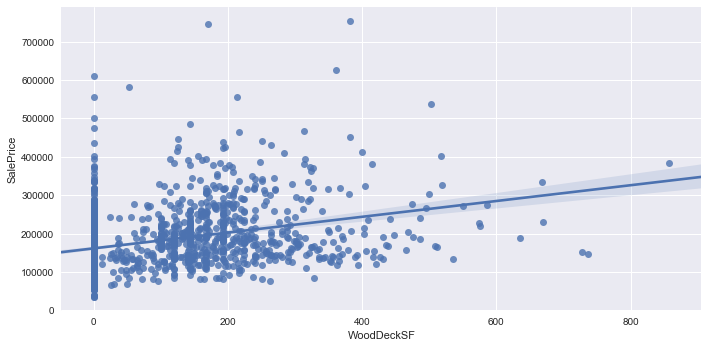

In [184]:
scatter_plot(train, 'WoodDeckSF', 'SalePrice')

## HasWoodDeck

This is a new feature

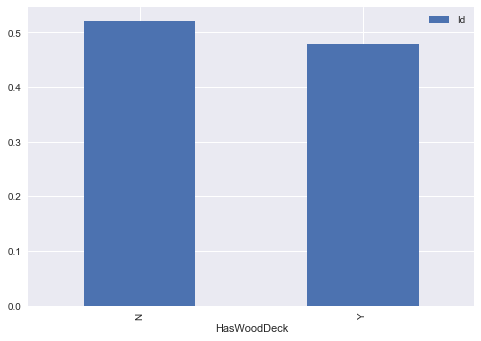

In [185]:
train['HasWoodDeck'] = train['WoodDeckSF'].apply(lambda x: 'N' if x == 0 else 'Y')
plot_category_distribution(train, 'HasWoodDeck')

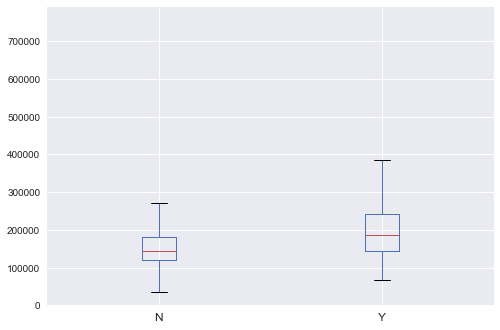

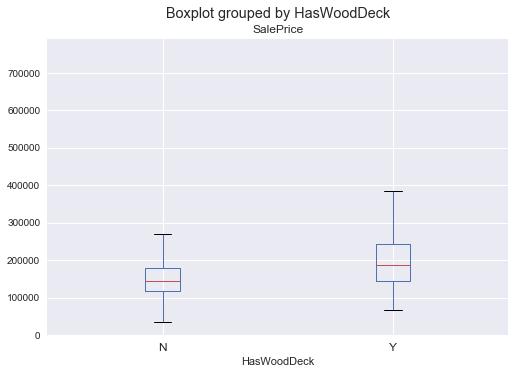

In [186]:
plot_category_correlation(train, 'HasWoodDeck')

##  Open porch area in square feet

Turn into binary feature?

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


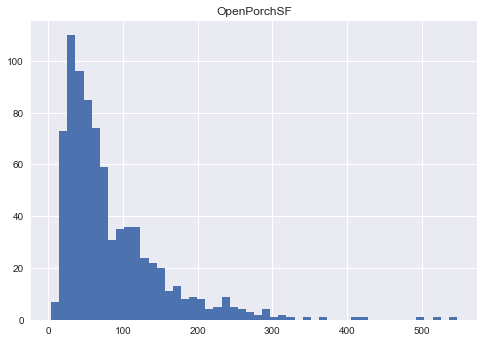

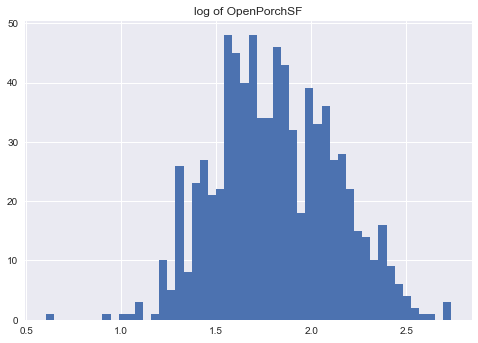

In [187]:
plot_histogram(train[train['OpenPorchSF'] > 0], 'OpenPorchSF', bins=50)


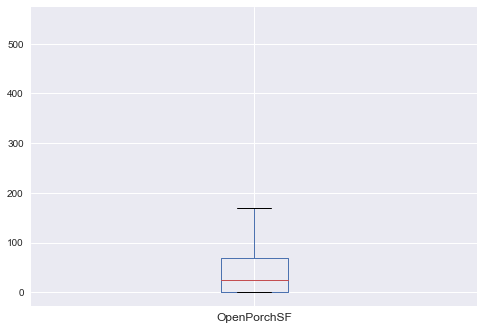

In [188]:
train.boxplot(column='OpenPorchSF')


R^2 = 0.099765


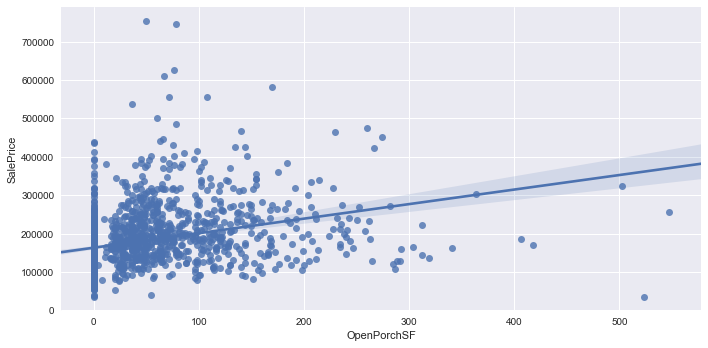

In [189]:
scatter_plot(train, 'OpenPorchSF', 'SalePrice')

## HasOpenPorch

This is a new feature

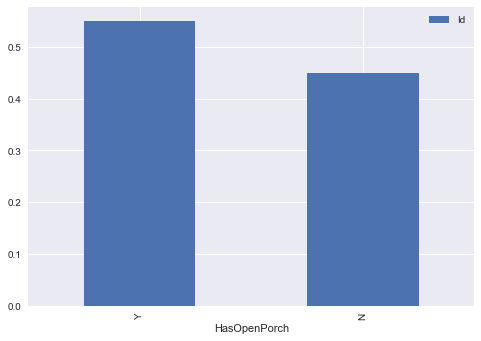

In [190]:
train['HasOpenPorch'] = train['OpenPorchSF'].apply(lambda x: 'N' if x == 0 else 'Y')
plot_category_distribution(train, 'HasOpenPorch')

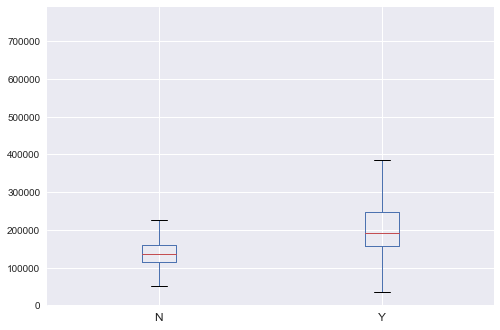

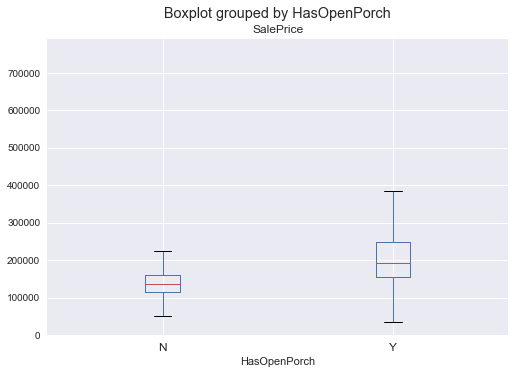

In [191]:
plot_category_correlation(train, 'HasOpenPorch')

## Enclosed porch area in square feet

Turn into binary feature?

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


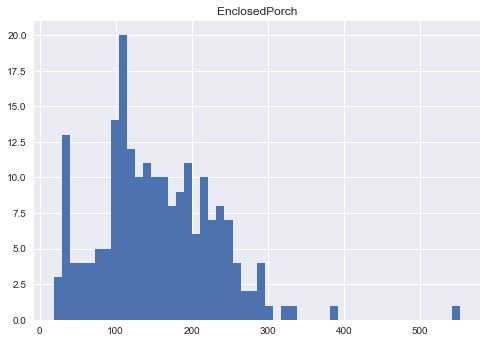

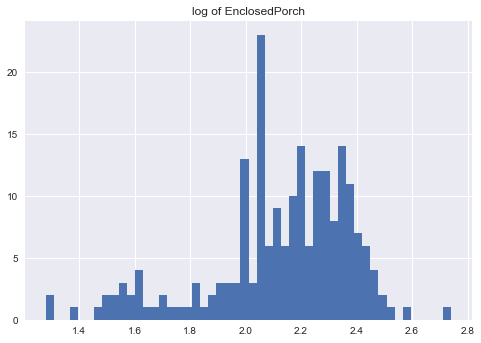

In [192]:
plot_histogram(train[train['EnclosedPorch'] > 0], 'EnclosedPorch', bins=50)


R^2 = 0.058215


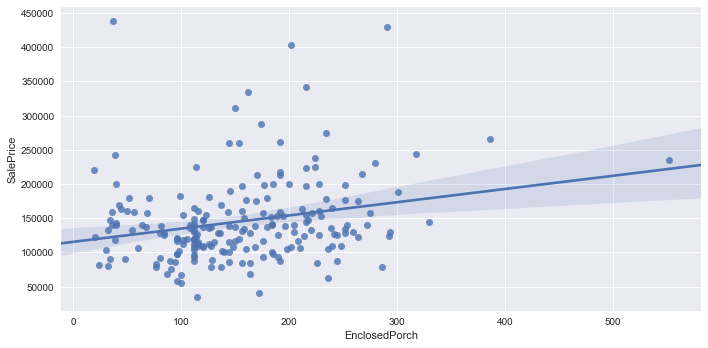

In [193]:
scatter_plot(train[train['EnclosedPorch'] > 0], 'EnclosedPorch', 'SalePrice')

## HasEnclosedPorch

This is a new feature

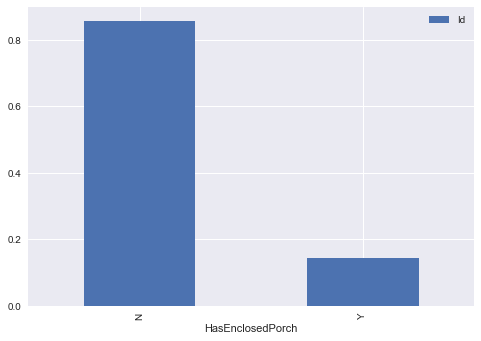

In [194]:
train['HasEnclosedPorch'] = train['EnclosedPorch'].apply(lambda x: 'N' if x == 0 else 'Y')
plot_category_distribution(train, 'HasEnclosedPorch')

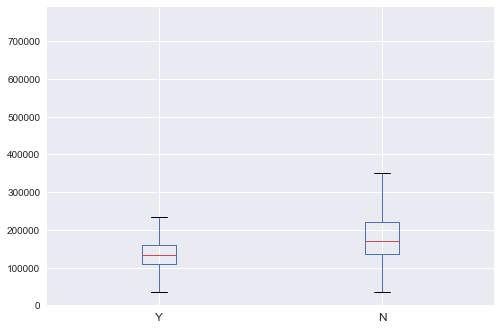

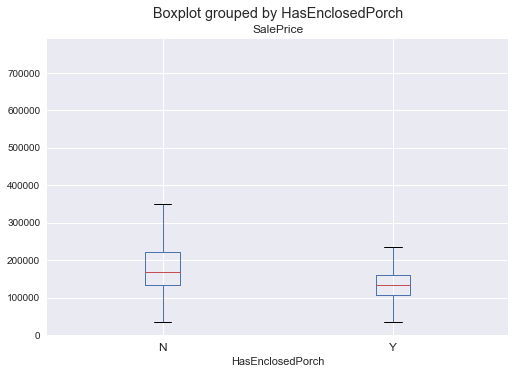

In [195]:
plot_category_correlation(train, 'HasEnclosedPorch')

## Three season porch area in square feet

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


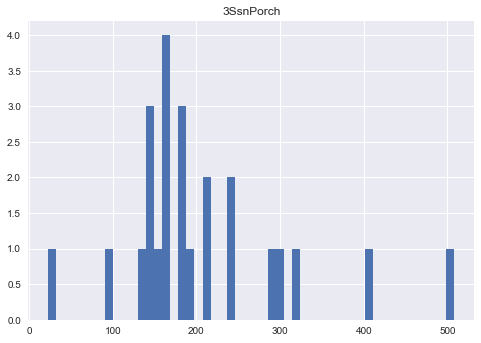

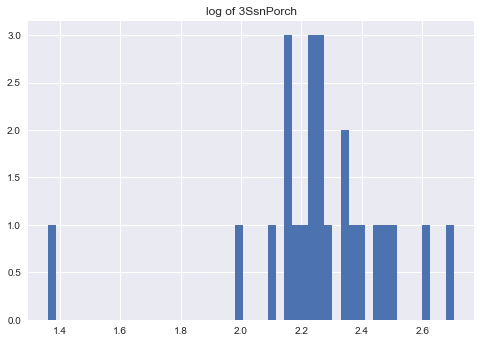

In [196]:
plot_histogram(train[train['3SsnPorch'] > 0], '3SsnPorch', bins=50)


R^2 = 0.004087


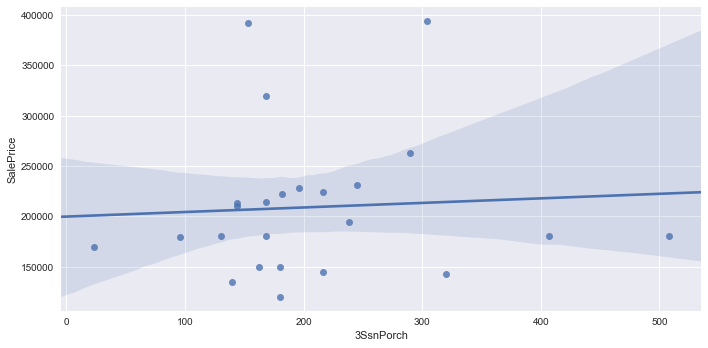

In [197]:
scatter_plot(train[train['3SsnPorch'] > 0], '3SsnPorch', 'SalePrice')

## HasThreeSeasonPorch

This is a new feature

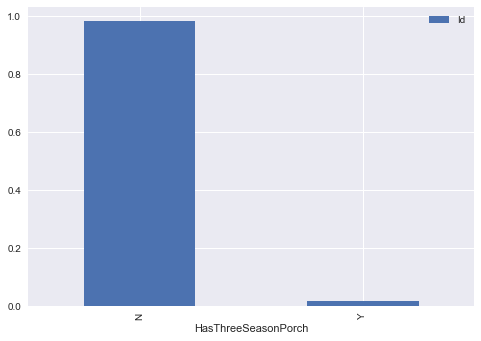

In [198]:
train['HasThreeSeasonPorch'] = train['3SsnPorch'].apply(lambda x: 'N' if x == 0 else 'Y')
plot_category_distribution(train, 'HasThreeSeasonPorch')

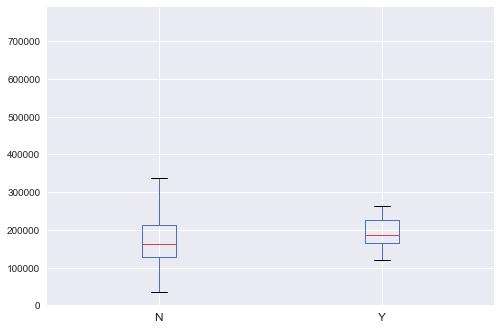

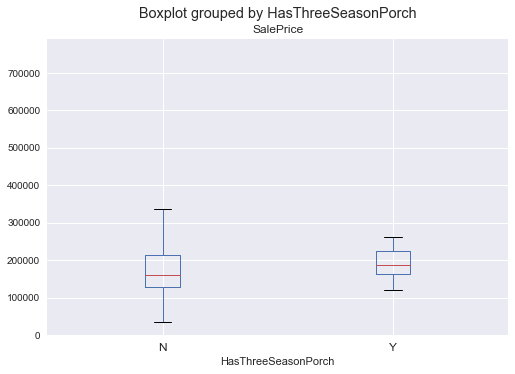

In [199]:
plot_category_correlation(train, 'HasThreeSeasonPorch')

## Screen porch area in square feet

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


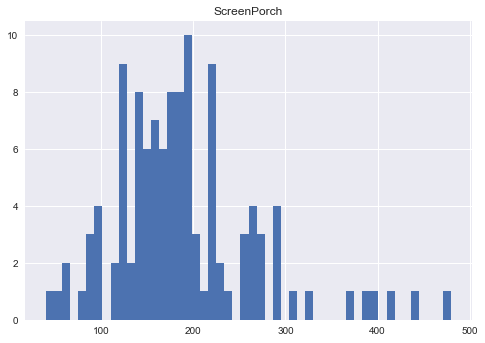

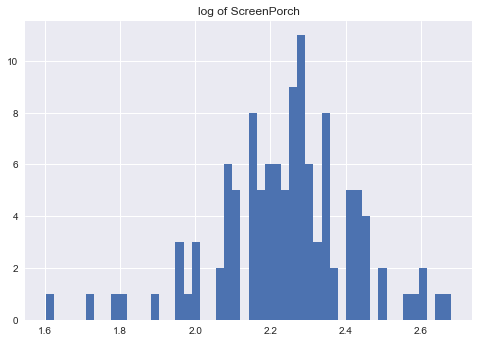

In [200]:
plot_histogram(train[train['ScreenPorch'] > 0], 'ScreenPorch', bins=50)


R^2 = 0.065245


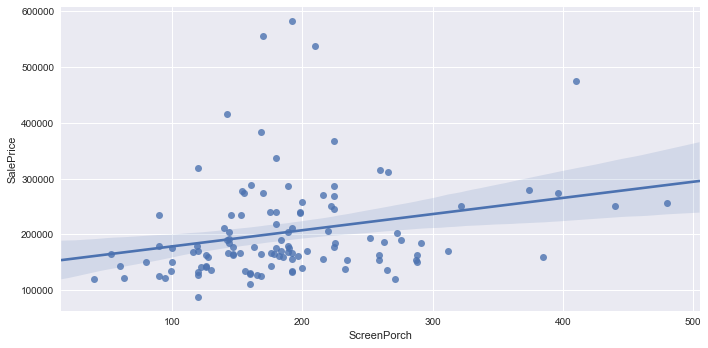

In [201]:
scatter_plot(train[train['ScreenPorch'] > 0], 'ScreenPorch', 'SalePrice')

## HasScreenPorch

This is a new feature

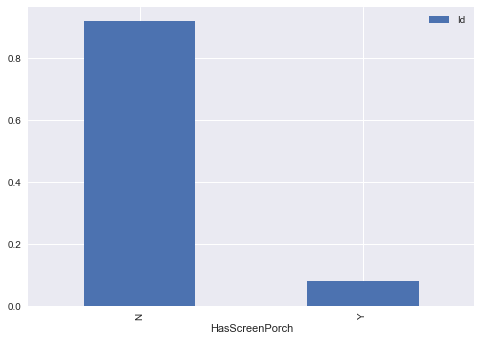

In [202]:
train['HasScreenPorch'] = train['ScreenPorch'].apply(lambda x: 'N' if x == 0 else 'Y')
plot_category_distribution(train, 'HasScreenPorch')

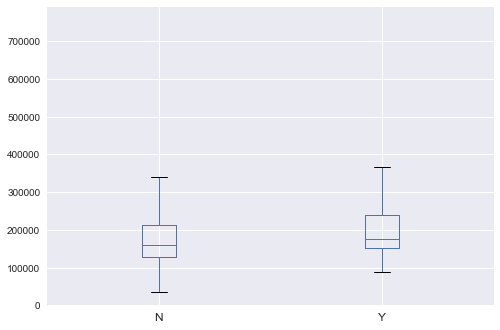

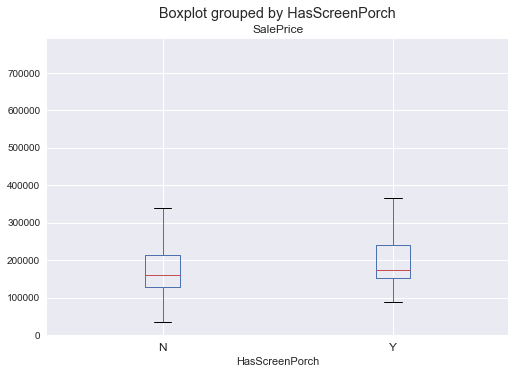

In [203]:
plot_category_correlation(train, 'HasScreenPorch')

## TotalPorchArea

This is a new feature.

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


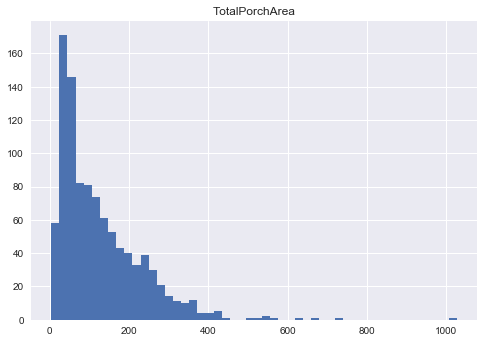

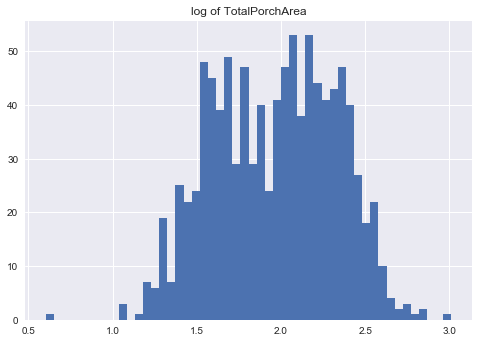

In [204]:
train['TotalPorchArea'] = train['OpenPorchSF'] + train['EnclosedPorch'] + train['3SsnPorch'] + train['ScreenPorch']
plot_histogram(train[train['TotalPorchArea'] > 0], 'TotalPorchArea', bins=50)

R^2 = 0.038314


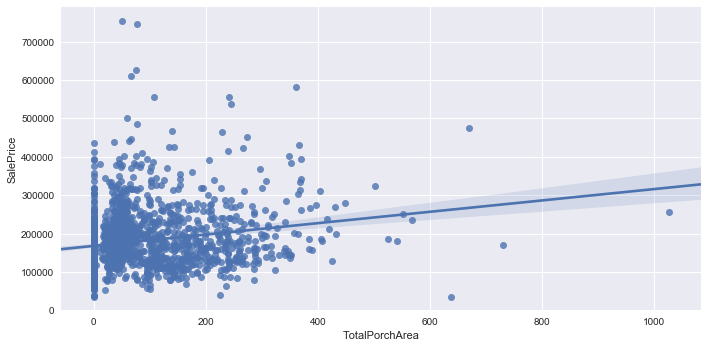

In [205]:
scatter_plot(train, 'TotalPorchArea', 'SalePrice')

R^2 = 0.001682


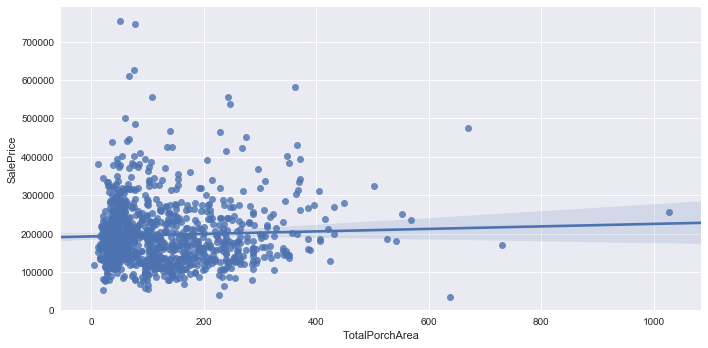

In [206]:
scatter_plot(train[train['TotalPorchArea'] > 0], 'TotalPorchArea', 'SalePrice')

## HasPorch
This is a new feature

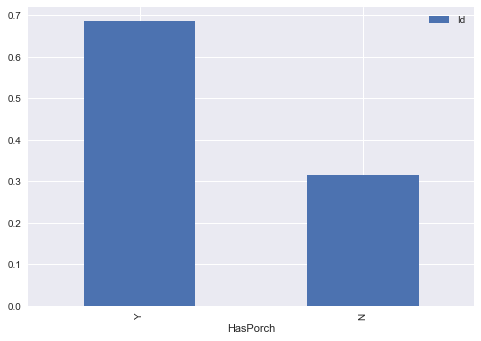

In [207]:
train['HasPorch'] = train['TotalPorchArea'].apply(lambda x: 'N' if x == 0 else 'Y')
plot_category_distribution(train, 'HasPorch')

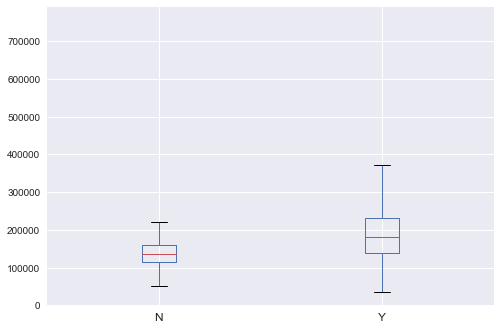

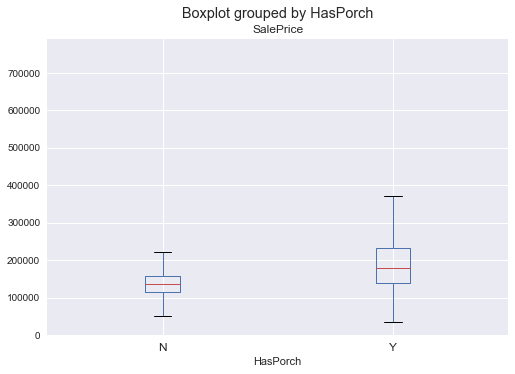

In [208]:
plot_category_correlation(train, 'HasPorch')

## Pool area in square feet

Turn into binary?

PoolArea    0
dtype: int64

R^2 = 0.008538


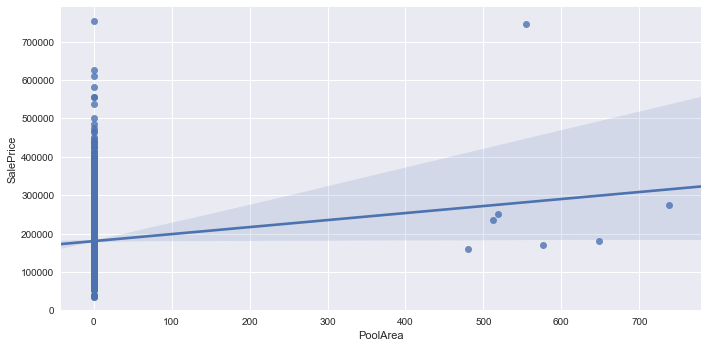

In [209]:
display(train[['PoolArea']].apply(lambda x: sum(x.isnull())))
scatter_plot(train, 'PoolArea', 'SalePrice')

## Has Pool

This is a new feature

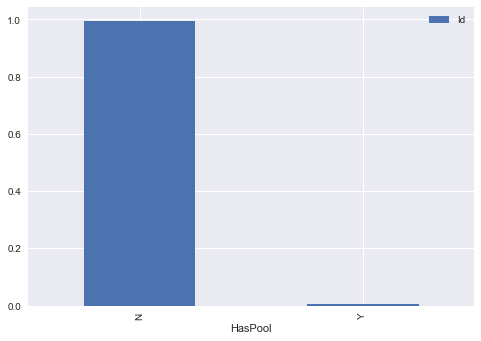

In [210]:
train['HasPool'] = train['PoolArea'].apply(lambda x: 'N' if x == 0 else 'Y')
plot_category_distribution(train, 'HasPool')

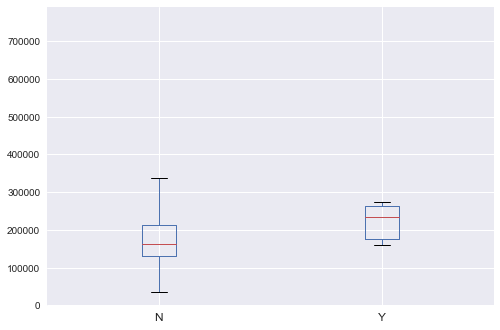

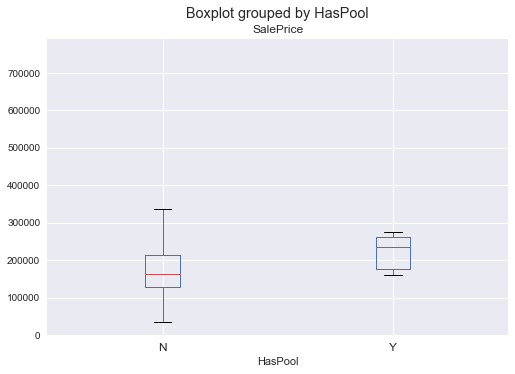

In [211]:
plot_category_correlation(train, 'HasPool')

## Pool quality

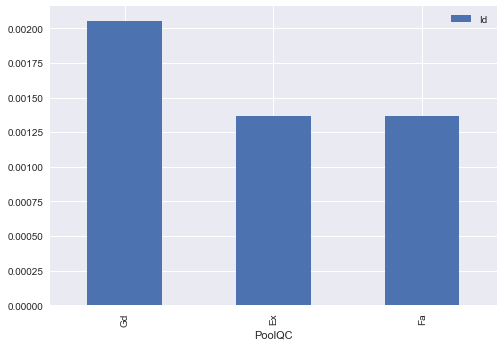

In [212]:
plot_category_distribution(train, 'PoolQC')


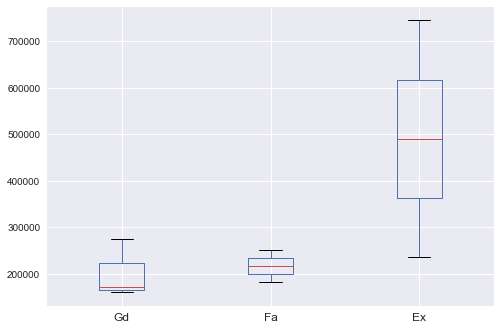

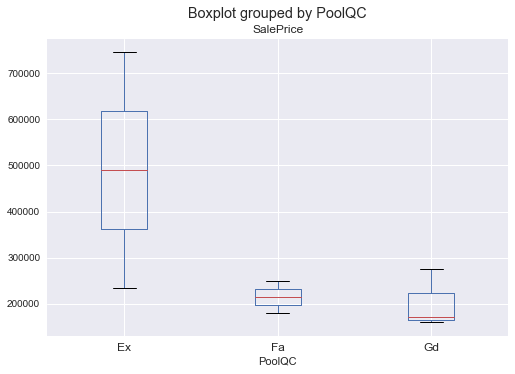

In [213]:
plot_category_correlation(train, 'PoolQC')


## Fence quality

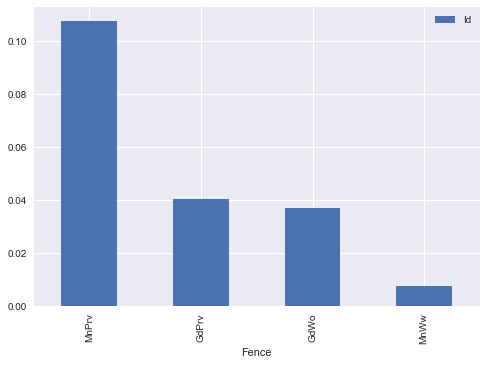

In [214]:
plot_category_distribution(train, 'Fence')


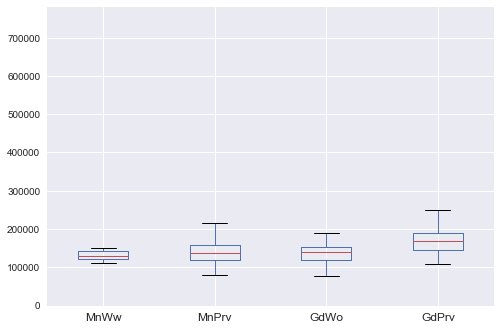

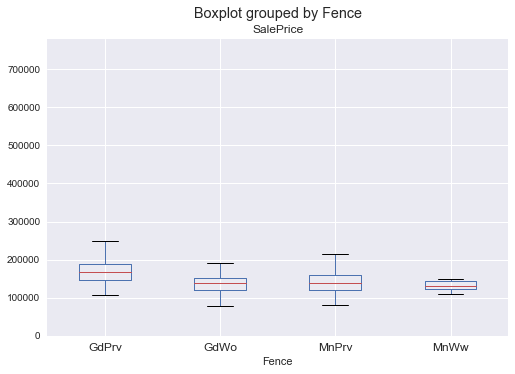

In [215]:
plot_category_correlation(train, 'Fence')


## Miscellaneous feature not covered in other categories

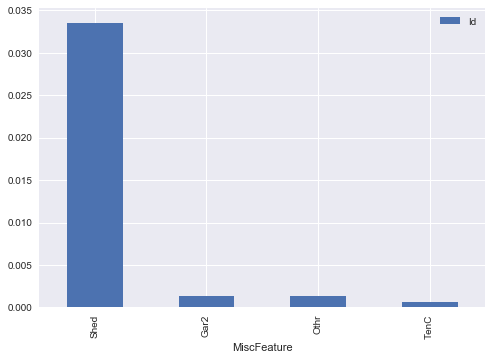

In [216]:
plot_category_distribution(train, 'MiscFeature')


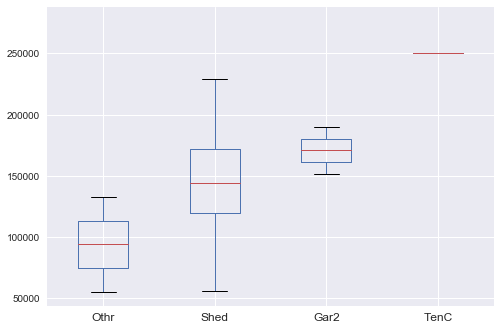

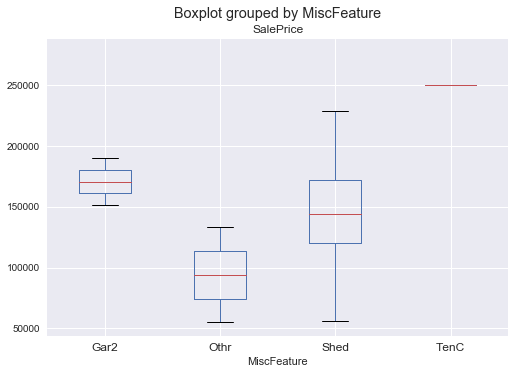

In [217]:
plot_category_correlation(train, 'MiscFeature')


## Month Sold

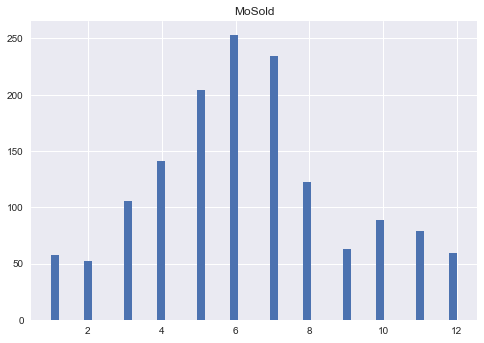

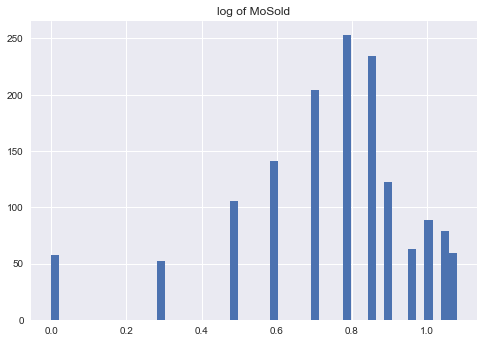

In [218]:
plot_histogram(train, 'MoSold', bins=50)


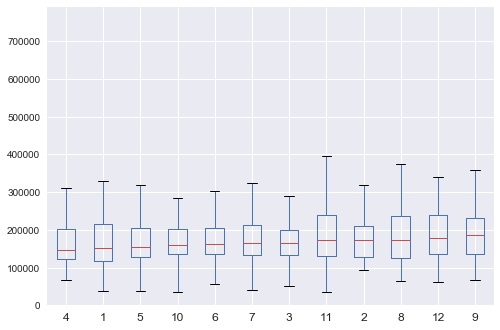

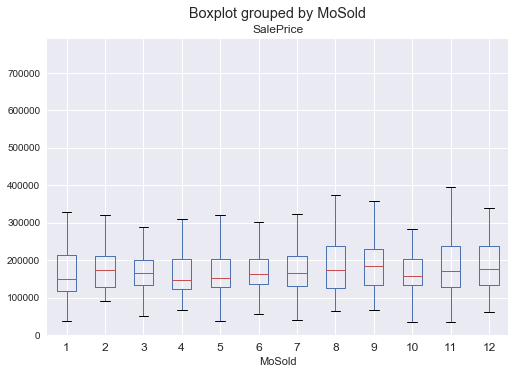

In [219]:
plot_category_correlation(train, 'MoSold')


## Year Sold

Create feature = number of years house had when sold

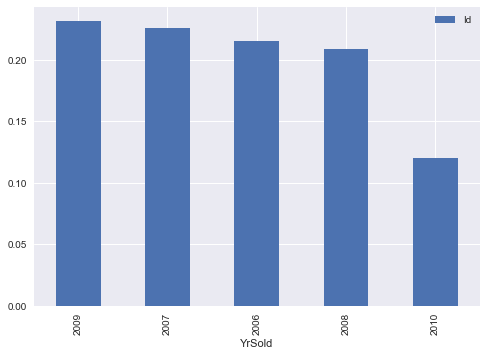

In [220]:
plot_category_distribution(train, 'YrSold')


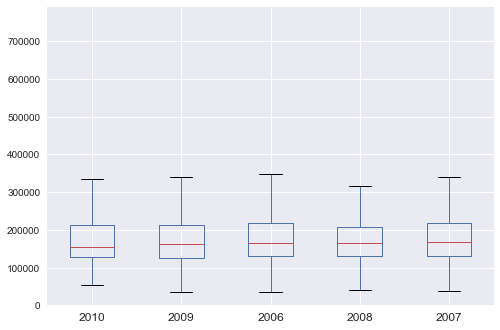

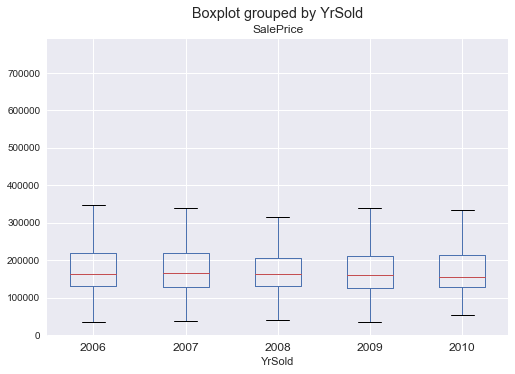

In [221]:
plot_category_correlation(train, 'YrSold')


## House age

This is a new feature

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


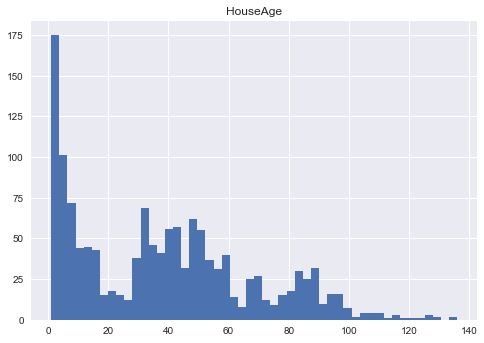

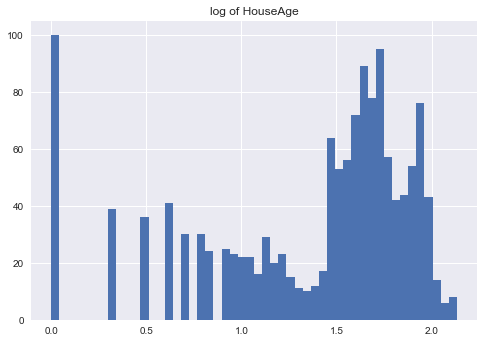

In [222]:
train['HouseAge'] = train['YrSold'] - train['YearBuilt']
plot_histogram(train[train['HouseAge'] > 0], 'HouseAge', bins=50)

R^2 = 0.273896


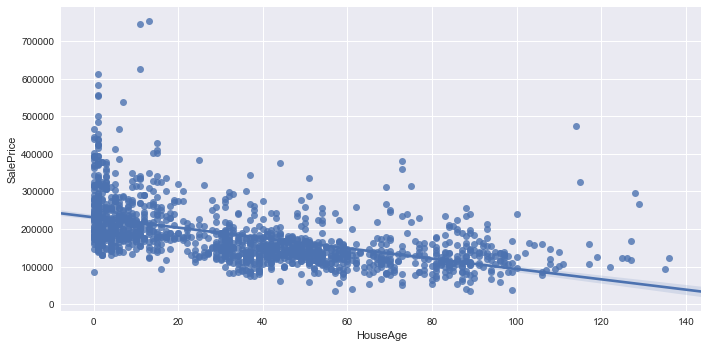

In [223]:
scatter_plot(train, 'HouseAge', 'SalePrice')

## NewHouse

This is a new feature

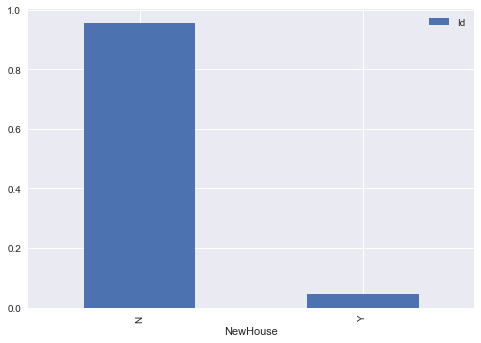

In [224]:
train['NewHouse'] = train['HouseAge'].apply(lambda x: 'Y' if x == 0 else 'N')
plot_category_distribution(train, 'NewHouse')

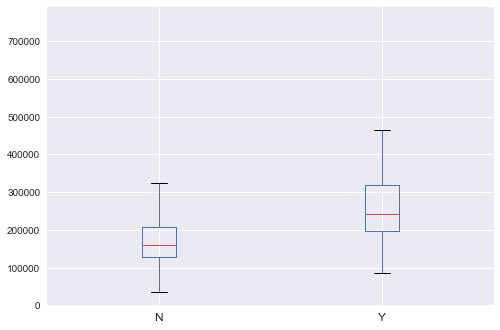

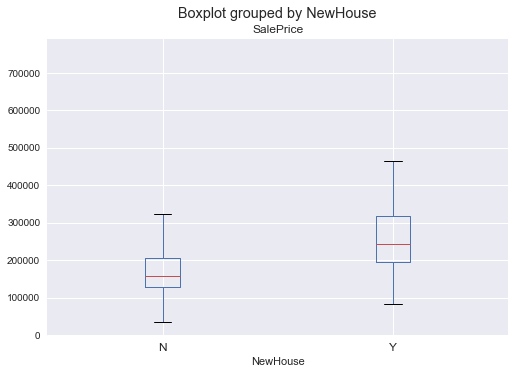

In [225]:
plot_category_correlation(train, 'NewHouse')


## HouseRemodelAge

This is a new feature

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


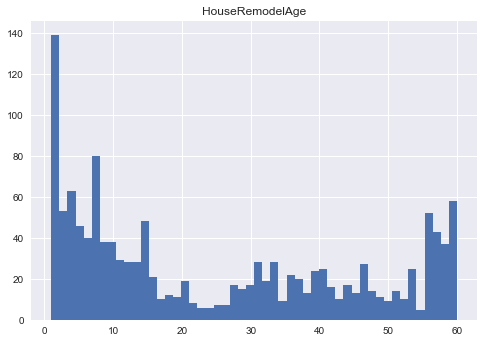

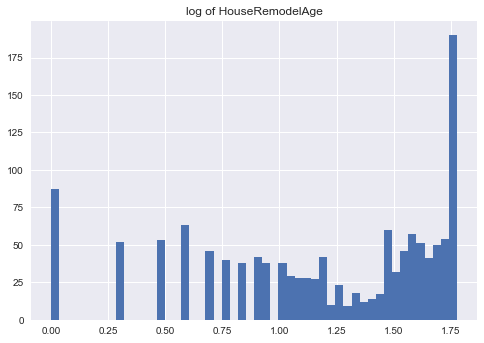

In [226]:
train['HouseRemodelAge'] = train['YrSold'] - train['YearRemodAdd']
plot_histogram(train[train['HouseRemodelAge'] > 0], 'HouseRemodelAge', bins=50)

R^2 = 0.259161


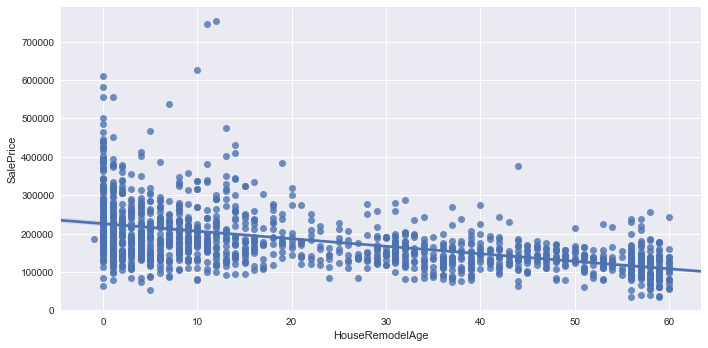

In [227]:
scatter_plot(train, 'HouseRemodelAge', 'SalePrice')

## RecentlyRemodeled

This is a new feature

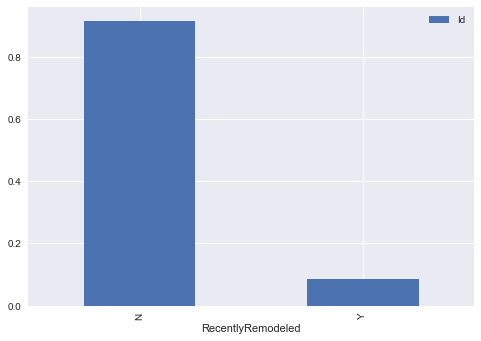

In [228]:
train['RecentlyRemodeled'] = train['HouseRemodelAge'].apply(lambda x: 'Y' if x == 0 else 'N')
plot_category_distribution(train, 'RecentlyRemodeled')

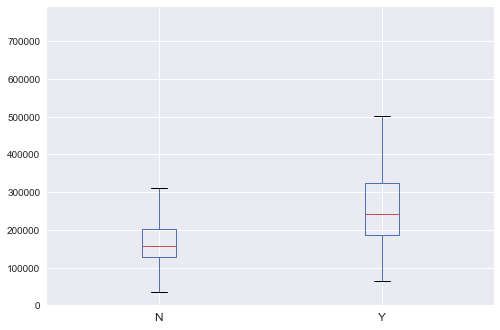

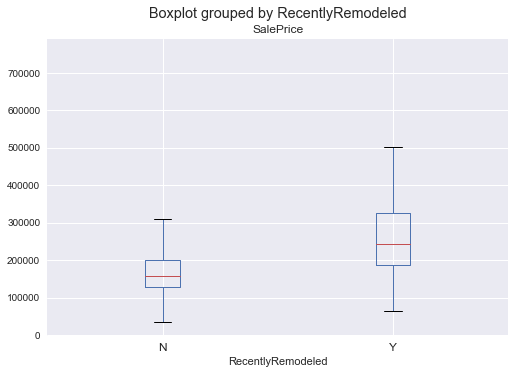

In [229]:
plot_category_correlation(train, 'RecentlyRemodeled')


## GarageAge

This is a new feature

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


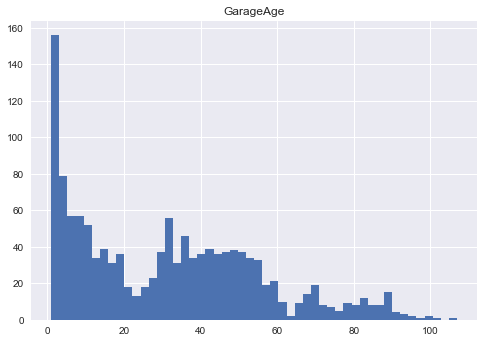

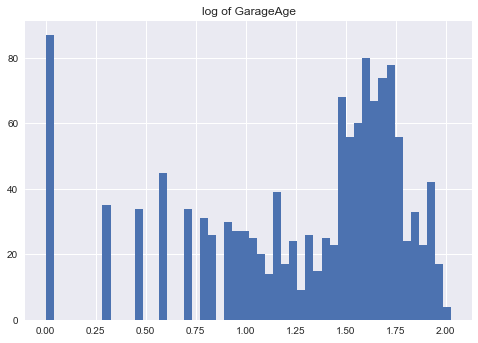

In [230]:
train['GarageAge'] = train['YrSold'] - train['GarageYrBlt']
plot_histogram(train[train['GarageAge'] > 0], 'GarageAge', bins=50)

R^2 = 0.237236


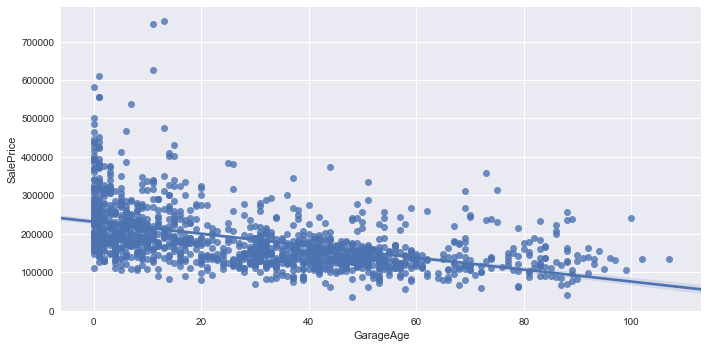

In [231]:
scatter_plot(train, 'GarageAge', 'SalePrice')

## NewGarage

This is a new feature

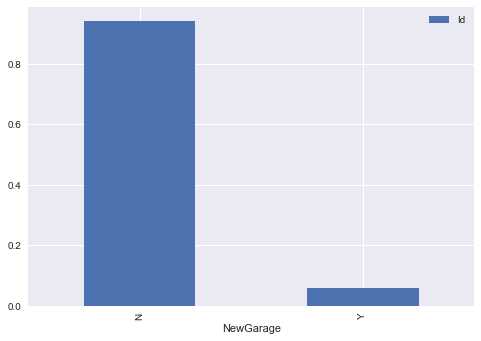

In [232]:
train['NewGarage'] = train['GarageAge'].apply(lambda x: 'Y' if x == 0 else 'N')
plot_category_distribution(train, 'NewGarage')

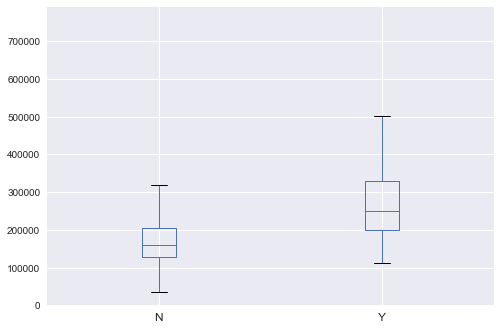

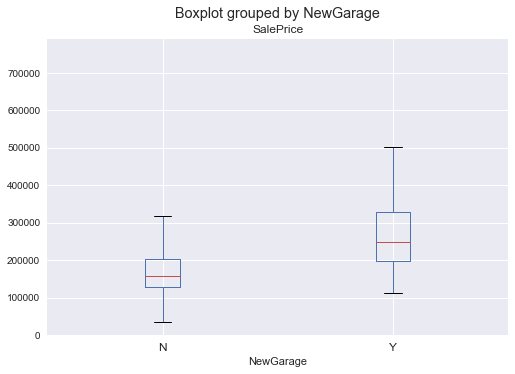

In [233]:
plot_category_correlation(train, 'NewGarage')


## Type of sale

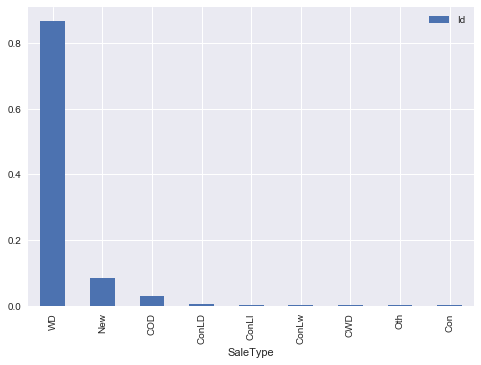

In [234]:
plot_category_distribution(train, 'SaleType')


Index(['Oth', 'ConLI', 'COD', 'ConLD', 'ConLw', 'WD', 'CWD', 'New', 'Con'], dtype='object')


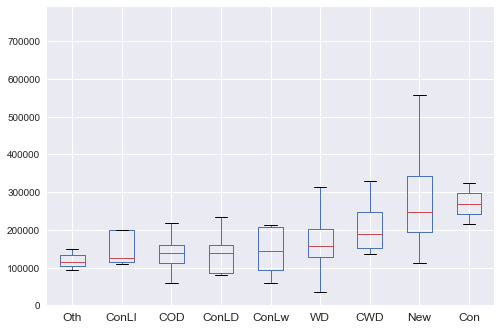

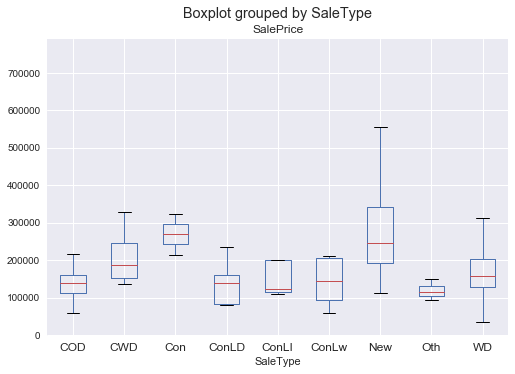

In [271]:
plot_category_correlation(train, 'SaleType')


## Condition of sale

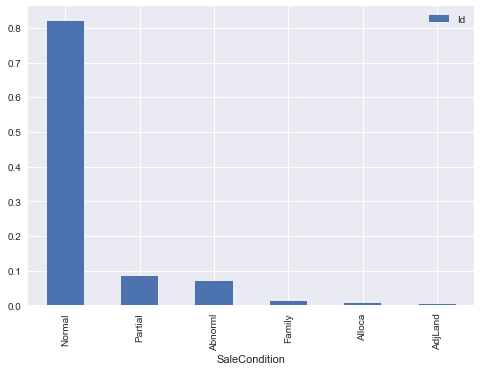

In [236]:
plot_category_distribution(train, 'SaleCondition')


Index(['AdjLand', 'Abnorml', 'Family', 'Alloca', 'Normal', 'Partial'], dtype='object')


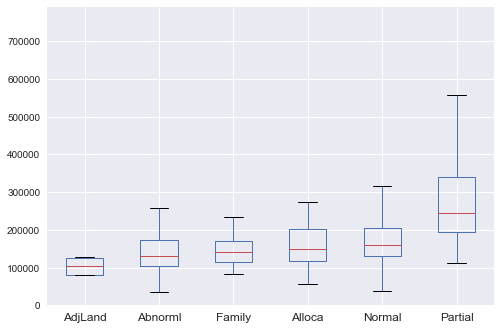

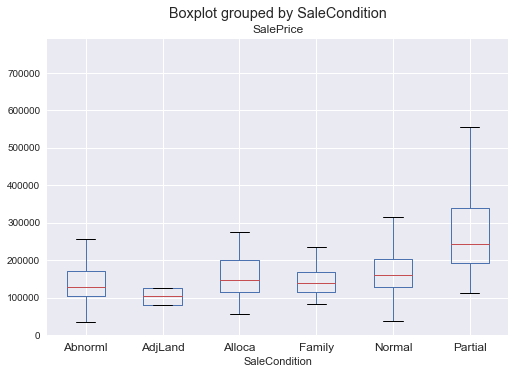

In [272]:
plot_category_correlation(train, 'SaleCondition')
    

# TODO
- poc: preprocess categorical features
- add q-q plot to histograms
- correlation matrix: correlation between features, not just the column we are trying to predict 
- compare test set with train set, feature by feature. similar characteristics? poc still makes sense?
- remove useless features, based on train and test set
